In [2]:
import tensorflow as tf 
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import layers

if tf.config.list_physical_devices('GPU'):
    print("gpu detectada")
else:
    print('no hay gpu')

gpu detectada


In [3]:
(X_train, y_train),(_, _) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')

X_train = (X_train - 127.5) / 127.5

X_train.shape

(60000, 28, 28, 1)

In [4]:
buffer_size = 60000
batch_size = 256

dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [5]:
def build_discriminator():
    # inputs = tf.keras.layers.Input(shape = (28, 28, 1))
    # x = tf.keras.layers.Conv2D(64, kernel_size = 5, strides = 2, padding = 'same', activation = tf.keras.layers.LeakyReLU())(inputs)
    # x = tf.keras.layers.Dropout(0.3)(x)
    # x = tf.keras.layers.Conv2D(128, kernel_size = 5, strides = 2, padding = 'same', activation = tf.keras.layers.LeakyReLU())(x)
    # x = tf.keras.layers.Dropout(0.3)(x)

    # x = tf.keras.layers.Flatten()(x)
    # outputs = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Sequential()
    
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

    

In [6]:
def build_generator(coding_size = 100):
    # inputs = tf.keras.layers.Input(shape = [coding_size])
    # x = tf.keras.layers.Dense(7*7*128)(inputs)
    # x = tf.keras.layers.BatchNormalization()(x)
    # x = tf.keras.layers.LeakyReLU()(x)
    # x  = tf.keras.layers.Reshape([7, 7, 128])(x)
    # print(x.shape)
    # x = tf.keras.layers.Conv2DTranspose(64, kernel_size = 5, strides = 2, padding = 'same', activation = tf.keras.layers.LeakyReLU())(x)
    # x = tf.keras.layers.BatchNormalization()(x)
    # print(x.shape)

    # outputs = tf.keras.layers.Conv2DTranspose(1, kernel_size = 5, strides = 2, padding = 'same', activation = 'tanh')(x)

    # generator = tf.keras.models.Model(inputs, outputs)

    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)

    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

    

In [7]:
discriminator = build_discriminator()
generator = build_generator()



In [8]:
def plot_losses(history):
    plt.figure()
    epochs = range(1, len(history['d_loss']) + 1)
    plt.plot(epochs, history['d_loss'][-1], label = 'discriminator loss')
    plt.plot(epochs, history['g_loss'][-1], label = 'generator loss')

In [9]:
d_optimizer = tf.keras.optimizers.RMSprop(lr = 0.0008, clipvalue = 1.0, decay = 1e-8)
g_optimizer = tf.keras.optimizers.RMSprop(lr = 0.0004, clipvalue = 1.0, decay = 1e-8)


c:\Users\gugu1\Documents\WGANvsDCGAN\.conda\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

def discriminator_loss(realimgs, generated):
    real_loss = cross_entropy(tf.ones_like(realimgs), realimgs)
    fake_loss = cross_entropy(tf.zeros_like(generated), generated)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(generated):
    return cross_entropy(tf.ones_like(generated), generated)

Epoch 1/5, Batch 0, Discriminator Loss: 1.4118261337280273, Generator Loss: 0.6935096979141235
Epoch 1/5, Batch 1, Discriminator Loss: 0.8045446276664734, Generator Loss: 0.6340146064758301
Epoch 1/5, Batch 2, Discriminator Loss: 0.8881425261497498, Generator Loss: 0.5387890338897705
Epoch 1/5, Batch 3, Discriminator Loss: 0.7433249950408936, Generator Loss: 0.7392879128456116
Epoch 1/5, Batch 4, Discriminator Loss: 0.5653877854347229, Generator Loss: 1.4717411994934082


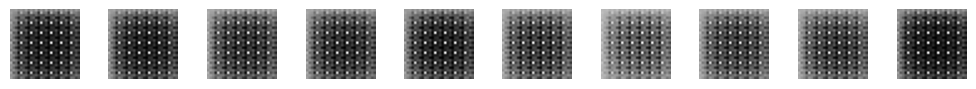

Epoch 1/5, Batch 5, Discriminator Loss: 2.3043465614318848, Generator Loss: 0.1094256192445755
Epoch 1/5, Batch 6, Discriminator Loss: 1.4022743701934814, Generator Loss: 2.1922130584716797
Epoch 1/5, Batch 7, Discriminator Loss: 2.3143131732940674, Generator Loss: 0.12237344682216644
Epoch 1/5, Batch 8, Discriminator Loss: 0.7586377859115601, Generator Loss: 0.7557477951049805
Epoch 1/5, Batch 9, Discriminator Loss: 0.45536816120147705, Generator Loss: 1.2123171091079712


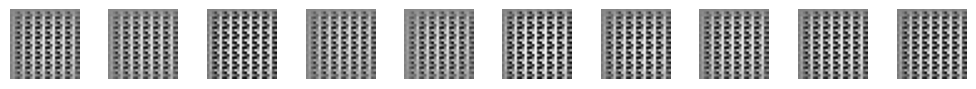

Epoch 1/5, Batch 10, Discriminator Loss: 0.2729467749595642, Generator Loss: 1.7307891845703125
Epoch 1/5, Batch 11, Discriminator Loss: 0.21273304522037506, Generator Loss: 1.9439823627471924
Epoch 1/5, Batch 12, Discriminator Loss: 0.24142321944236755, Generator Loss: 1.7642502784729004
Epoch 1/5, Batch 13, Discriminator Loss: 0.331981360912323, Generator Loss: 1.3909010887145996
Epoch 1/5, Batch 14, Discriminator Loss: 0.8566604256629944, Generator Loss: 0.5776083469390869


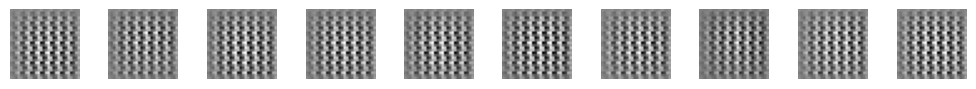

Epoch 1/5, Batch 15, Discriminator Loss: 0.912842333316803, Generator Loss: 0.5433968305587769
Epoch 1/5, Batch 16, Discriminator Loss: 0.6905167698860168, Generator Loss: 0.7367852330207825
Epoch 1/5, Batch 17, Discriminator Loss: 0.6289486885070801, Generator Loss: 0.7943264245986938
Epoch 1/5, Batch 18, Discriminator Loss: 0.5396904349327087, Generator Loss: 0.9105873703956604
Epoch 1/5, Batch 19, Discriminator Loss: 0.4607151746749878, Generator Loss: 1.0482449531555176


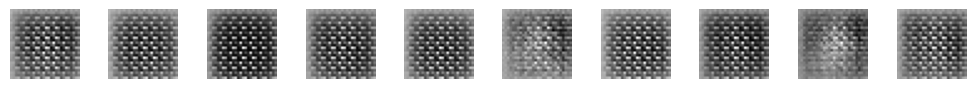

Epoch 1/5, Batch 20, Discriminator Loss: 0.5643892884254456, Generator Loss: 0.8955783843994141
Epoch 1/5, Batch 21, Discriminator Loss: 0.5449950098991394, Generator Loss: 1.148667812347412
Epoch 1/5, Batch 22, Discriminator Loss: 0.5801466703414917, Generator Loss: 0.9861830472946167
Epoch 1/5, Batch 23, Discriminator Loss: 0.6637389659881592, Generator Loss: 0.9115028381347656
Epoch 1/5, Batch 24, Discriminator Loss: 0.6775663495063782, Generator Loss: 0.7737099528312683


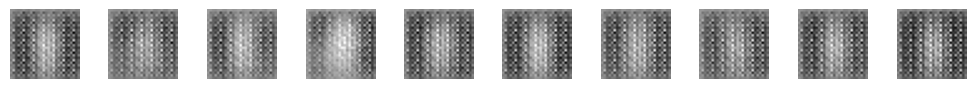

Epoch 1/5, Batch 25, Discriminator Loss: 0.6613913774490356, Generator Loss: 0.7999551296234131
Epoch 1/5, Batch 26, Discriminator Loss: 0.6401627659797668, Generator Loss: 1.2488877773284912
Epoch 1/5, Batch 27, Discriminator Loss: 0.7590625286102295, Generator Loss: 0.6643327474594116
Epoch 1/5, Batch 28, Discriminator Loss: 1.2001785039901733, Generator Loss: 0.4249795377254486
Epoch 1/5, Batch 29, Discriminator Loss: 2.6205532550811768, Generator Loss: 3.2415359020233154


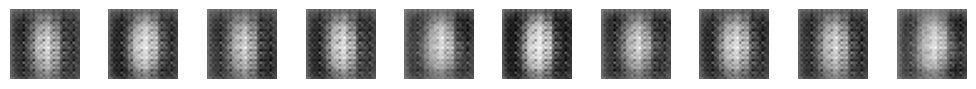

Epoch 1/5, Batch 30, Discriminator Loss: 0.8654117584228516, Generator Loss: 0.5825349688529968
Epoch 1/5, Batch 31, Discriminator Loss: 1.0520634651184082, Generator Loss: 0.48522287607192993
Epoch 1/5, Batch 32, Discriminator Loss: 0.8714517951011658, Generator Loss: 0.6714086532592773
Epoch 1/5, Batch 33, Discriminator Loss: 0.7561110258102417, Generator Loss: 1.0310821533203125
Epoch 1/5, Batch 34, Discriminator Loss: 0.7192120552062988, Generator Loss: 1.046629786491394


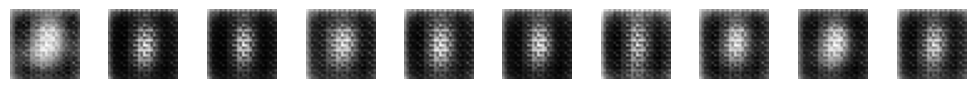

Epoch 1/5, Batch 35, Discriminator Loss: 0.6625946164131165, Generator Loss: 1.2224690914154053
Epoch 1/5, Batch 36, Discriminator Loss: 0.673966109752655, Generator Loss: 1.0138092041015625
Epoch 1/5, Batch 37, Discriminator Loss: 0.7937510013580322, Generator Loss: 1.4735438823699951
Epoch 1/5, Batch 38, Discriminator Loss: 1.3231030702590942, Generator Loss: 0.34418657422065735
Epoch 1/5, Batch 39, Discriminator Loss: 1.1156340837478638, Generator Loss: 1.8330148458480835


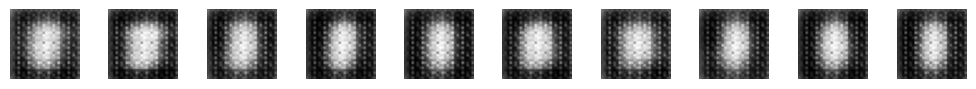

Epoch 1/5, Batch 40, Discriminator Loss: 1.3448946475982666, Generator Loss: 0.3309164345264435
Epoch 1/5, Batch 41, Discriminator Loss: 0.7833325266838074, Generator Loss: 1.0853294134140015
Epoch 1/5, Batch 42, Discriminator Loss: 1.041638970375061, Generator Loss: 0.6144782304763794
Epoch 1/5, Batch 43, Discriminator Loss: 1.009063482284546, Generator Loss: 1.523870825767517
Epoch 1/5, Batch 44, Discriminator Loss: 1.2672967910766602, Generator Loss: 0.3844330310821533


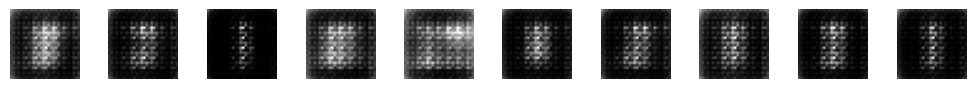

Epoch 1/5, Batch 45, Discriminator Loss: 0.9987102746963501, Generator Loss: 1.9278446435928345
Epoch 1/5, Batch 46, Discriminator Loss: 1.241898536682129, Generator Loss: 0.4333740472793579
Epoch 1/5, Batch 47, Discriminator Loss: 0.8770434856414795, Generator Loss: 1.4597277641296387
Epoch 1/5, Batch 48, Discriminator Loss: 1.1230779886245728, Generator Loss: 0.560772716999054
Epoch 1/5, Batch 49, Discriminator Loss: 1.091712474822998, Generator Loss: 0.9669939875602722


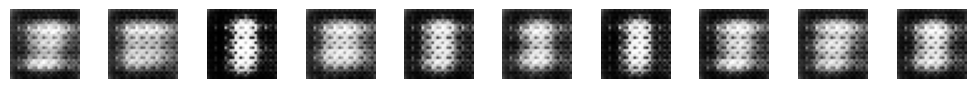

Epoch 1/5, Batch 50, Discriminator Loss: 1.1733242273330688, Generator Loss: 0.5761599540710449
Epoch 1/5, Batch 51, Discriminator Loss: 0.8460931777954102, Generator Loss: 1.228663444519043
Epoch 1/5, Batch 52, Discriminator Loss: 1.4528982639312744, Generator Loss: 0.3409073054790497
Epoch 1/5, Batch 53, Discriminator Loss: 1.1452120542526245, Generator Loss: 1.6122500896453857
Epoch 1/5, Batch 54, Discriminator Loss: 1.3121497631072998, Generator Loss: 0.3797297775745392


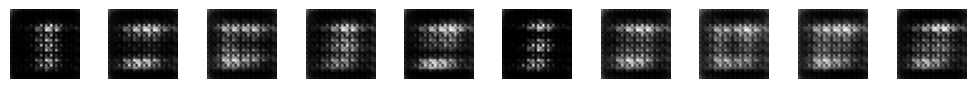

Epoch 1/5, Batch 55, Discriminator Loss: 0.8249578475952148, Generator Loss: 1.6649643182754517
Epoch 1/5, Batch 56, Discriminator Loss: 1.3269119262695312, Generator Loss: 0.43449288606643677
Epoch 1/5, Batch 57, Discriminator Loss: 1.0362828969955444, Generator Loss: 1.1702840328216553
Epoch 1/5, Batch 58, Discriminator Loss: 0.777564287185669, Generator Loss: 1.0445345640182495
Epoch 1/5, Batch 59, Discriminator Loss: 0.6676124930381775, Generator Loss: 1.457563877105713


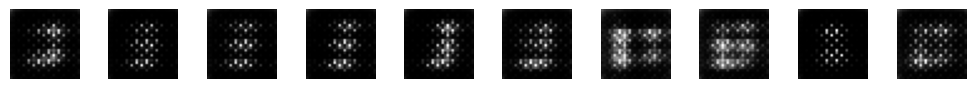

Epoch 1/5, Batch 60, Discriminator Loss: 1.0049524307250977, Generator Loss: 0.6689746379852295
Epoch 1/5, Batch 61, Discriminator Loss: 0.8697919845581055, Generator Loss: 1.9490598440170288
Epoch 1/5, Batch 62, Discriminator Loss: 1.2434909343719482, Generator Loss: 0.4323965311050415
Epoch 1/5, Batch 63, Discriminator Loss: 1.0385438203811646, Generator Loss: 1.1420300006866455
Epoch 1/5, Batch 64, Discriminator Loss: 1.568131685256958, Generator Loss: 0.3955940008163452


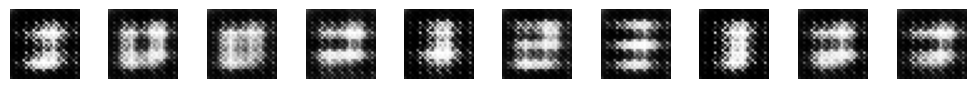

Epoch 1/5, Batch 65, Discriminator Loss: 1.2273478507995605, Generator Loss: 2.1190366744995117
Epoch 1/5, Batch 66, Discriminator Loss: 1.7792677879333496, Generator Loss: 0.2317190319299698
Epoch 1/5, Batch 67, Discriminator Loss: 1.0106773376464844, Generator Loss: 1.3435810804367065
Epoch 1/5, Batch 68, Discriminator Loss: 1.1373820304870605, Generator Loss: 0.63919997215271
Epoch 1/5, Batch 69, Discriminator Loss: 1.0571684837341309, Generator Loss: 1.0179755687713623


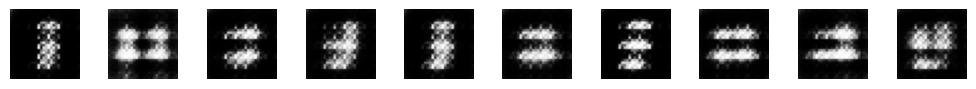

Epoch 1/5, Batch 70, Discriminator Loss: 1.173268437385559, Generator Loss: 0.7127996683120728
Epoch 1/5, Batch 71, Discriminator Loss: 1.0842223167419434, Generator Loss: 1.0497472286224365
Epoch 1/5, Batch 72, Discriminator Loss: 1.1994588375091553, Generator Loss: 0.6590777635574341
Epoch 1/5, Batch 73, Discriminator Loss: 1.1086204051971436, Generator Loss: 1.289933204650879
Epoch 1/5, Batch 74, Discriminator Loss: 1.3040982484817505, Generator Loss: 0.45116788148880005


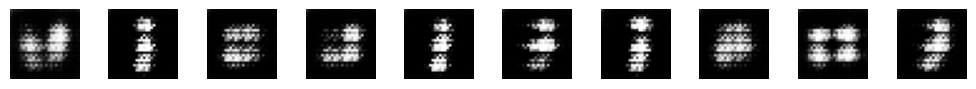

Epoch 1/5, Batch 75, Discriminator Loss: 1.1444274187088013, Generator Loss: 1.7651511430740356
Epoch 1/5, Batch 76, Discriminator Loss: 1.2654345035552979, Generator Loss: 0.4489479660987854
Epoch 1/5, Batch 77, Discriminator Loss: 0.9558906555175781, Generator Loss: 1.2891849279403687
Epoch 1/5, Batch 78, Discriminator Loss: 1.1465389728546143, Generator Loss: 0.6589193344116211
Epoch 1/5, Batch 79, Discriminator Loss: 1.1325668096542358, Generator Loss: 1.0369558334350586


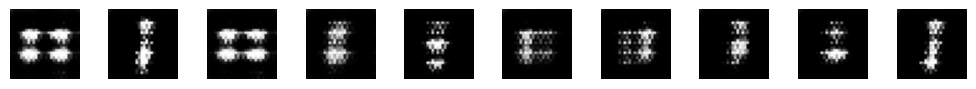

Epoch 1/5, Batch 80, Discriminator Loss: 1.3202061653137207, Generator Loss: 0.5349869728088379
Epoch 1/5, Batch 81, Discriminator Loss: 1.1981055736541748, Generator Loss: 1.5189061164855957
Epoch 1/5, Batch 82, Discriminator Loss: 1.333654761314392, Generator Loss: 0.443169504404068
Epoch 1/5, Batch 83, Discriminator Loss: 0.915804922580719, Generator Loss: 2.0393431186676025
Epoch 1/5, Batch 84, Discriminator Loss: 0.9885243773460388, Generator Loss: 0.6808496117591858


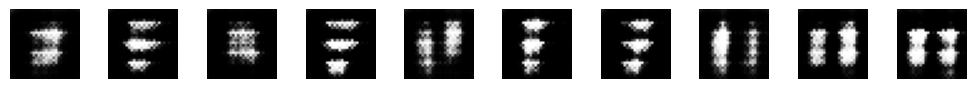

Epoch 1/5, Batch 85, Discriminator Loss: 0.8767656087875366, Generator Loss: 1.2189691066741943
Epoch 1/5, Batch 86, Discriminator Loss: 1.0639262199401855, Generator Loss: 0.7086049318313599
Epoch 1/5, Batch 87, Discriminator Loss: 1.1221306324005127, Generator Loss: 1.0015630722045898
Epoch 1/5, Batch 88, Discriminator Loss: 1.3538010120391846, Generator Loss: 0.5844168066978455
Epoch 1/5, Batch 89, Discriminator Loss: 1.1348702907562256, Generator Loss: 1.4213347434997559


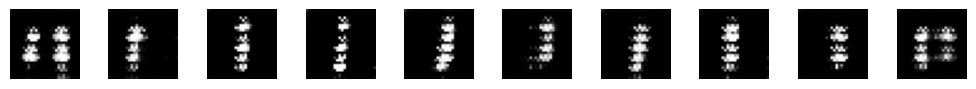

Epoch 1/5, Batch 90, Discriminator Loss: 1.4544309377670288, Generator Loss: 0.3573257327079773
Epoch 1/5, Batch 91, Discriminator Loss: 1.112382411956787, Generator Loss: 2.081831216812134
Epoch 1/5, Batch 92, Discriminator Loss: 1.0667345523834229, Generator Loss: 0.6231651902198792
Epoch 1/5, Batch 93, Discriminator Loss: 0.8412206768989563, Generator Loss: 1.3706694841384888
Epoch 1/5, Batch 94, Discriminator Loss: 0.8295049071311951, Generator Loss: 1.009156584739685


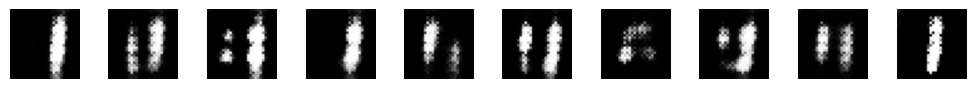

Epoch 1/5, Batch 95, Discriminator Loss: 0.9138794541358948, Generator Loss: 1.0823824405670166
Epoch 1/5, Batch 96, Discriminator Loss: 1.0170085430145264, Generator Loss: 0.771287202835083
Epoch 1/5, Batch 97, Discriminator Loss: 0.9072244763374329, Generator Loss: 1.1613343954086304
Epoch 1/5, Batch 98, Discriminator Loss: 1.2084383964538574, Generator Loss: 0.620307207107544
Epoch 1/5, Batch 99, Discriminator Loss: 1.0912253856658936, Generator Loss: 1.364855170249939


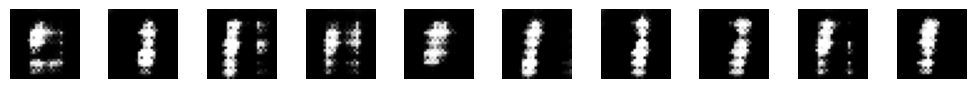

Epoch 1/5, Batch 100, Discriminator Loss: 1.1603976488113403, Generator Loss: 0.5770787000656128
Epoch 1/5, Batch 101, Discriminator Loss: 0.9942699670791626, Generator Loss: 1.6737629175186157
Epoch 1/5, Batch 102, Discriminator Loss: 0.9075709581375122, Generator Loss: 0.7252731323242188
Epoch 1/5, Batch 103, Discriminator Loss: 0.7395743131637573, Generator Loss: 1.5638357400894165
Epoch 1/5, Batch 104, Discriminator Loss: 0.9835482835769653, Generator Loss: 0.7129042744636536


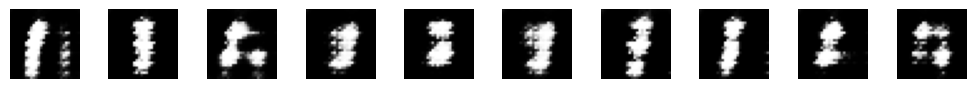

Epoch 1/5, Batch 105, Discriminator Loss: 0.837461531162262, Generator Loss: 1.8248199224472046
Epoch 1/5, Batch 106, Discriminator Loss: 1.2004592418670654, Generator Loss: 0.49102336168289185
Epoch 1/5, Batch 107, Discriminator Loss: 1.0028082132339478, Generator Loss: 1.6885936260223389
Epoch 1/5, Batch 108, Discriminator Loss: 1.2057547569274902, Generator Loss: 0.5152148008346558
Epoch 1/5, Batch 109, Discriminator Loss: 1.000557780265808, Generator Loss: 1.5431532859802246


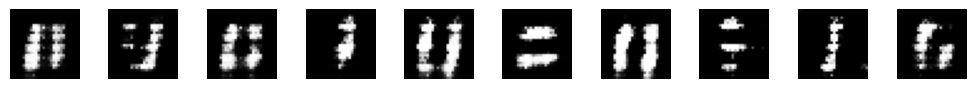

Epoch 1/5, Batch 110, Discriminator Loss: 1.1051619052886963, Generator Loss: 0.6739360690116882
Epoch 1/5, Batch 111, Discriminator Loss: 0.9186779260635376, Generator Loss: 1.660527229309082
Epoch 1/5, Batch 112, Discriminator Loss: 0.9280580282211304, Generator Loss: 0.7892574071884155
Epoch 1/5, Batch 113, Discriminator Loss: 0.8561643958091736, Generator Loss: 1.6873359680175781
Epoch 1/5, Batch 114, Discriminator Loss: 1.0445736646652222, Generator Loss: 0.675569474697113


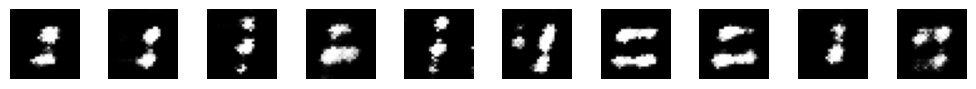

Epoch 1/5, Batch 115, Discriminator Loss: 0.9791290760040283, Generator Loss: 1.2749115228652954
Epoch 1/5, Batch 116, Discriminator Loss: 1.1804221868515015, Generator Loss: 0.6382170915603638
Epoch 1/5, Batch 117, Discriminator Loss: 1.105581283569336, Generator Loss: 1.6680701971054077
Epoch 1/5, Batch 118, Discriminator Loss: 1.1912389993667603, Generator Loss: 0.5580224990844727
Epoch 1/5, Batch 119, Discriminator Loss: 1.0143269300460815, Generator Loss: 1.4579583406448364


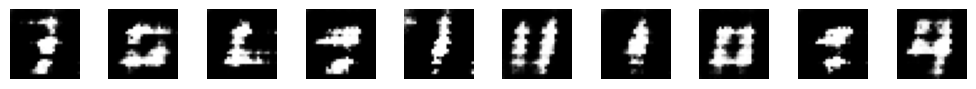

Epoch 1/5, Batch 120, Discriminator Loss: 1.070336103439331, Generator Loss: 0.7288090586662292
Epoch 1/5, Batch 121, Discriminator Loss: 0.8428936004638672, Generator Loss: 2.374854326248169
Epoch 1/5, Batch 122, Discriminator Loss: 0.9399434328079224, Generator Loss: 0.7733281254768372
Epoch 1/5, Batch 123, Discriminator Loss: 0.7417346835136414, Generator Loss: 1.557620644569397
Epoch 1/5, Batch 124, Discriminator Loss: 0.8517391085624695, Generator Loss: 0.9664959907531738


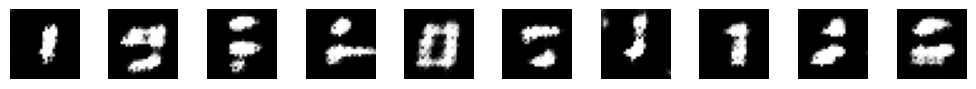

Epoch 1/5, Batch 125, Discriminator Loss: 0.8439601063728333, Generator Loss: 1.5491187572479248
Epoch 1/5, Batch 126, Discriminator Loss: 0.9670169949531555, Generator Loss: 0.8362439274787903
Epoch 1/5, Batch 127, Discriminator Loss: 1.0130599737167358, Generator Loss: 1.5015203952789307
Epoch 1/5, Batch 128, Discriminator Loss: 1.1575329303741455, Generator Loss: 0.6032713055610657
Epoch 1/5, Batch 129, Discriminator Loss: 1.0614601373672485, Generator Loss: 1.7256304025650024


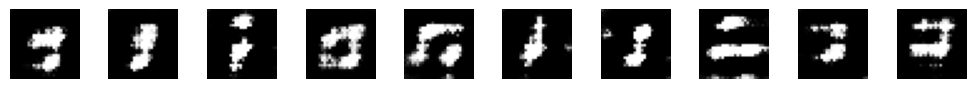

Epoch 1/5, Batch 130, Discriminator Loss: 1.4340637922286987, Generator Loss: 0.4143253266811371
Epoch 1/5, Batch 131, Discriminator Loss: 1.1106908321380615, Generator Loss: 2.4512035846710205
Epoch 1/5, Batch 132, Discriminator Loss: 1.0808491706848145, Generator Loss: 0.6177083849906921
Epoch 1/5, Batch 133, Discriminator Loss: 0.8089836835861206, Generator Loss: 1.5245593786239624
Epoch 1/5, Batch 134, Discriminator Loss: 0.8600460886955261, Generator Loss: 0.972885251045227


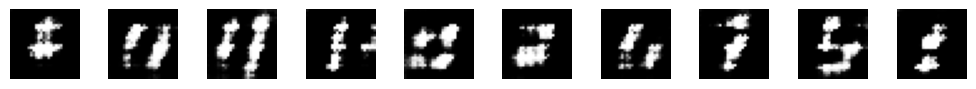

Epoch 1/5, Batch 135, Discriminator Loss: 0.8378410935401917, Generator Loss: 1.3408708572387695
Epoch 1/5, Batch 136, Discriminator Loss: 0.8309537172317505, Generator Loss: 1.07229483127594
Epoch 1/5, Batch 137, Discriminator Loss: 0.8358557224273682, Generator Loss: 1.329145908355713
Epoch 1/5, Batch 138, Discriminator Loss: 0.972590446472168, Generator Loss: 0.8540224432945251
Epoch 1/5, Batch 139, Discriminator Loss: 0.95572829246521, Generator Loss: 1.3309558629989624


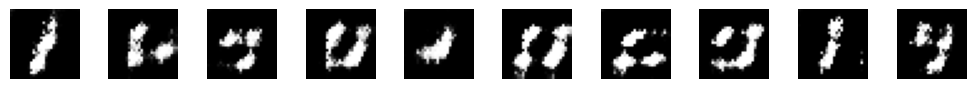

Epoch 1/5, Batch 140, Discriminator Loss: 1.1361490488052368, Generator Loss: 0.6253169775009155
Epoch 1/5, Batch 141, Discriminator Loss: 1.1010494232177734, Generator Loss: 2.0353469848632812
Epoch 1/5, Batch 142, Discriminator Loss: 1.1159358024597168, Generator Loss: 0.5467886924743652
Epoch 1/5, Batch 143, Discriminator Loss: 0.8208557367324829, Generator Loss: 2.0641250610351562
Epoch 1/5, Batch 144, Discriminator Loss: 0.7522962689399719, Generator Loss: 0.9647793769836426


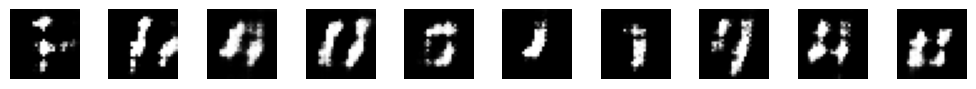

Epoch 1/5, Batch 145, Discriminator Loss: 0.7293175458908081, Generator Loss: 1.4287593364715576
Epoch 1/5, Batch 146, Discriminator Loss: 0.8562322854995728, Generator Loss: 1.0029504299163818
Epoch 1/5, Batch 147, Discriminator Loss: 0.8203564882278442, Generator Loss: 1.4076329469680786
Epoch 1/5, Batch 148, Discriminator Loss: 1.1397449970245361, Generator Loss: 0.6911062002182007
Epoch 1/5, Batch 149, Discriminator Loss: 1.0343875885009766, Generator Loss: 1.5709095001220703


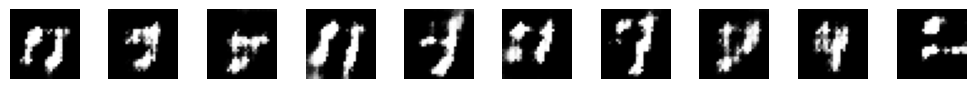

Epoch 1/5, Batch 150, Discriminator Loss: 1.3661649227142334, Generator Loss: 0.4623705744743347
Epoch 1/5, Batch 151, Discriminator Loss: 1.179587483406067, Generator Loss: 2.293914318084717
Epoch 1/5, Batch 152, Discriminator Loss: 1.031872034072876, Generator Loss: 0.614965558052063
Epoch 1/5, Batch 153, Discriminator Loss: 0.8024997115135193, Generator Loss: 1.7785356044769287
Epoch 1/5, Batch 154, Discriminator Loss: 0.9420405626296997, Generator Loss: 0.8253226280212402


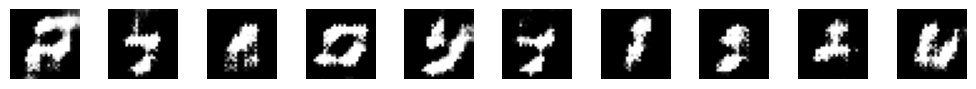

Epoch 1/5, Batch 155, Discriminator Loss: 0.7599202394485474, Generator Loss: 2.7703661918640137
Epoch 1/5, Batch 156, Discriminator Loss: 0.9678003191947937, Generator Loss: 0.6539775133132935
Epoch 1/5, Batch 157, Discriminator Loss: 0.6796544790267944, Generator Loss: 1.932105302810669
Epoch 1/5, Batch 158, Discriminator Loss: 0.9153828024864197, Generator Loss: 0.8392940163612366
Epoch 1/5, Batch 159, Discriminator Loss: 0.8115547299385071, Generator Loss: 1.926506757736206


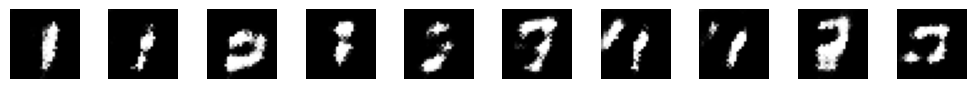

Epoch 1/5, Batch 160, Discriminator Loss: 0.924506425857544, Generator Loss: 0.7821753621101379
Epoch 1/5, Batch 161, Discriminator Loss: 0.9197947978973389, Generator Loss: 1.6946955919265747
Epoch 1/5, Batch 162, Discriminator Loss: 0.9851197004318237, Generator Loss: 0.7810906171798706
Epoch 1/5, Batch 163, Discriminator Loss: 0.8953206539154053, Generator Loss: 1.457687258720398
Epoch 1/5, Batch 164, Discriminator Loss: 1.1264110803604126, Generator Loss: 0.8256022334098816


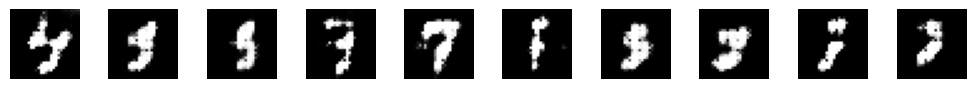

Epoch 1/5, Batch 165, Discriminator Loss: 0.8742194175720215, Generator Loss: 2.282447576522827
Epoch 1/5, Batch 166, Discriminator Loss: 1.2534666061401367, Generator Loss: 0.4988359808921814
Epoch 1/5, Batch 167, Discriminator Loss: 0.8107848763465881, Generator Loss: 1.9730665683746338
Epoch 1/5, Batch 168, Discriminator Loss: 0.9472274780273438, Generator Loss: 0.8529337644577026
Epoch 1/5, Batch 169, Discriminator Loss: 0.7647570371627808, Generator Loss: 1.7472468614578247


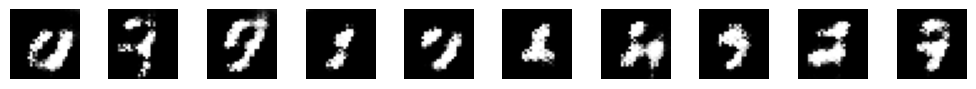

Epoch 1/5, Batch 170, Discriminator Loss: 0.7494856119155884, Generator Loss: 1.1031031608581543
Epoch 1/5, Batch 171, Discriminator Loss: 0.7456132769584656, Generator Loss: 1.5808557271957397
Epoch 1/5, Batch 172, Discriminator Loss: 0.71288001537323, Generator Loss: 1.1271146535873413
Epoch 1/5, Batch 173, Discriminator Loss: 0.8009400367736816, Generator Loss: 1.3950387239456177
Epoch 1/5, Batch 174, Discriminator Loss: 0.8034781217575073, Generator Loss: 1.1154894828796387


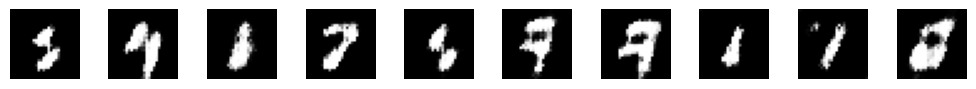

Epoch 1/5, Batch 175, Discriminator Loss: 0.9069834351539612, Generator Loss: 2.042996883392334
Epoch 1/5, Batch 176, Discriminator Loss: 1.5510873794555664, Generator Loss: 0.3606647849082947
Epoch 1/5, Batch 177, Discriminator Loss: 1.052494764328003, Generator Loss: 2.293833017349243
Epoch 1/5, Batch 178, Discriminator Loss: 1.7450485229492188, Generator Loss: 0.356404185295105
Epoch 1/5, Batch 179, Discriminator Loss: 1.1196845769882202, Generator Loss: 2.7512989044189453


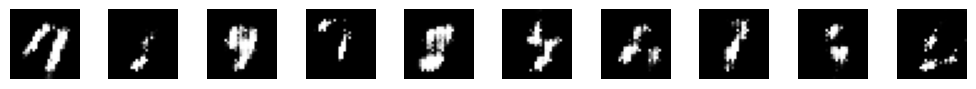

Epoch 1/5, Batch 180, Discriminator Loss: 1.0462512969970703, Generator Loss: 0.7821412086486816
Epoch 1/5, Batch 181, Discriminator Loss: 0.8330155611038208, Generator Loss: 1.6127965450286865
Epoch 1/5, Batch 182, Discriminator Loss: 0.8091698288917542, Generator Loss: 1.1479146480560303
Epoch 1/5, Batch 183, Discriminator Loss: 0.7366980910301208, Generator Loss: 1.555335521697998
Epoch 1/5, Batch 184, Discriminator Loss: 0.815812349319458, Generator Loss: 1.260791301727295


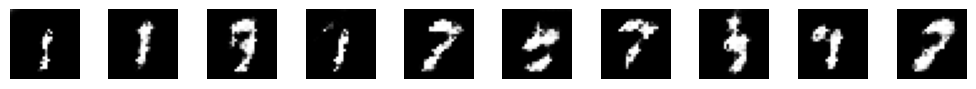

Epoch 1/5, Batch 185, Discriminator Loss: 0.8059605360031128, Generator Loss: 1.3317453861236572
Epoch 1/5, Batch 186, Discriminator Loss: 0.8677148818969727, Generator Loss: 1.1946947574615479
Epoch 1/5, Batch 187, Discriminator Loss: 0.8831998109817505, Generator Loss: 1.266782283782959
Epoch 1/5, Batch 188, Discriminator Loss: 0.9767657518386841, Generator Loss: 0.9919970631599426
Epoch 1/5, Batch 189, Discriminator Loss: 1.0082955360412598, Generator Loss: 1.5082266330718994


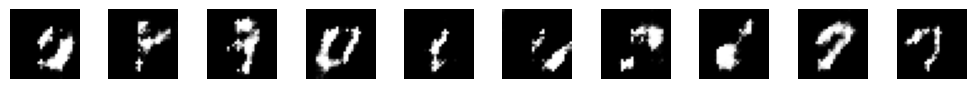

Epoch 1/5, Batch 190, Discriminator Loss: 1.1782864332199097, Generator Loss: 0.6319050192832947
Epoch 1/5, Batch 191, Discriminator Loss: 1.151790976524353, Generator Loss: 2.1225523948669434
Epoch 1/5, Batch 192, Discriminator Loss: 1.5705655813217163, Generator Loss: 0.3857356309890747
Epoch 1/5, Batch 193, Discriminator Loss: 1.09941828250885, Generator Loss: 3.6459102630615234
Epoch 1/5, Batch 194, Discriminator Loss: 1.0732134580612183, Generator Loss: 0.6630668640136719


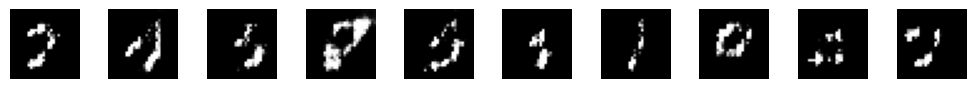

Epoch 1/5, Batch 195, Discriminator Loss: 0.5875506401062012, Generator Loss: 2.4936583042144775
Epoch 1/5, Batch 196, Discriminator Loss: 0.7895267009735107, Generator Loss: 1.0423932075500488
Epoch 1/5, Batch 197, Discriminator Loss: 0.7176947593688965, Generator Loss: 1.461371898651123
Epoch 1/5, Batch 198, Discriminator Loss: 0.8162180185317993, Generator Loss: 1.319441795349121
Epoch 1/5, Batch 199, Discriminator Loss: 0.9095648527145386, Generator Loss: 1.3019440174102783


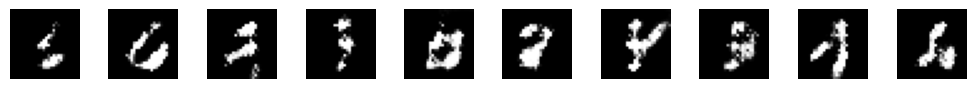

Epoch 1/5, Batch 200, Discriminator Loss: 1.2132034301757812, Generator Loss: 0.8481858968734741
Epoch 1/5, Batch 201, Discriminator Loss: 1.1848560571670532, Generator Loss: 1.2493404150009155
Epoch 1/5, Batch 202, Discriminator Loss: 1.1906132698059082, Generator Loss: 0.7638939619064331
Epoch 1/5, Batch 203, Discriminator Loss: 1.1441154479980469, Generator Loss: 1.7548599243164062
Epoch 1/5, Batch 204, Discriminator Loss: 1.196555495262146, Generator Loss: 0.6386734843254089


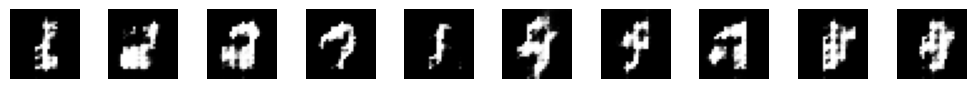

Epoch 1/5, Batch 205, Discriminator Loss: 1.1158941984176636, Generator Loss: 2.6077256202697754
Epoch 1/5, Batch 206, Discriminator Loss: 1.1187210083007812, Generator Loss: 0.6361724734306335
Epoch 1/5, Batch 207, Discriminator Loss: 0.8635956048965454, Generator Loss: 1.9691241979599
Epoch 1/5, Batch 208, Discriminator Loss: 1.1163687705993652, Generator Loss: 0.7797964811325073
Epoch 1/5, Batch 209, Discriminator Loss: 0.9092494249343872, Generator Loss: 2.312506675720215


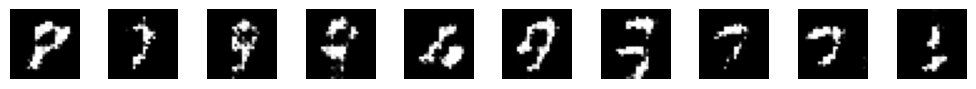

Epoch 1/5, Batch 210, Discriminator Loss: 1.079727053642273, Generator Loss: 0.6679095029830933
Epoch 1/5, Batch 211, Discriminator Loss: 0.8288171887397766, Generator Loss: 1.8687002658843994
Epoch 1/5, Batch 212, Discriminator Loss: 0.923884391784668, Generator Loss: 0.8917602300643921
Epoch 1/5, Batch 213, Discriminator Loss: 0.819181501865387, Generator Loss: 1.5613957643508911
Epoch 1/5, Batch 214, Discriminator Loss: 0.9453405141830444, Generator Loss: 1.0156517028808594


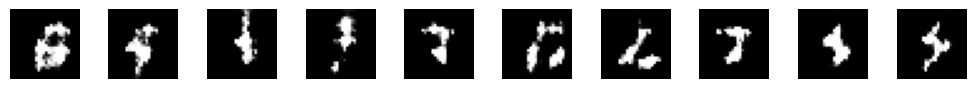

Epoch 1/5, Batch 215, Discriminator Loss: 1.0709224939346313, Generator Loss: 1.2443338632583618
Epoch 1/5, Batch 216, Discriminator Loss: 1.1788291931152344, Generator Loss: 0.7535958886146545
Epoch 1/5, Batch 217, Discriminator Loss: 1.1891515254974365, Generator Loss: 1.4969396591186523
Epoch 1/5, Batch 218, Discriminator Loss: 1.4888386726379395, Generator Loss: 0.4803943932056427
Epoch 1/5, Batch 219, Discriminator Loss: 1.225541591644287, Generator Loss: 2.5003116130828857


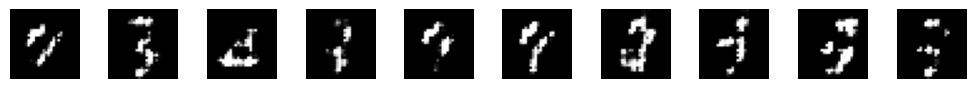

Epoch 1/5, Batch 220, Discriminator Loss: 1.2088780403137207, Generator Loss: 0.578184962272644
Epoch 1/5, Batch 221, Discriminator Loss: 0.7941830158233643, Generator Loss: 1.727231502532959
Epoch 1/5, Batch 222, Discriminator Loss: 1.4337108135223389, Generator Loss: 0.5312961935997009
Epoch 1/5, Batch 223, Discriminator Loss: 1.0730458498001099, Generator Loss: 2.3626060485839844
Epoch 1/5, Batch 224, Discriminator Loss: 1.1774978637695312, Generator Loss: 0.6765958666801453


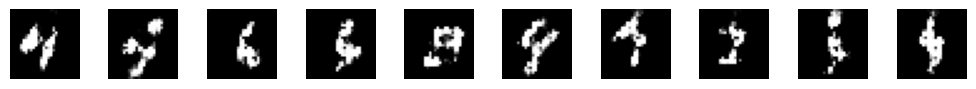

Epoch 1/5, Batch 225, Discriminator Loss: 0.9544620513916016, Generator Loss: 1.5472393035888672
Epoch 1/5, Batch 226, Discriminator Loss: 0.9881330132484436, Generator Loss: 0.9270885586738586
Epoch 1/5, Batch 227, Discriminator Loss: 0.8175305128097534, Generator Loss: 1.4761122465133667
Epoch 1/5, Batch 228, Discriminator Loss: 0.878944993019104, Generator Loss: 0.9813482761383057
Epoch 1/5, Batch 229, Discriminator Loss: 0.865293025970459, Generator Loss: 1.6711119413375854


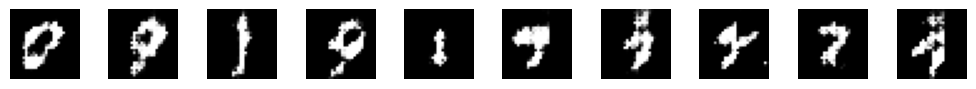

Epoch 1/5, Batch 230, Discriminator Loss: 0.98017418384552, Generator Loss: 0.8372974991798401
Epoch 1/5, Batch 231, Discriminator Loss: 0.9723140597343445, Generator Loss: 1.9619359970092773
Epoch 1/5, Batch 232, Discriminator Loss: 1.272613525390625, Generator Loss: 0.5520903468132019
Epoch 1/5, Batch 233, Discriminator Loss: 1.0037466287612915, Generator Loss: 1.7905365228652954
Epoch 1/5, Batch 234, Discriminator Loss: 1.3643345832824707, Generator Loss: 0.48474106192588806


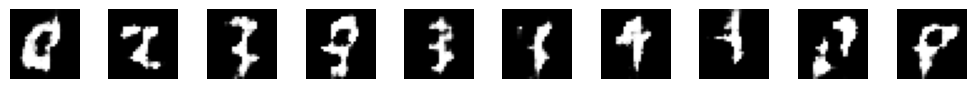

End of epoch 1, Discriminator Loss: 1.3643345832824707, Generator Loss: 0.48474106192588806
Epoch 2/5, Batch 0, Discriminator Loss: 1.3023005723953247, Generator Loss: 1.9018945693969727
Epoch 2/5, Batch 1, Discriminator Loss: 1.4602659940719604, Generator Loss: 0.4597998857498169
Epoch 2/5, Batch 2, Discriminator Loss: 1.1592310667037964, Generator Loss: 1.609180212020874
Epoch 2/5, Batch 3, Discriminator Loss: 1.2394070625305176, Generator Loss: 0.697927713394165
Epoch 2/5, Batch 4, Discriminator Loss: 1.0772817134857178, Generator Loss: 1.2750493288040161


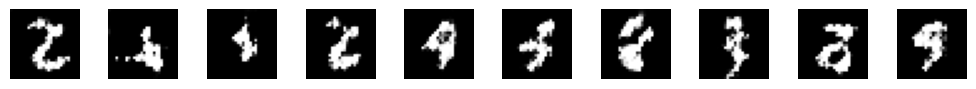

Epoch 2/5, Batch 5, Discriminator Loss: 1.0939970016479492, Generator Loss: 0.91221684217453
Epoch 2/5, Batch 6, Discriminator Loss: 1.035888433456421, Generator Loss: 1.396335244178772
Epoch 2/5, Batch 7, Discriminator Loss: 1.106431007385254, Generator Loss: 0.7754216194152832
Epoch 2/5, Batch 8, Discriminator Loss: 0.8710879683494568, Generator Loss: 1.6589410305023193
Epoch 2/5, Batch 9, Discriminator Loss: 0.9084458351135254, Generator Loss: 0.9021410942077637


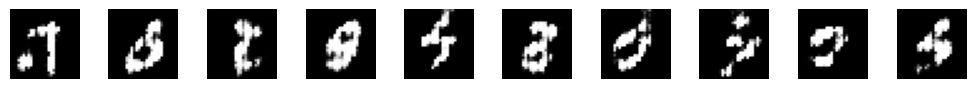

Epoch 2/5, Batch 10, Discriminator Loss: 0.7173774242401123, Generator Loss: 2.290180206298828
Epoch 2/5, Batch 11, Discriminator Loss: 1.0509907007217407, Generator Loss: 0.7024129629135132
Epoch 2/5, Batch 12, Discriminator Loss: 0.9057702422142029, Generator Loss: 1.6514105796813965
Epoch 2/5, Batch 13, Discriminator Loss: 1.1396403312683105, Generator Loss: 0.6647764444351196
Epoch 2/5, Batch 14, Discriminator Loss: 1.0973941087722778, Generator Loss: 1.6177754402160645


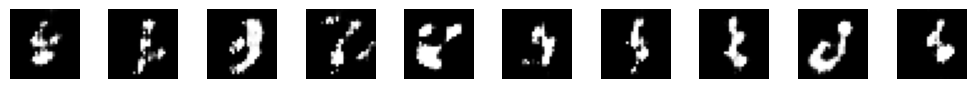

Epoch 2/5, Batch 15, Discriminator Loss: 1.3683724403381348, Generator Loss: 0.5078525543212891
Epoch 2/5, Batch 16, Discriminator Loss: 1.187072515487671, Generator Loss: 1.5707087516784668
Epoch 2/5, Batch 17, Discriminator Loss: 1.3461918830871582, Generator Loss: 0.550983726978302
Epoch 2/5, Batch 18, Discriminator Loss: 1.2053420543670654, Generator Loss: 1.5306814908981323
Epoch 2/5, Batch 19, Discriminator Loss: 1.1870903968811035, Generator Loss: 0.7248357534408569


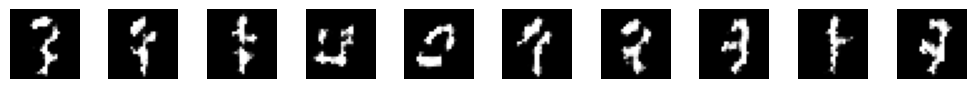

Epoch 2/5, Batch 20, Discriminator Loss: 0.9428818225860596, Generator Loss: 1.3694877624511719
Epoch 2/5, Batch 21, Discriminator Loss: 1.2176893949508667, Generator Loss: 0.7410796880722046
Epoch 2/5, Batch 22, Discriminator Loss: 1.0150353908538818, Generator Loss: 2.4957451820373535
Epoch 2/5, Batch 23, Discriminator Loss: 1.2640137672424316, Generator Loss: 0.5221976637840271
Epoch 2/5, Batch 24, Discriminator Loss: 0.933957576751709, Generator Loss: 1.8175781965255737


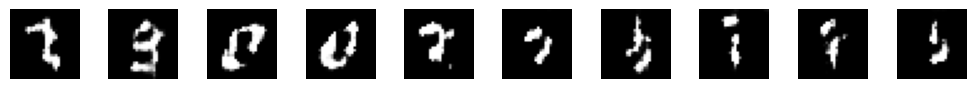

Epoch 2/5, Batch 25, Discriminator Loss: 0.9276913404464722, Generator Loss: 0.8935558795928955
Epoch 2/5, Batch 26, Discriminator Loss: 0.8545970916748047, Generator Loss: 1.44758939743042
Epoch 2/5, Batch 27, Discriminator Loss: 0.9661405086517334, Generator Loss: 0.8660479784011841
Epoch 2/5, Batch 28, Discriminator Loss: 1.04732084274292, Generator Loss: 1.5167279243469238
Epoch 2/5, Batch 29, Discriminator Loss: 1.1423842906951904, Generator Loss: 0.6798248887062073


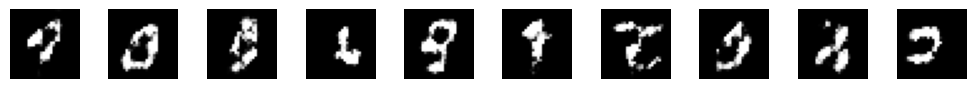

Epoch 2/5, Batch 30, Discriminator Loss: 1.0968174934387207, Generator Loss: 1.6043226718902588
Epoch 2/5, Batch 31, Discriminator Loss: 1.2242116928100586, Generator Loss: 0.5911535024642944
Epoch 2/5, Batch 32, Discriminator Loss: 1.0697319507598877, Generator Loss: 1.6051969528198242
Epoch 2/5, Batch 33, Discriminator Loss: 1.1981549263000488, Generator Loss: 0.6854902505874634
Epoch 2/5, Batch 34, Discriminator Loss: 1.061658263206482, Generator Loss: 1.445948600769043


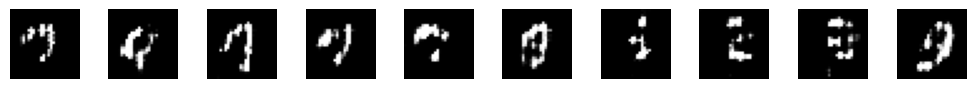

Epoch 2/5, Batch 35, Discriminator Loss: 0.8744885921478271, Generator Loss: 0.9960654973983765
Epoch 2/5, Batch 36, Discriminator Loss: 0.9245086908340454, Generator Loss: 1.2755894660949707
Epoch 2/5, Batch 37, Discriminator Loss: 0.9116831421852112, Generator Loss: 0.9628591537475586
Epoch 2/5, Batch 38, Discriminator Loss: 0.8304896354675293, Generator Loss: 2.9934208393096924
Epoch 2/5, Batch 39, Discriminator Loss: 1.518810510635376, Generator Loss: 0.34974372386932373


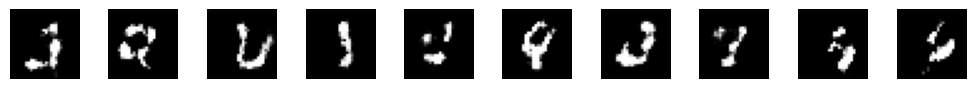

Epoch 2/5, Batch 40, Discriminator Loss: 0.8437882661819458, Generator Loss: 1.9453513622283936
Epoch 2/5, Batch 41, Discriminator Loss: 1.1714040040969849, Generator Loss: 0.6294859647750854
Epoch 2/5, Batch 42, Discriminator Loss: 1.083686351776123, Generator Loss: 1.5884010791778564
Epoch 2/5, Batch 43, Discriminator Loss: 1.2482402324676514, Generator Loss: 0.6147000789642334
Epoch 2/5, Batch 44, Discriminator Loss: 1.211445689201355, Generator Loss: 1.3802523612976074


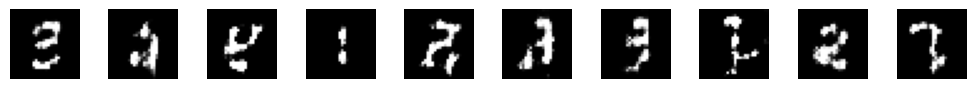

Epoch 2/5, Batch 45, Discriminator Loss: 1.2704453468322754, Generator Loss: 0.6333682537078857
Epoch 2/5, Batch 46, Discriminator Loss: 1.0673586130142212, Generator Loss: 1.4642679691314697
Epoch 2/5, Batch 47, Discriminator Loss: 1.2515299320220947, Generator Loss: 0.6593133211135864
Epoch 2/5, Batch 48, Discriminator Loss: 1.1027168035507202, Generator Loss: 2.1119556427001953
Epoch 2/5, Batch 49, Discriminator Loss: 1.1531603336334229, Generator Loss: 0.6130920648574829


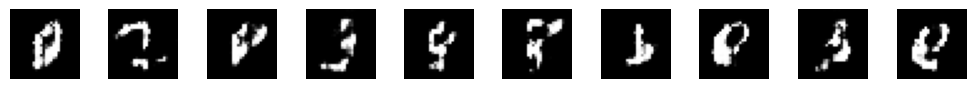

Epoch 2/5, Batch 50, Discriminator Loss: 0.82599937915802, Generator Loss: 1.6288495063781738
Epoch 2/5, Batch 51, Discriminator Loss: 0.8551979064941406, Generator Loss: 1.0035051107406616
Epoch 2/5, Batch 52, Discriminator Loss: 0.9017623662948608, Generator Loss: 1.3678627014160156
Epoch 2/5, Batch 53, Discriminator Loss: 0.9105291366577148, Generator Loss: 1.1357241868972778
Epoch 2/5, Batch 54, Discriminator Loss: 1.016037940979004, Generator Loss: 1.2061433792114258


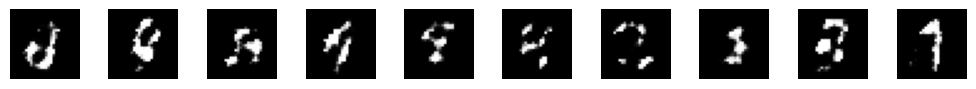

Epoch 2/5, Batch 55, Discriminator Loss: 1.1738760471343994, Generator Loss: 0.7151080965995789
Epoch 2/5, Batch 56, Discriminator Loss: 0.9091393351554871, Generator Loss: 1.3922744989395142
Epoch 2/5, Batch 57, Discriminator Loss: 1.6436275243759155, Generator Loss: 0.44251999258995056
Epoch 2/5, Batch 58, Discriminator Loss: 1.3416918516159058, Generator Loss: 2.5875868797302246
Epoch 2/5, Batch 59, Discriminator Loss: 1.2858953475952148, Generator Loss: 0.5088467597961426


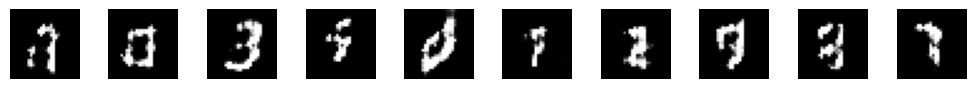

Epoch 2/5, Batch 60, Discriminator Loss: 1.0222282409667969, Generator Loss: 1.5251903533935547
Epoch 2/5, Batch 61, Discriminator Loss: 0.9405192732810974, Generator Loss: 0.9104562401771545
Epoch 2/5, Batch 62, Discriminator Loss: 0.8891217708587646, Generator Loss: 1.2541029453277588
Epoch 2/5, Batch 63, Discriminator Loss: 0.9265806674957275, Generator Loss: 1.0982204675674438
Epoch 2/5, Batch 64, Discriminator Loss: 0.8969528675079346, Generator Loss: 1.1912405490875244


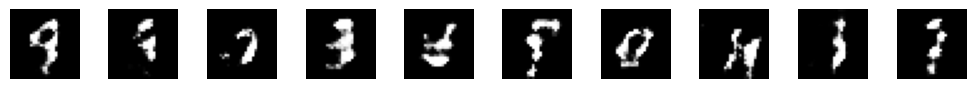

Epoch 2/5, Batch 65, Discriminator Loss: 1.1313364505767822, Generator Loss: 0.849872887134552
Epoch 2/5, Batch 66, Discriminator Loss: 0.9464931488037109, Generator Loss: 1.326676368713379
Epoch 2/5, Batch 67, Discriminator Loss: 1.2423393726348877, Generator Loss: 0.6458025574684143
Epoch 2/5, Batch 68, Discriminator Loss: 1.2308318614959717, Generator Loss: 1.6580595970153809
Epoch 2/5, Batch 69, Discriminator Loss: 1.3027533292770386, Generator Loss: 0.4929407238960266


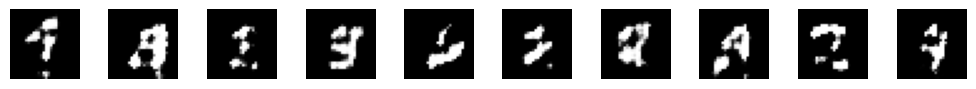

Epoch 2/5, Batch 70, Discriminator Loss: 1.2778810262680054, Generator Loss: 2.0917277336120605
Epoch 2/5, Batch 71, Discriminator Loss: 1.177978515625, Generator Loss: 0.6104385852813721
Epoch 2/5, Batch 72, Discriminator Loss: 0.7269883751869202, Generator Loss: 2.0154483318328857
Epoch 2/5, Batch 73, Discriminator Loss: 1.2577881813049316, Generator Loss: 0.6129910349845886
Epoch 2/5, Batch 74, Discriminator Loss: 1.1227836608886719, Generator Loss: 1.6761391162872314


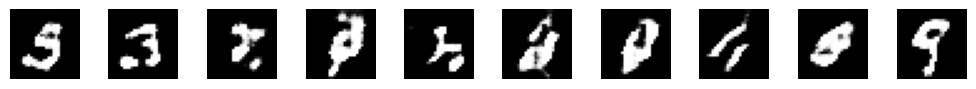

Epoch 2/5, Batch 75, Discriminator Loss: 0.8935114145278931, Generator Loss: 0.9414272904396057
Epoch 2/5, Batch 76, Discriminator Loss: 0.9415640830993652, Generator Loss: 1.8036742210388184
Epoch 2/5, Batch 77, Discriminator Loss: 1.3401429653167725, Generator Loss: 0.5084211826324463
Epoch 2/5, Batch 78, Discriminator Loss: 0.9855490922927856, Generator Loss: 1.4247888326644897
Epoch 2/5, Batch 79, Discriminator Loss: 1.0760825872421265, Generator Loss: 0.78936767578125


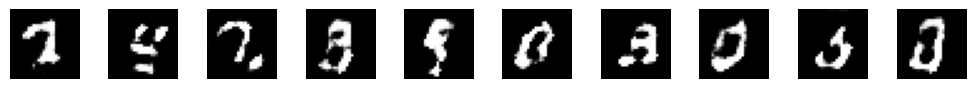

Epoch 2/5, Batch 80, Discriminator Loss: 1.193023443222046, Generator Loss: 1.0428091287612915
Epoch 2/5, Batch 81, Discriminator Loss: 1.1216182708740234, Generator Loss: 0.9794561266899109
Epoch 2/5, Batch 82, Discriminator Loss: 0.99977707862854, Generator Loss: 1.4318993091583252
Epoch 2/5, Batch 83, Discriminator Loss: 1.234189748764038, Generator Loss: 0.6228304505348206
Epoch 2/5, Batch 84, Discriminator Loss: 0.9333680868148804, Generator Loss: 1.4822481870651245


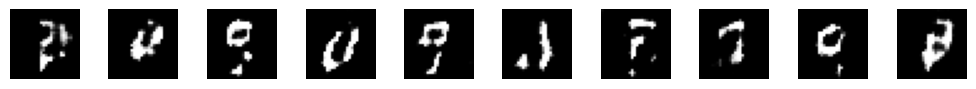

Epoch 2/5, Batch 85, Discriminator Loss: 0.9133111238479614, Generator Loss: 0.8677850961685181
Epoch 2/5, Batch 86, Discriminator Loss: 0.8927655816078186, Generator Loss: 1.3568753004074097
Epoch 2/5, Batch 87, Discriminator Loss: 1.0657737255096436, Generator Loss: 0.792906641960144
Epoch 2/5, Batch 88, Discriminator Loss: 1.0704435110092163, Generator Loss: 2.8791799545288086
Epoch 2/5, Batch 89, Discriminator Loss: 1.6112725734710693, Generator Loss: 0.2968137860298157


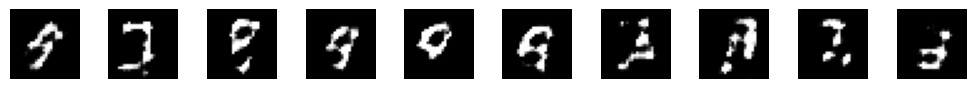

Epoch 2/5, Batch 90, Discriminator Loss: 1.0111048221588135, Generator Loss: 1.5601433515548706
Epoch 2/5, Batch 91, Discriminator Loss: 1.1597673892974854, Generator Loss: 0.6522331833839417
Epoch 2/5, Batch 92, Discriminator Loss: 1.1375900506973267, Generator Loss: 1.2799837589263916
Epoch 2/5, Batch 93, Discriminator Loss: 1.2085676193237305, Generator Loss: 0.6912205815315247
Epoch 2/5, Batch 94, Discriminator Loss: 1.090062141418457, Generator Loss: 1.7982807159423828


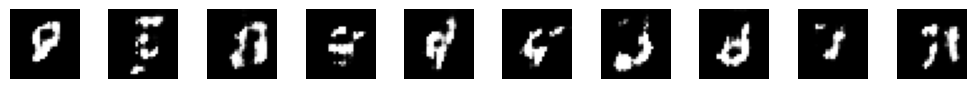

Epoch 2/5, Batch 95, Discriminator Loss: 1.2027137279510498, Generator Loss: 0.5797029733657837
Epoch 2/5, Batch 96, Discriminator Loss: 0.9927703142166138, Generator Loss: 1.521442174911499
Epoch 2/5, Batch 97, Discriminator Loss: 0.9323800802230835, Generator Loss: 0.8622313737869263
Epoch 2/5, Batch 98, Discriminator Loss: 0.8602394461631775, Generator Loss: 1.3362088203430176
Epoch 2/5, Batch 99, Discriminator Loss: 0.971234917640686, Generator Loss: 0.9327144026756287


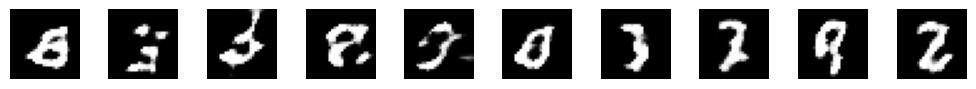

Epoch 2/5, Batch 100, Discriminator Loss: 0.9186117649078369, Generator Loss: 1.45552659034729
Epoch 2/5, Batch 101, Discriminator Loss: 1.026181697845459, Generator Loss: 0.772172749042511
Epoch 2/5, Batch 102, Discriminator Loss: 1.0662519931793213, Generator Loss: 1.4175370931625366
Epoch 2/5, Batch 103, Discriminator Loss: 1.0015515089035034, Generator Loss: 0.7473561763763428
Epoch 2/5, Batch 104, Discriminator Loss: 0.930677592754364, Generator Loss: 1.4455214738845825


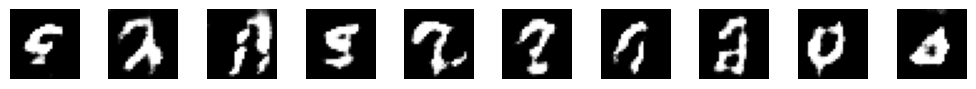

Epoch 2/5, Batch 105, Discriminator Loss: 1.40113365650177, Generator Loss: 0.4922364354133606
Epoch 2/5, Batch 106, Discriminator Loss: 1.3834553956985474, Generator Loss: 3.649352550506592
Epoch 2/5, Batch 107, Discriminator Loss: 1.3032138347625732, Generator Loss: 0.4796653389930725
Epoch 2/5, Batch 108, Discriminator Loss: 0.9499666690826416, Generator Loss: 1.471805453300476
Epoch 2/5, Batch 109, Discriminator Loss: 0.8826884627342224, Generator Loss: 0.9788933992385864


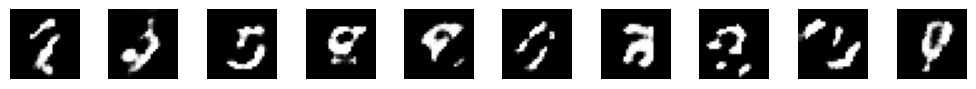

Epoch 2/5, Batch 110, Discriminator Loss: 0.9858065843582153, Generator Loss: 1.1167380809783936
Epoch 2/5, Batch 111, Discriminator Loss: 0.9572255611419678, Generator Loss: 1.0260140895843506
Epoch 2/5, Batch 112, Discriminator Loss: 0.9423942565917969, Generator Loss: 1.4407976865768433
Epoch 2/5, Batch 113, Discriminator Loss: 1.0809036493301392, Generator Loss: 0.7124735713005066
Epoch 2/5, Batch 114, Discriminator Loss: 1.036531925201416, Generator Loss: 1.5590206384658813


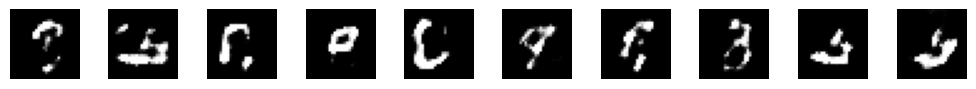

Epoch 2/5, Batch 115, Discriminator Loss: 1.0236176252365112, Generator Loss: 0.7250311374664307
Epoch 2/5, Batch 116, Discriminator Loss: 1.0206180810928345, Generator Loss: 1.684565544128418
Epoch 2/5, Batch 117, Discriminator Loss: 1.2416951656341553, Generator Loss: 0.5343819260597229
Epoch 2/5, Batch 118, Discriminator Loss: 1.1870616674423218, Generator Loss: 2.4462413787841797
Epoch 2/5, Batch 119, Discriminator Loss: 1.2026078701019287, Generator Loss: 0.5243964791297913


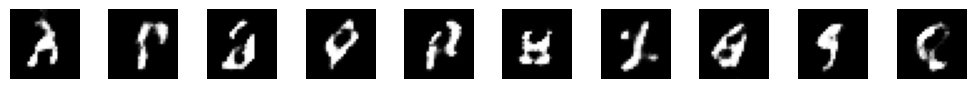

Epoch 2/5, Batch 120, Discriminator Loss: 0.9574421644210815, Generator Loss: 1.4915473461151123
Epoch 2/5, Batch 121, Discriminator Loss: 0.9812343120574951, Generator Loss: 0.8576257824897766
Epoch 2/5, Batch 122, Discriminator Loss: 0.9548554420471191, Generator Loss: 1.268480658531189
Epoch 2/5, Batch 123, Discriminator Loss: 0.9364582300186157, Generator Loss: 1.0614802837371826
Epoch 2/5, Batch 124, Discriminator Loss: 0.8909675478935242, Generator Loss: 1.3252989053726196


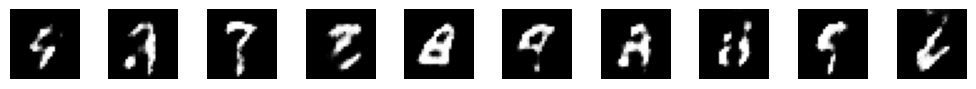

Epoch 2/5, Batch 125, Discriminator Loss: 1.0557903051376343, Generator Loss: 0.7405821681022644
Epoch 2/5, Batch 126, Discriminator Loss: 0.8998432159423828, Generator Loss: 1.6112985610961914
Epoch 2/5, Batch 127, Discriminator Loss: 1.2449105978012085, Generator Loss: 0.5593229532241821
Epoch 2/5, Batch 128, Discriminator Loss: 1.2229537963867188, Generator Loss: 1.851409912109375
Epoch 2/5, Batch 129, Discriminator Loss: 1.2131884098052979, Generator Loss: 0.5171571969985962


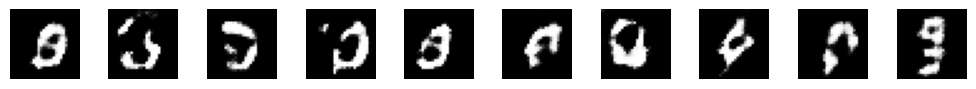

Epoch 2/5, Batch 130, Discriminator Loss: 1.1757142543792725, Generator Loss: 2.1509838104248047
Epoch 2/5, Batch 131, Discriminator Loss: 1.183170199394226, Generator Loss: 0.533494234085083
Epoch 2/5, Batch 132, Discriminator Loss: 0.7883554697036743, Generator Loss: 2.0443220138549805
Epoch 2/5, Batch 133, Discriminator Loss: 1.2678037881851196, Generator Loss: 0.5858381986618042
Epoch 2/5, Batch 134, Discriminator Loss: 1.0287878513336182, Generator Loss: 1.5468758344650269


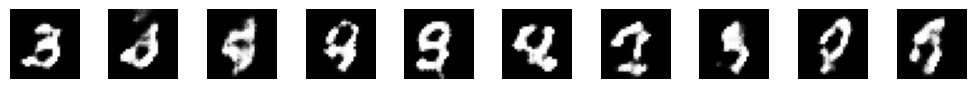

Epoch 2/5, Batch 135, Discriminator Loss: 0.9844401478767395, Generator Loss: 0.8756822347640991
Epoch 2/5, Batch 136, Discriminator Loss: 0.9242094159126282, Generator Loss: 1.8768092393875122
Epoch 2/5, Batch 137, Discriminator Loss: 1.1999844312667847, Generator Loss: 0.5682693719863892
Epoch 2/5, Batch 138, Discriminator Loss: 1.0146600008010864, Generator Loss: 1.5519319772720337
Epoch 2/5, Batch 139, Discriminator Loss: 1.147088646888733, Generator Loss: 0.6662594079971313


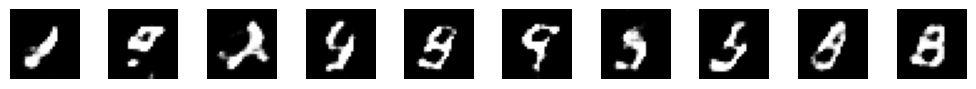

Epoch 2/5, Batch 140, Discriminator Loss: 1.079458475112915, Generator Loss: 1.4443528652191162
Epoch 2/5, Batch 141, Discriminator Loss: 1.161582112312317, Generator Loss: 0.6705317497253418
Epoch 2/5, Batch 142, Discriminator Loss: 1.064209222793579, Generator Loss: 1.9859625101089478
Epoch 2/5, Batch 143, Discriminator Loss: 1.1898037195205688, Generator Loss: 0.541723370552063
Epoch 2/5, Batch 144, Discriminator Loss: 0.9076251983642578, Generator Loss: 1.7168015241622925


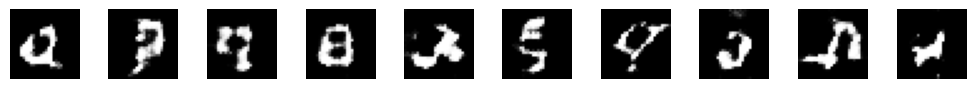

Epoch 2/5, Batch 145, Discriminator Loss: 1.0406162738800049, Generator Loss: 0.7519647479057312
Epoch 2/5, Batch 146, Discriminator Loss: 0.9149057865142822, Generator Loss: 1.5360482931137085
Epoch 2/5, Batch 147, Discriminator Loss: 1.0202651023864746, Generator Loss: 0.7750541567802429
Epoch 2/5, Batch 148, Discriminator Loss: 1.0737543106079102, Generator Loss: 1.6349157094955444
Epoch 2/5, Batch 149, Discriminator Loss: 1.2601548433303833, Generator Loss: 0.5104854106903076


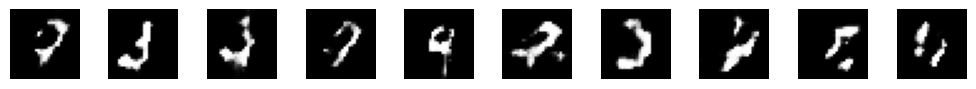

Epoch 2/5, Batch 150, Discriminator Loss: 1.0787465572357178, Generator Loss: 1.5225602388381958
Epoch 2/5, Batch 151, Discriminator Loss: 1.2446945905685425, Generator Loss: 0.5737000703811646
Epoch 2/5, Batch 152, Discriminator Loss: 1.1244255304336548, Generator Loss: 1.7361829280853271
Epoch 2/5, Batch 153, Discriminator Loss: 1.1350083351135254, Generator Loss: 0.6265032887458801
Epoch 2/5, Batch 154, Discriminator Loss: 1.137498140335083, Generator Loss: 2.213015079498291


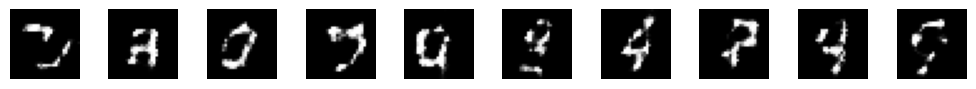

Epoch 2/5, Batch 155, Discriminator Loss: 1.1562212705612183, Generator Loss: 0.5825402736663818
Epoch 2/5, Batch 156, Discriminator Loss: 0.8533130884170532, Generator Loss: 1.8620926141738892
Epoch 2/5, Batch 157, Discriminator Loss: 1.1827263832092285, Generator Loss: 0.57358717918396
Epoch 2/5, Batch 158, Discriminator Loss: 1.0238243341445923, Generator Loss: 1.7089455127716064
Epoch 2/5, Batch 159, Discriminator Loss: 1.0631390810012817, Generator Loss: 0.7515539526939392


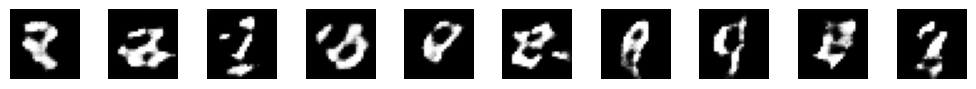

Epoch 2/5, Batch 160, Discriminator Loss: 1.1544034481048584, Generator Loss: 1.6442495584487915
Epoch 2/5, Batch 161, Discriminator Loss: 1.345928430557251, Generator Loss: 0.4834367334842682
Epoch 2/5, Batch 162, Discriminator Loss: 0.9984062314033508, Generator Loss: 1.4971872568130493
Epoch 2/5, Batch 163, Discriminator Loss: 1.3377997875213623, Generator Loss: 0.5877166986465454
Epoch 2/5, Batch 164, Discriminator Loss: 1.2477748394012451, Generator Loss: 1.4908983707427979


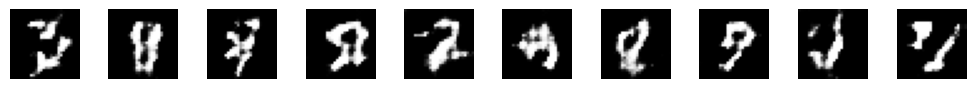

Epoch 2/5, Batch 165, Discriminator Loss: 1.1499577760696411, Generator Loss: 0.7080205678939819
Epoch 2/5, Batch 166, Discriminator Loss: 1.0600590705871582, Generator Loss: 1.8103910684585571
Epoch 2/5, Batch 167, Discriminator Loss: 1.2292203903198242, Generator Loss: 0.5739759802818298
Epoch 2/5, Batch 168, Discriminator Loss: 0.8473465442657471, Generator Loss: 1.8448108434677124
Epoch 2/5, Batch 169, Discriminator Loss: 1.2253577709197998, Generator Loss: 0.5731912851333618


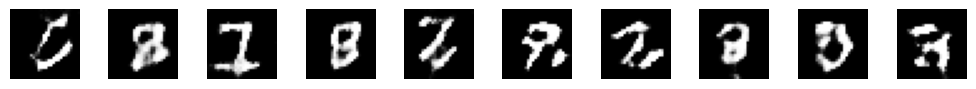

Epoch 2/5, Batch 170, Discriminator Loss: 1.0595221519470215, Generator Loss: 1.7614381313323975
Epoch 2/5, Batch 171, Discriminator Loss: 1.1683783531188965, Generator Loss: 0.6704659461975098
Epoch 2/5, Batch 172, Discriminator Loss: 1.1095926761627197, Generator Loss: 1.5258281230926514
Epoch 2/5, Batch 173, Discriminator Loss: 1.3721909523010254, Generator Loss: 0.5108047723770142
Epoch 2/5, Batch 174, Discriminator Loss: 1.1433079242706299, Generator Loss: 1.3919696807861328


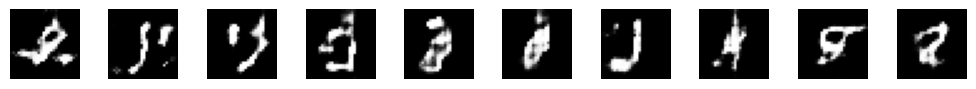

Epoch 2/5, Batch 175, Discriminator Loss: 1.1808487176895142, Generator Loss: 0.6909611225128174
Epoch 2/5, Batch 176, Discriminator Loss: 1.0888969898223877, Generator Loss: 1.398093581199646
Epoch 2/5, Batch 177, Discriminator Loss: 1.015220284461975, Generator Loss: 0.8607532382011414
Epoch 2/5, Batch 178, Discriminator Loss: 0.9681650400161743, Generator Loss: 1.690171241760254
Epoch 2/5, Batch 179, Discriminator Loss: 1.1050742864608765, Generator Loss: 0.6616272926330566


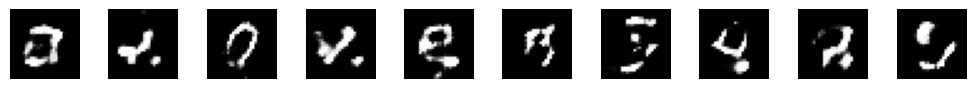

Epoch 2/5, Batch 180, Discriminator Loss: 0.9710612297058105, Generator Loss: 1.5087344646453857
Epoch 2/5, Batch 181, Discriminator Loss: 1.2264037132263184, Generator Loss: 0.6362295150756836
Epoch 2/5, Batch 182, Discriminator Loss: 1.3208868503570557, Generator Loss: 1.378707766532898
Epoch 2/5, Batch 183, Discriminator Loss: 1.4151631593704224, Generator Loss: 0.47314974665641785
Epoch 2/5, Batch 184, Discriminator Loss: 1.5033788681030273, Generator Loss: 2.037367343902588


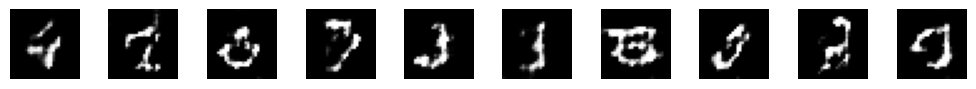

Epoch 2/5, Batch 185, Discriminator Loss: 1.4425866603851318, Generator Loss: 0.41265377402305603
Epoch 2/5, Batch 186, Discriminator Loss: 0.8733413219451904, Generator Loss: 1.9274317026138306
Epoch 2/5, Batch 187, Discriminator Loss: 1.4143424034118652, Generator Loss: 0.4593375027179718
Epoch 2/5, Batch 188, Discriminator Loss: 1.0656598806381226, Generator Loss: 1.9329822063446045
Epoch 2/5, Batch 189, Discriminator Loss: 1.125370740890503, Generator Loss: 0.7001256346702576


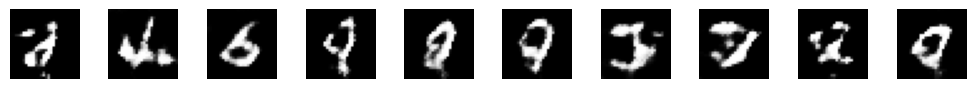

Epoch 2/5, Batch 190, Discriminator Loss: 1.1657304763793945, Generator Loss: 1.171741247177124
Epoch 2/5, Batch 191, Discriminator Loss: 1.2201478481292725, Generator Loss: 0.6964725255966187
Epoch 2/5, Batch 192, Discriminator Loss: 1.1394603252410889, Generator Loss: 1.0383583307266235
Epoch 2/5, Batch 193, Discriminator Loss: 1.1687908172607422, Generator Loss: 0.8091049790382385
Epoch 2/5, Batch 194, Discriminator Loss: 1.1261547803878784, Generator Loss: 1.1483898162841797


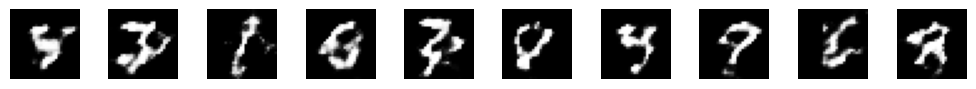

Epoch 2/5, Batch 195, Discriminator Loss: 1.1331231594085693, Generator Loss: 0.7937951683998108
Epoch 2/5, Batch 196, Discriminator Loss: 1.1618956327438354, Generator Loss: 1.3514505624771118
Epoch 2/5, Batch 197, Discriminator Loss: 1.359831690788269, Generator Loss: 0.4908350706100464
Epoch 2/5, Batch 198, Discriminator Loss: 1.0592998266220093, Generator Loss: 1.7559362649917603
Epoch 2/5, Batch 199, Discriminator Loss: 1.410524606704712, Generator Loss: 0.44320258498191833


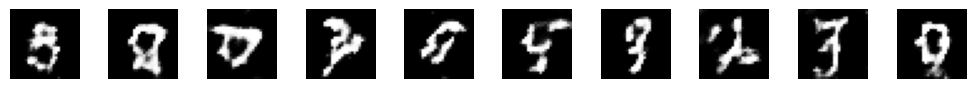

Epoch 2/5, Batch 200, Discriminator Loss: 1.1784205436706543, Generator Loss: 1.925464391708374
Epoch 2/5, Batch 201, Discriminator Loss: 1.3964390754699707, Generator Loss: 0.46009230613708496
Epoch 2/5, Batch 202, Discriminator Loss: 1.1343936920166016, Generator Loss: 1.4569894075393677
Epoch 2/5, Batch 203, Discriminator Loss: 1.289783239364624, Generator Loss: 0.6057617664337158
Epoch 2/5, Batch 204, Discriminator Loss: 1.0241174697875977, Generator Loss: 1.2876207828521729


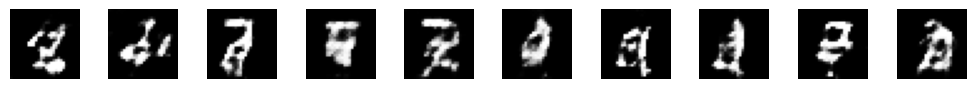

Epoch 2/5, Batch 205, Discriminator Loss: 1.2596871852874756, Generator Loss: 0.6146800518035889
Epoch 2/5, Batch 206, Discriminator Loss: 1.1470763683319092, Generator Loss: 1.6910736560821533
Epoch 2/5, Batch 207, Discriminator Loss: 1.490347981452942, Generator Loss: 0.4248594343662262
Epoch 2/5, Batch 208, Discriminator Loss: 1.2060232162475586, Generator Loss: 1.380164623260498
Epoch 2/5, Batch 209, Discriminator Loss: 1.2133020162582397, Generator Loss: 0.6224160194396973


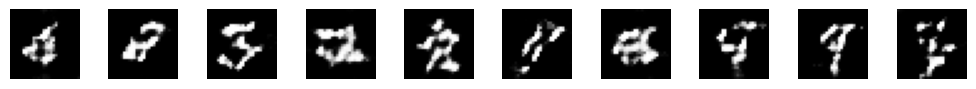

Epoch 2/5, Batch 210, Discriminator Loss: 1.0058314800262451, Generator Loss: 1.4149223566055298
Epoch 2/5, Batch 211, Discriminator Loss: 1.2715171575546265, Generator Loss: 0.6083530187606812
Epoch 2/5, Batch 212, Discriminator Loss: 1.0628125667572021, Generator Loss: 1.8951900005340576
Epoch 2/5, Batch 213, Discriminator Loss: 1.4437761306762695, Generator Loss: 0.41576623916625977
Epoch 2/5, Batch 214, Discriminator Loss: 1.1385815143585205, Generator Loss: 1.3191534280776978


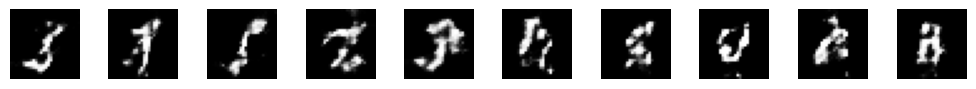

Epoch 2/5, Batch 215, Discriminator Loss: 1.2558858394622803, Generator Loss: 0.6411305665969849
Epoch 2/5, Batch 216, Discriminator Loss: 1.1272761821746826, Generator Loss: 1.0924172401428223
Epoch 2/5, Batch 217, Discriminator Loss: 1.131761908531189, Generator Loss: 0.8225216865539551
Epoch 2/5, Batch 218, Discriminator Loss: 1.0074161291122437, Generator Loss: 1.3811646699905396
Epoch 2/5, Batch 219, Discriminator Loss: 1.1766796112060547, Generator Loss: 0.6729339957237244


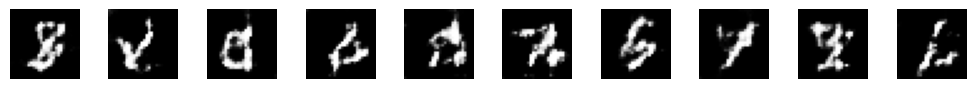

Epoch 2/5, Batch 220, Discriminator Loss: 1.1008896827697754, Generator Loss: 1.430202841758728
Epoch 2/5, Batch 221, Discriminator Loss: 1.411289930343628, Generator Loss: 0.44301819801330566
Epoch 2/5, Batch 222, Discriminator Loss: 1.2966514825820923, Generator Loss: 1.8426318168640137
Epoch 2/5, Batch 223, Discriminator Loss: 1.570678472518921, Generator Loss: 0.3621242642402649
Epoch 2/5, Batch 224, Discriminator Loss: 1.0516331195831299, Generator Loss: 1.695318579673767


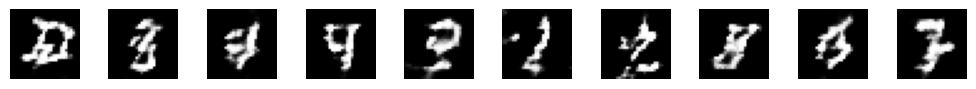

Epoch 2/5, Batch 225, Discriminator Loss: 1.5023540258407593, Generator Loss: 0.43419262766838074
Epoch 2/5, Batch 226, Discriminator Loss: 1.1244736909866333, Generator Loss: 1.8341896533966064
Epoch 2/5, Batch 227, Discriminator Loss: 1.1872563362121582, Generator Loss: 0.6565921306610107
Epoch 2/5, Batch 228, Discriminator Loss: 1.0562736988067627, Generator Loss: 1.245739221572876
Epoch 2/5, Batch 229, Discriminator Loss: 1.16878080368042, Generator Loss: 0.7089900970458984


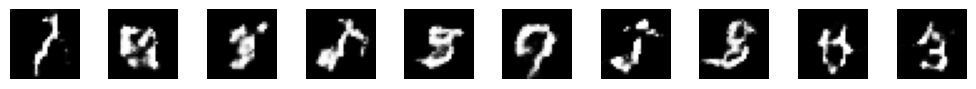

Epoch 2/5, Batch 230, Discriminator Loss: 1.1534936428070068, Generator Loss: 1.067265510559082
Epoch 2/5, Batch 231, Discriminator Loss: 1.270754337310791, Generator Loss: 0.728305459022522
Epoch 2/5, Batch 232, Discriminator Loss: 1.1602306365966797, Generator Loss: 1.1915249824523926
Epoch 2/5, Batch 233, Discriminator Loss: 1.1009249687194824, Generator Loss: 0.813849687576294
Epoch 2/5, Batch 234, Discriminator Loss: 0.9903526306152344, Generator Loss: 1.374240517616272


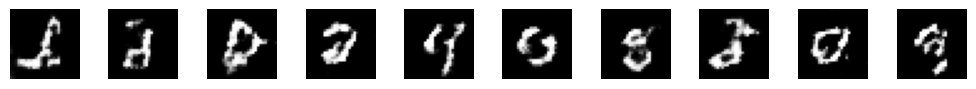

End of epoch 2, Discriminator Loss: 0.9903526306152344, Generator Loss: 1.374240517616272
Epoch 3/5, Batch 0, Discriminator Loss: 0.917256236076355, Generator Loss: 0.8557847738265991
Epoch 3/5, Batch 1, Discriminator Loss: 0.8972233533859253, Generator Loss: 1.4113301038742065
Epoch 3/5, Batch 2, Discriminator Loss: 1.4000276327133179, Generator Loss: 0.48332300782203674
Epoch 3/5, Batch 3, Discriminator Loss: 1.2923402786254883, Generator Loss: 1.914844274520874
Epoch 3/5, Batch 4, Discriminator Loss: 1.7925368547439575, Generator Loss: 0.29645776748657227


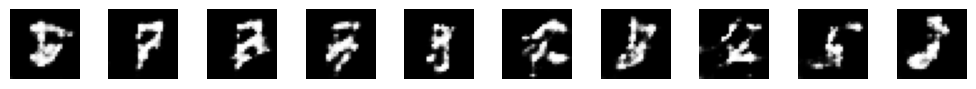

Epoch 3/5, Batch 5, Discriminator Loss: 1.2205042839050293, Generator Loss: 1.288436770439148
Epoch 3/5, Batch 6, Discriminator Loss: 1.3280717134475708, Generator Loss: 0.5697335004806519
Epoch 3/5, Batch 7, Discriminator Loss: 1.1474578380584717, Generator Loss: 1.2603681087493896
Epoch 3/5, Batch 8, Discriminator Loss: 1.106204628944397, Generator Loss: 0.7512121200561523
Epoch 3/5, Batch 9, Discriminator Loss: 1.0504915714263916, Generator Loss: 1.1871964931488037


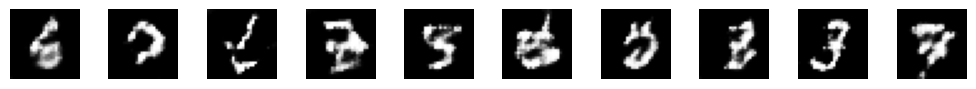

Epoch 3/5, Batch 10, Discriminator Loss: 1.0612483024597168, Generator Loss: 0.7846386432647705
Epoch 3/5, Batch 11, Discriminator Loss: 1.095728874206543, Generator Loss: 1.2158539295196533
Epoch 3/5, Batch 12, Discriminator Loss: 1.2518551349639893, Generator Loss: 0.6057504415512085
Epoch 3/5, Batch 13, Discriminator Loss: 1.238039255142212, Generator Loss: 1.555221676826477
Epoch 3/5, Batch 14, Discriminator Loss: 1.589249849319458, Generator Loss: 0.3671601712703705


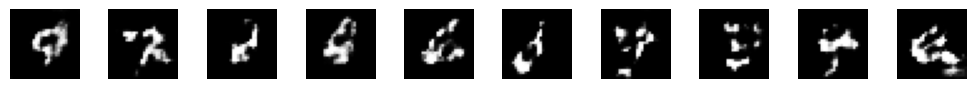

Epoch 3/5, Batch 15, Discriminator Loss: 1.183929681777954, Generator Loss: 1.678701639175415
Epoch 3/5, Batch 16, Discriminator Loss: 1.6115226745605469, Generator Loss: 0.3631832003593445
Epoch 3/5, Batch 17, Discriminator Loss: 1.254206657409668, Generator Loss: 1.6342374086380005
Epoch 3/5, Batch 18, Discriminator Loss: 1.210480809211731, Generator Loss: 0.6093266010284424
Epoch 3/5, Batch 19, Discriminator Loss: 1.0859626531600952, Generator Loss: 1.2477315664291382


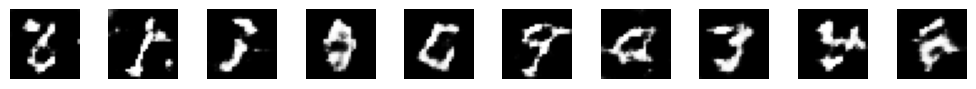

Epoch 3/5, Batch 20, Discriminator Loss: 1.1980406045913696, Generator Loss: 0.6596845984458923
Epoch 3/5, Batch 21, Discriminator Loss: 1.1225461959838867, Generator Loss: 1.1447268724441528
Epoch 3/5, Batch 22, Discriminator Loss: 1.1746079921722412, Generator Loss: 0.7228525876998901
Epoch 3/5, Batch 23, Discriminator Loss: 1.1462525129318237, Generator Loss: 1.0619874000549316
Epoch 3/5, Batch 24, Discriminator Loss: 1.2287209033966064, Generator Loss: 0.6789076924324036


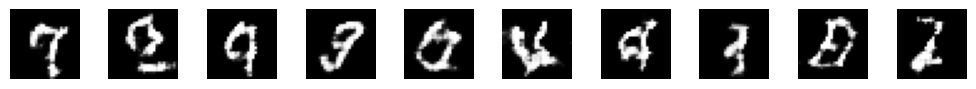

Epoch 3/5, Batch 25, Discriminator Loss: 1.1682236194610596, Generator Loss: 1.182464838027954
Epoch 3/5, Batch 26, Discriminator Loss: 1.2137166261672974, Generator Loss: 0.64375901222229
Epoch 3/5, Batch 27, Discriminator Loss: 1.1411254405975342, Generator Loss: 1.5904442071914673
Epoch 3/5, Batch 28, Discriminator Loss: 1.369497299194336, Generator Loss: 0.45650333166122437
Epoch 3/5, Batch 29, Discriminator Loss: 1.1221624612808228, Generator Loss: 1.4850597381591797


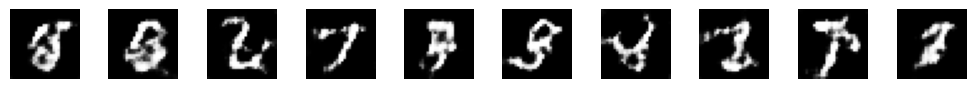

Epoch 3/5, Batch 30, Discriminator Loss: 1.4537584781646729, Generator Loss: 0.45027363300323486
Epoch 3/5, Batch 31, Discriminator Loss: 1.2757902145385742, Generator Loss: 1.8725707530975342
Epoch 3/5, Batch 32, Discriminator Loss: 1.369685173034668, Generator Loss: 0.47636139392852783
Epoch 3/5, Batch 33, Discriminator Loss: 1.222063422203064, Generator Loss: 1.2239553928375244
Epoch 3/5, Batch 34, Discriminator Loss: 1.1636134386062622, Generator Loss: 0.7123064994812012


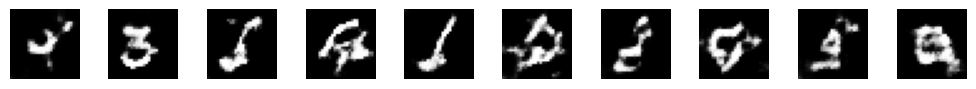

Epoch 3/5, Batch 35, Discriminator Loss: 1.2008709907531738, Generator Loss: 0.9193738102912903
Epoch 3/5, Batch 36, Discriminator Loss: 1.269841194152832, Generator Loss: 0.8026845455169678
Epoch 3/5, Batch 37, Discriminator Loss: 1.1136512756347656, Generator Loss: 1.2325553894042969
Epoch 3/5, Batch 38, Discriminator Loss: 1.4438060522079468, Generator Loss: 0.537932276725769
Epoch 3/5, Batch 39, Discriminator Loss: 1.109199047088623, Generator Loss: 1.300734281539917


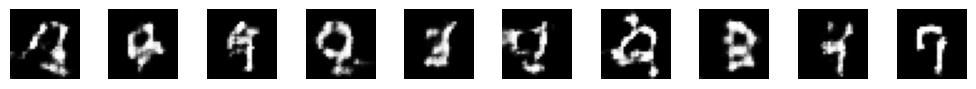

Epoch 3/5, Batch 40, Discriminator Loss: 1.0995970964431763, Generator Loss: 0.6938647031784058
Epoch 3/5, Batch 41, Discriminator Loss: 1.1867713928222656, Generator Loss: 1.259191870689392
Epoch 3/5, Batch 42, Discriminator Loss: 1.289621353149414, Generator Loss: 0.5560733079910278
Epoch 3/5, Batch 43, Discriminator Loss: 1.287551760673523, Generator Loss: 2.202275037765503
Epoch 3/5, Batch 44, Discriminator Loss: 1.7975108623504639, Generator Loss: 0.2699127197265625


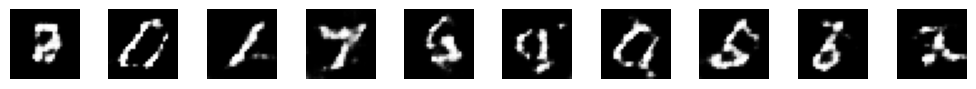

Epoch 3/5, Batch 45, Discriminator Loss: 1.278245210647583, Generator Loss: 1.2334731817245483
Epoch 3/5, Batch 46, Discriminator Loss: 1.28168785572052, Generator Loss: 0.6421475410461426
Epoch 3/5, Batch 47, Discriminator Loss: 1.2209583520889282, Generator Loss: 1.059122920036316
Epoch 3/5, Batch 48, Discriminator Loss: 1.3227946758270264, Generator Loss: 0.6481338739395142
Epoch 3/5, Batch 49, Discriminator Loss: 1.1801915168762207, Generator Loss: 1.2959481477737427


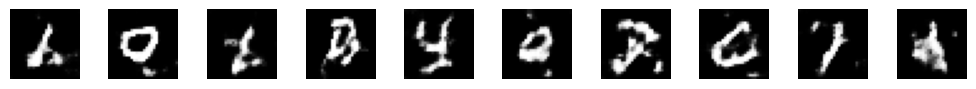

Epoch 3/5, Batch 50, Discriminator Loss: 1.2087379693984985, Generator Loss: 0.6513817310333252
Epoch 3/5, Batch 51, Discriminator Loss: 1.2123889923095703, Generator Loss: 1.2075115442276
Epoch 3/5, Batch 52, Discriminator Loss: 1.1681500673294067, Generator Loss: 0.6805545091629028
Epoch 3/5, Batch 53, Discriminator Loss: 1.1076939105987549, Generator Loss: 1.0995817184448242
Epoch 3/5, Batch 54, Discriminator Loss: 1.4021580219268799, Generator Loss: 0.5774263739585876


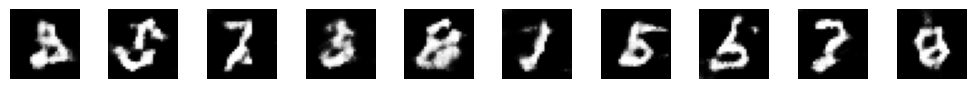

Epoch 3/5, Batch 55, Discriminator Loss: 1.3065648078918457, Generator Loss: 1.4428908824920654
Epoch 3/5, Batch 56, Discriminator Loss: 1.4298770427703857, Generator Loss: 0.4953199625015259
Epoch 3/5, Batch 57, Discriminator Loss: 1.3700827360153198, Generator Loss: 1.250157117843628
Epoch 3/5, Batch 58, Discriminator Loss: 1.2235093116760254, Generator Loss: 0.6111856698989868
Epoch 3/5, Batch 59, Discriminator Loss: 1.1037743091583252, Generator Loss: 1.3624035120010376


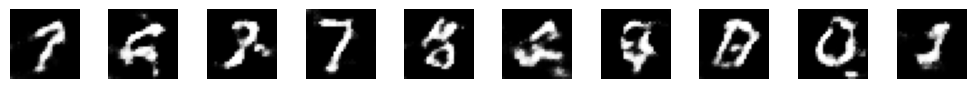

Epoch 3/5, Batch 60, Discriminator Loss: 1.5014963150024414, Generator Loss: 0.4547977149486542
Epoch 3/5, Batch 61, Discriminator Loss: 1.3167567253112793, Generator Loss: 1.5646332502365112
Epoch 3/5, Batch 62, Discriminator Loss: 1.48699152469635, Generator Loss: 0.42396557331085205
Epoch 3/5, Batch 63, Discriminator Loss: 1.3029406070709229, Generator Loss: 1.1170042753219604
Epoch 3/5, Batch 64, Discriminator Loss: 1.1549772024154663, Generator Loss: 0.7553791999816895


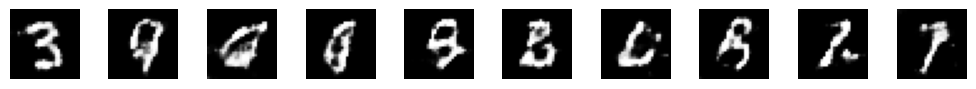

Epoch 3/5, Batch 65, Discriminator Loss: 1.1430686712265015, Generator Loss: 1.0782523155212402
Epoch 3/5, Batch 66, Discriminator Loss: 1.2381525039672852, Generator Loss: 0.7035111784934998
Epoch 3/5, Batch 67, Discriminator Loss: 1.1985145807266235, Generator Loss: 1.20119047164917
Epoch 3/5, Batch 68, Discriminator Loss: 1.3482333421707153, Generator Loss: 0.6141078472137451
Epoch 3/5, Batch 69, Discriminator Loss: 1.2606141567230225, Generator Loss: 1.0986106395721436


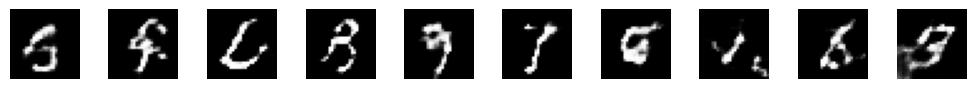

Epoch 3/5, Batch 70, Discriminator Loss: 1.151652216911316, Generator Loss: 0.7542511224746704
Epoch 3/5, Batch 71, Discriminator Loss: 1.163993239402771, Generator Loss: 1.0867574214935303
Epoch 3/5, Batch 72, Discriminator Loss: 1.3110167980194092, Generator Loss: 0.596300482749939
Epoch 3/5, Batch 73, Discriminator Loss: 1.2824983596801758, Generator Loss: 1.6848020553588867
Epoch 3/5, Batch 74, Discriminator Loss: 1.7463717460632324, Generator Loss: 0.30265140533447266


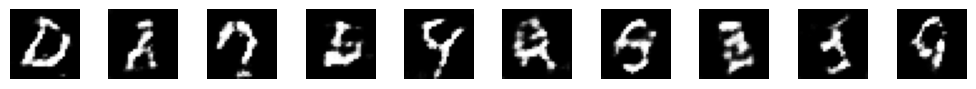

Epoch 3/5, Batch 75, Discriminator Loss: 1.3434691429138184, Generator Loss: 1.3236651420593262
Epoch 3/5, Batch 76, Discriminator Loss: 1.2417707443237305, Generator Loss: 0.5971406698226929
Epoch 3/5, Batch 77, Discriminator Loss: 1.1261563301086426, Generator Loss: 1.2134214639663696
Epoch 3/5, Batch 78, Discriminator Loss: 1.1459707021713257, Generator Loss: 0.7434483766555786
Epoch 3/5, Batch 79, Discriminator Loss: 1.1245403289794922, Generator Loss: 1.1435917615890503


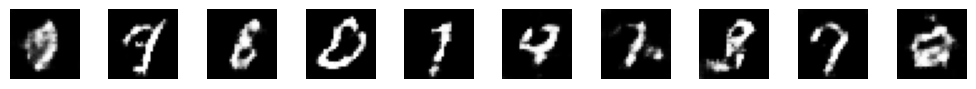

Epoch 3/5, Batch 80, Discriminator Loss: 1.2717037200927734, Generator Loss: 0.6398333311080933
Epoch 3/5, Batch 81, Discriminator Loss: 1.1936742067337036, Generator Loss: 1.1268680095672607
Epoch 3/5, Batch 82, Discriminator Loss: 1.3391685485839844, Generator Loss: 0.5618835091590881
Epoch 3/5, Batch 83, Discriminator Loss: 1.30601167678833, Generator Loss: 1.3484760522842407
Epoch 3/5, Batch 84, Discriminator Loss: 1.450187087059021, Generator Loss: 0.44968804717063904


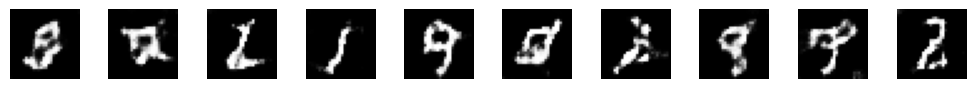

Epoch 3/5, Batch 85, Discriminator Loss: 1.3637101650238037, Generator Loss: 1.3938400745391846
Epoch 3/5, Batch 86, Discriminator Loss: 1.2766779661178589, Generator Loss: 0.5703802704811096
Epoch 3/5, Batch 87, Discriminator Loss: 1.066236972808838, Generator Loss: 1.387618899345398
Epoch 3/5, Batch 88, Discriminator Loss: 1.362713098526001, Generator Loss: 0.5225441455841064
Epoch 3/5, Batch 89, Discriminator Loss: 1.2048389911651611, Generator Loss: 1.6025521755218506


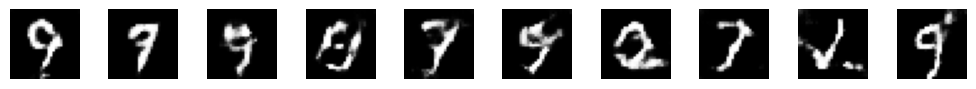

Epoch 3/5, Batch 90, Discriminator Loss: 1.5209293365478516, Generator Loss: 0.41855448484420776
Epoch 3/5, Batch 91, Discriminator Loss: 1.3713330030441284, Generator Loss: 1.1060924530029297
Epoch 3/5, Batch 92, Discriminator Loss: 1.2740929126739502, Generator Loss: 0.6098809242248535
Epoch 3/5, Batch 93, Discriminator Loss: 1.1578950881958008, Generator Loss: 1.1650335788726807
Epoch 3/5, Batch 94, Discriminator Loss: 1.23692786693573, Generator Loss: 0.6149444580078125


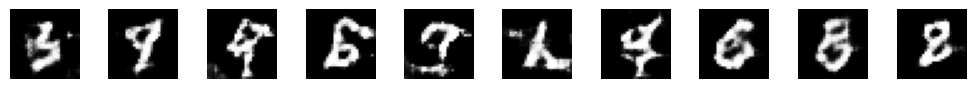

Epoch 3/5, Batch 95, Discriminator Loss: 1.1422356367111206, Generator Loss: 1.8443138599395752
Epoch 3/5, Batch 96, Discriminator Loss: 1.3827804327011108, Generator Loss: 0.4467226266860962
Epoch 3/5, Batch 97, Discriminator Loss: 1.2213842868804932, Generator Loss: 1.1933040618896484
Epoch 3/5, Batch 98, Discriminator Loss: 1.2951555252075195, Generator Loss: 0.6083729267120361
Epoch 3/5, Batch 99, Discriminator Loss: 1.315936803817749, Generator Loss: 0.9352716207504272


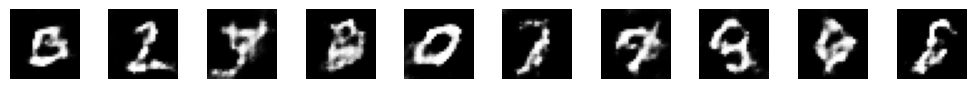

Epoch 3/5, Batch 100, Discriminator Loss: 1.346712589263916, Generator Loss: 0.6760202646255493
Epoch 3/5, Batch 101, Discriminator Loss: 1.2425116300582886, Generator Loss: 1.0045833587646484
Epoch 3/5, Batch 102, Discriminator Loss: 1.2006824016571045, Generator Loss: 0.7720575332641602
Epoch 3/5, Batch 103, Discriminator Loss: 1.0935629606246948, Generator Loss: 1.099548578262329
Epoch 3/5, Batch 104, Discriminator Loss: 1.1117699146270752, Generator Loss: 0.799651026725769


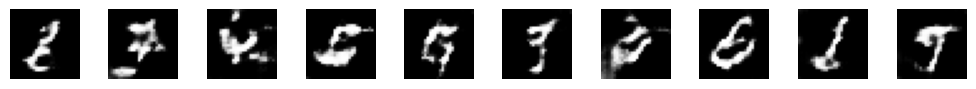

Epoch 3/5, Batch 105, Discriminator Loss: 1.1035518646240234, Generator Loss: 1.0886741876602173
Epoch 3/5, Batch 106, Discriminator Loss: 1.3806074857711792, Generator Loss: 0.5497246980667114
Epoch 3/5, Batch 107, Discriminator Loss: 1.3021678924560547, Generator Loss: 1.512109637260437
Epoch 3/5, Batch 108, Discriminator Loss: 1.5429842472076416, Generator Loss: 0.3791975677013397
Epoch 3/5, Batch 109, Discriminator Loss: 1.4143481254577637, Generator Loss: 1.4029545783996582


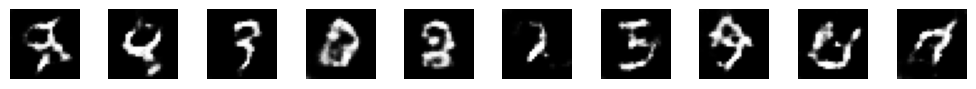

Epoch 3/5, Batch 110, Discriminator Loss: 1.072634220123291, Generator Loss: 0.7111456990242004
Epoch 3/5, Batch 111, Discriminator Loss: 1.185575246810913, Generator Loss: 1.267128825187683
Epoch 3/5, Batch 112, Discriminator Loss: 1.5930498838424683, Generator Loss: 0.36186307668685913
Epoch 3/5, Batch 113, Discriminator Loss: 1.2287698984146118, Generator Loss: 1.8065544366836548
Epoch 3/5, Batch 114, Discriminator Loss: 1.4616341590881348, Generator Loss: 0.45253312587738037


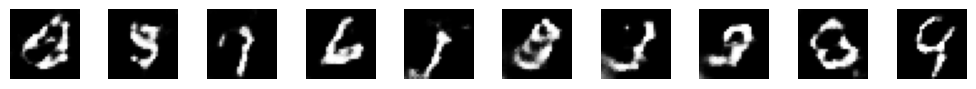

Epoch 3/5, Batch 115, Discriminator Loss: 1.2663640975952148, Generator Loss: 1.0782825946807861
Epoch 3/5, Batch 116, Discriminator Loss: 1.1746692657470703, Generator Loss: 0.7325988411903381
Epoch 3/5, Batch 117, Discriminator Loss: 1.168134331703186, Generator Loss: 1.0192387104034424
Epoch 3/5, Batch 118, Discriminator Loss: 1.2834224700927734, Generator Loss: 0.7183341383934021
Epoch 3/5, Batch 119, Discriminator Loss: 1.1616765260696411, Generator Loss: 1.0320653915405273


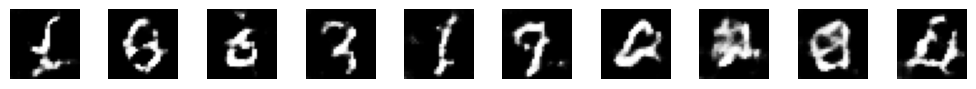

Epoch 3/5, Batch 120, Discriminator Loss: 1.152712106704712, Generator Loss: 0.7953312397003174
Epoch 3/5, Batch 121, Discriminator Loss: 1.2266813516616821, Generator Loss: 1.0505963563919067
Epoch 3/5, Batch 122, Discriminator Loss: 1.1611533164978027, Generator Loss: 0.7363023161888123
Epoch 3/5, Batch 123, Discriminator Loss: 1.0735318660736084, Generator Loss: 1.1991596221923828
Epoch 3/5, Batch 124, Discriminator Loss: 1.3301994800567627, Generator Loss: 0.5814509391784668


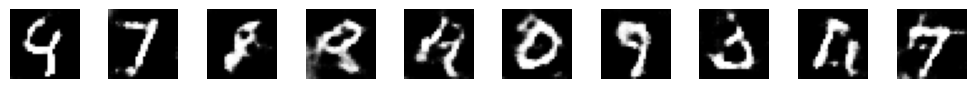

Epoch 3/5, Batch 125, Discriminator Loss: 1.2701491117477417, Generator Loss: 1.350852131843567
Epoch 3/5, Batch 126, Discriminator Loss: 1.4203925132751465, Generator Loss: 0.48475876450538635
Epoch 3/5, Batch 127, Discriminator Loss: 1.3407248258590698, Generator Loss: 1.406357765197754
Epoch 3/5, Batch 128, Discriminator Loss: 1.4187209606170654, Generator Loss: 0.4596847891807556
Epoch 3/5, Batch 129, Discriminator Loss: 1.1890277862548828, Generator Loss: 1.3307216167449951


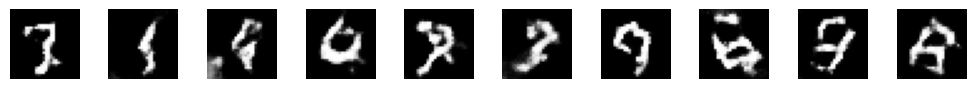

Epoch 3/5, Batch 130, Discriminator Loss: 1.3354322910308838, Generator Loss: 0.5320459008216858
Epoch 3/5, Batch 131, Discriminator Loss: 1.2530326843261719, Generator Loss: 1.178642749786377
Epoch 3/5, Batch 132, Discriminator Loss: 1.238446593284607, Generator Loss: 0.6478984355926514
Epoch 3/5, Batch 133, Discriminator Loss: 1.130623698234558, Generator Loss: 1.1474666595458984
Epoch 3/5, Batch 134, Discriminator Loss: 1.1982887983322144, Generator Loss: 0.7244477272033691


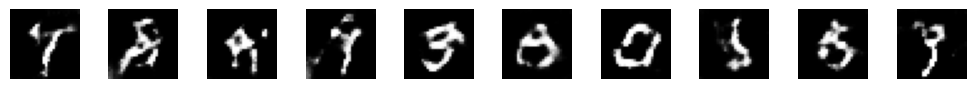

Epoch 3/5, Batch 135, Discriminator Loss: 1.1524196863174438, Generator Loss: 1.0146790742874146
Epoch 3/5, Batch 136, Discriminator Loss: 1.1741950511932373, Generator Loss: 0.767252504825592
Epoch 3/5, Batch 137, Discriminator Loss: 1.290754795074463, Generator Loss: 0.9302616119384766
Epoch 3/5, Batch 138, Discriminator Loss: 1.2310463190078735, Generator Loss: 0.7089771032333374
Epoch 3/5, Batch 139, Discriminator Loss: 1.2077181339263916, Generator Loss: 1.306766152381897


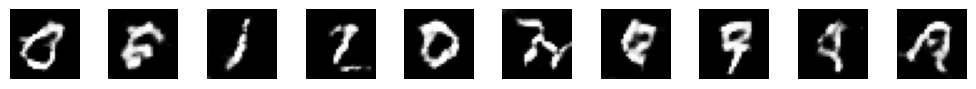

Epoch 3/5, Batch 140, Discriminator Loss: 1.3893482685089111, Generator Loss: 0.472945898771286
Epoch 3/5, Batch 141, Discriminator Loss: 1.2542431354522705, Generator Loss: 1.417394757270813
Epoch 3/5, Batch 142, Discriminator Loss: 1.4279553890228271, Generator Loss: 0.44980573654174805
Epoch 3/5, Batch 143, Discriminator Loss: 1.3105677366256714, Generator Loss: 1.283381462097168
Epoch 3/5, Batch 144, Discriminator Loss: 1.3301539421081543, Generator Loss: 0.5308359265327454


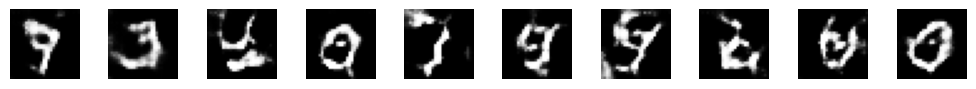

Epoch 3/5, Batch 145, Discriminator Loss: 1.2319529056549072, Generator Loss: 1.2684977054595947
Epoch 3/5, Batch 146, Discriminator Loss: 1.3182520866394043, Generator Loss: 0.5412032008171082
Epoch 3/5, Batch 147, Discriminator Loss: 1.2294590473175049, Generator Loss: 1.1745551824569702
Epoch 3/5, Batch 148, Discriminator Loss: 1.2898048162460327, Generator Loss: 0.5870110988616943
Epoch 3/5, Batch 149, Discriminator Loss: 1.2134730815887451, Generator Loss: 1.1399462223052979


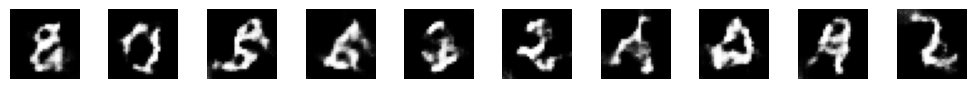

Epoch 3/5, Batch 150, Discriminator Loss: 1.273451328277588, Generator Loss: 0.6250852942466736
Epoch 3/5, Batch 151, Discriminator Loss: 1.2243616580963135, Generator Loss: 1.127687931060791
Epoch 3/5, Batch 152, Discriminator Loss: 1.3797335624694824, Generator Loss: 0.508649468421936
Epoch 3/5, Batch 153, Discriminator Loss: 1.2785366773605347, Generator Loss: 1.2989096641540527
Epoch 3/5, Batch 154, Discriminator Loss: 1.4058356285095215, Generator Loss: 0.49678468704223633


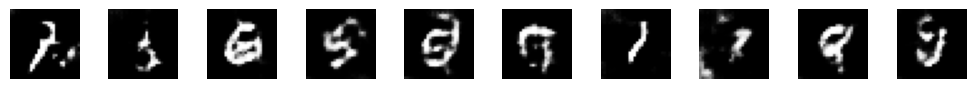

Epoch 3/5, Batch 155, Discriminator Loss: 1.136155366897583, Generator Loss: 1.3478130102157593
Epoch 3/5, Batch 156, Discriminator Loss: 1.2510877847671509, Generator Loss: 0.572084367275238
Epoch 3/5, Batch 157, Discriminator Loss: 1.1489198207855225, Generator Loss: 1.2843399047851562
Epoch 3/5, Batch 158, Discriminator Loss: 1.395516037940979, Generator Loss: 0.49830254912376404
Epoch 3/5, Batch 159, Discriminator Loss: 1.293272614479065, Generator Loss: 1.1583585739135742


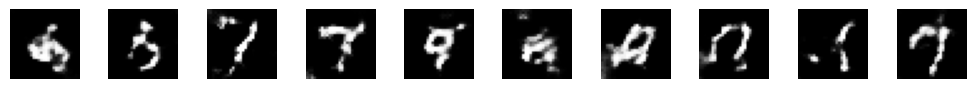

Epoch 3/5, Batch 160, Discriminator Loss: 1.3244805335998535, Generator Loss: 0.5685332417488098
Epoch 3/5, Batch 161, Discriminator Loss: 1.2312064170837402, Generator Loss: 1.256201982498169
Epoch 3/5, Batch 162, Discriminator Loss: 1.3939011096954346, Generator Loss: 0.5613576173782349
Epoch 3/5, Batch 163, Discriminator Loss: 1.2174761295318604, Generator Loss: 1.2545733451843262
Epoch 3/5, Batch 164, Discriminator Loss: 1.3250418901443481, Generator Loss: 0.5527071356773376


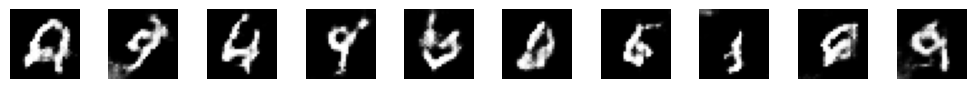

Epoch 3/5, Batch 165, Discriminator Loss: 1.1884691715240479, Generator Loss: 1.1604499816894531
Epoch 3/5, Batch 166, Discriminator Loss: 1.1873440742492676, Generator Loss: 0.684822142124176
Epoch 3/5, Batch 167, Discriminator Loss: 1.0870856046676636, Generator Loss: 1.1249699592590332
Epoch 3/5, Batch 168, Discriminator Loss: 1.4098669290542603, Generator Loss: 0.5262551307678223
Epoch 3/5, Batch 169, Discriminator Loss: 1.2835173606872559, Generator Loss: 1.427359938621521


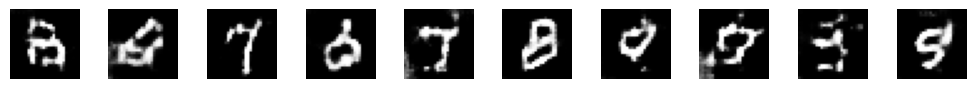

Epoch 3/5, Batch 170, Discriminator Loss: 1.4213964939117432, Generator Loss: 0.4951098561286926
Epoch 3/5, Batch 171, Discriminator Loss: 1.2191286087036133, Generator Loss: 1.1381038427352905
Epoch 3/5, Batch 172, Discriminator Loss: 1.2172155380249023, Generator Loss: 0.6601154208183289
Epoch 3/5, Batch 173, Discriminator Loss: 1.1820707321166992, Generator Loss: 1.1115866899490356
Epoch 3/5, Batch 174, Discriminator Loss: 1.1518208980560303, Generator Loss: 0.7165651321411133


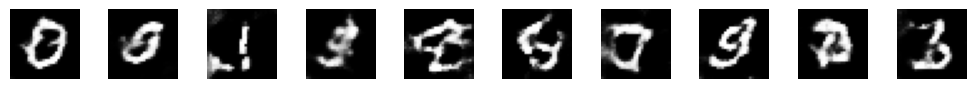

Epoch 3/5, Batch 175, Discriminator Loss: 1.1687747240066528, Generator Loss: 1.19557523727417
Epoch 3/5, Batch 176, Discriminator Loss: 1.3351141214370728, Generator Loss: 0.5521268248558044
Epoch 3/5, Batch 177, Discriminator Loss: 1.2699793577194214, Generator Loss: 1.3314591646194458
Epoch 3/5, Batch 178, Discriminator Loss: 1.5312602519989014, Generator Loss: 0.4102945327758789
Epoch 3/5, Batch 179, Discriminator Loss: 1.345689058303833, Generator Loss: 1.4282581806182861


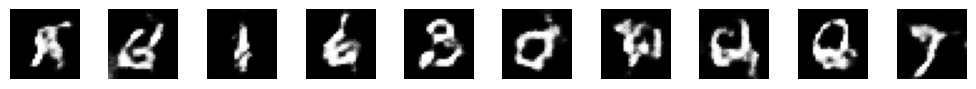

Epoch 3/5, Batch 180, Discriminator Loss: 1.3279513120651245, Generator Loss: 0.5334702730178833
Epoch 3/5, Batch 181, Discriminator Loss: 1.2129011154174805, Generator Loss: 1.0398516654968262
Epoch 3/5, Batch 182, Discriminator Loss: 1.1969491243362427, Generator Loss: 0.722350537776947
Epoch 3/5, Batch 183, Discriminator Loss: 1.1279240846633911, Generator Loss: 1.0099527835845947
Epoch 3/5, Batch 184, Discriminator Loss: 1.148637056350708, Generator Loss: 0.7870761156082153


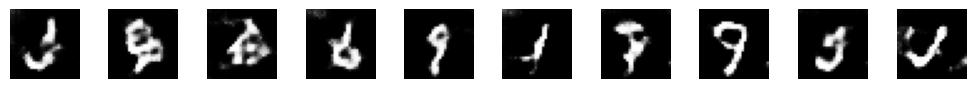

Epoch 3/5, Batch 185, Discriminator Loss: 1.1284104585647583, Generator Loss: 1.1108133792877197
Epoch 3/5, Batch 186, Discriminator Loss: 1.3318560123443604, Generator Loss: 0.5549964308738708
Epoch 3/5, Batch 187, Discriminator Loss: 1.3232731819152832, Generator Loss: 1.1915011405944824
Epoch 3/5, Batch 188, Discriminator Loss: 1.4109793901443481, Generator Loss: 0.46837472915649414
Epoch 3/5, Batch 189, Discriminator Loss: 1.2765564918518066, Generator Loss: 1.3080335855484009


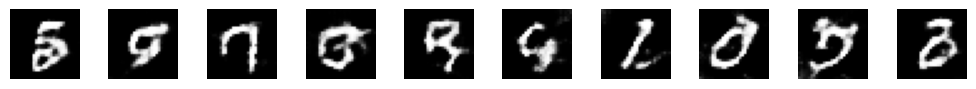

Epoch 3/5, Batch 190, Discriminator Loss: 1.3099826574325562, Generator Loss: 0.5359651446342468
Epoch 3/5, Batch 191, Discriminator Loss: 1.206510066986084, Generator Loss: 1.4861586093902588
Epoch 3/5, Batch 192, Discriminator Loss: 1.2849438190460205, Generator Loss: 0.5410060286521912
Epoch 3/5, Batch 193, Discriminator Loss: 1.2185190916061401, Generator Loss: 1.1855403184890747
Epoch 3/5, Batch 194, Discriminator Loss: 1.3094488382339478, Generator Loss: 0.5748907923698425


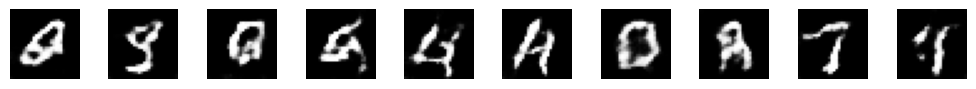

Epoch 3/5, Batch 195, Discriminator Loss: 1.2529256343841553, Generator Loss: 1.0439993143081665
Epoch 3/5, Batch 196, Discriminator Loss: 1.2507424354553223, Generator Loss: 0.6768631935119629
Epoch 3/5, Batch 197, Discriminator Loss: 1.2887210845947266, Generator Loss: 1.1085375547409058
Epoch 3/5, Batch 198, Discriminator Loss: 1.3044912815093994, Generator Loss: 0.5457395315170288
Epoch 3/5, Batch 199, Discriminator Loss: 1.059753656387329, Generator Loss: 1.4449037313461304


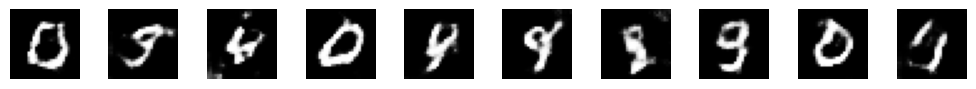

Epoch 3/5, Batch 200, Discriminator Loss: 1.4255800247192383, Generator Loss: 0.47851061820983887
Epoch 3/5, Batch 201, Discriminator Loss: 1.1643798351287842, Generator Loss: 1.4569647312164307
Epoch 3/5, Batch 202, Discriminator Loss: 1.339500904083252, Generator Loss: 0.546798586845398
Epoch 3/5, Batch 203, Discriminator Loss: 1.2817645072937012, Generator Loss: 1.1248652935028076
Epoch 3/5, Batch 204, Discriminator Loss: 1.3107246160507202, Generator Loss: 0.592551589012146


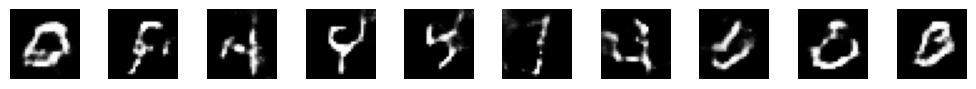

Epoch 3/5, Batch 205, Discriminator Loss: 1.1441421508789062, Generator Loss: 1.2176215648651123
Epoch 3/5, Batch 206, Discriminator Loss: 1.3760271072387695, Generator Loss: 0.5958166122436523
Epoch 3/5, Batch 207, Discriminator Loss: 1.272860050201416, Generator Loss: 1.2294636964797974
Epoch 3/5, Batch 208, Discriminator Loss: 1.2016916275024414, Generator Loss: 0.6888914704322815
Epoch 3/5, Batch 209, Discriminator Loss: 1.1361024379730225, Generator Loss: 1.5197416543960571


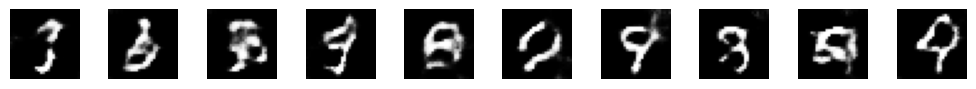

Epoch 3/5, Batch 210, Discriminator Loss: 1.3685578107833862, Generator Loss: 0.4870545566082001
Epoch 3/5, Batch 211, Discriminator Loss: 1.2388025522232056, Generator Loss: 1.1244598627090454
Epoch 3/5, Batch 212, Discriminator Loss: 1.308253288269043, Generator Loss: 0.612339973449707
Epoch 3/5, Batch 213, Discriminator Loss: 1.368567705154419, Generator Loss: 0.9575894474983215
Epoch 3/5, Batch 214, Discriminator Loss: 1.316236972808838, Generator Loss: 0.6746726036071777


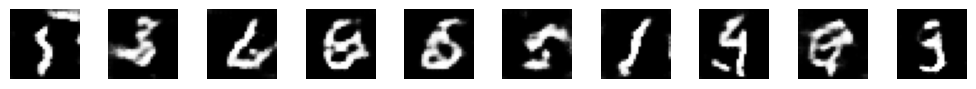

Epoch 3/5, Batch 215, Discriminator Loss: 1.0728774070739746, Generator Loss: 1.4185374975204468
Epoch 3/5, Batch 216, Discriminator Loss: 1.193130612373352, Generator Loss: 0.6409342885017395
Epoch 3/5, Batch 217, Discriminator Loss: 1.2160274982452393, Generator Loss: 1.127378225326538
Epoch 3/5, Batch 218, Discriminator Loss: 1.2428739070892334, Generator Loss: 0.619015097618103
Epoch 3/5, Batch 219, Discriminator Loss: 1.2419754266738892, Generator Loss: 1.2316162586212158


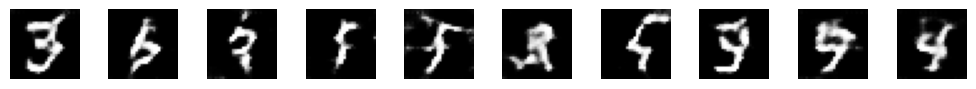

Epoch 3/5, Batch 220, Discriminator Loss: 1.5796864032745361, Generator Loss: 0.42587602138519287
Epoch 3/5, Batch 221, Discriminator Loss: 1.3193037509918213, Generator Loss: 1.7537996768951416
Epoch 3/5, Batch 222, Discriminator Loss: 1.3161863088607788, Generator Loss: 0.5339902639389038
Epoch 3/5, Batch 223, Discriminator Loss: 1.191375494003296, Generator Loss: 1.1057696342468262
Epoch 3/5, Batch 224, Discriminator Loss: 1.2202690839767456, Generator Loss: 0.7028419971466064


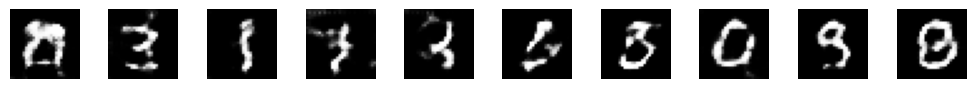

Epoch 3/5, Batch 225, Discriminator Loss: 1.2347286939620972, Generator Loss: 0.9803878664970398
Epoch 3/5, Batch 226, Discriminator Loss: 1.3089354038238525, Generator Loss: 0.694154679775238
Epoch 3/5, Batch 227, Discriminator Loss: 1.179996371269226, Generator Loss: 1.117135763168335
Epoch 3/5, Batch 228, Discriminator Loss: 1.2669188976287842, Generator Loss: 0.6460204720497131
Epoch 3/5, Batch 229, Discriminator Loss: 1.1543755531311035, Generator Loss: 1.1849021911621094


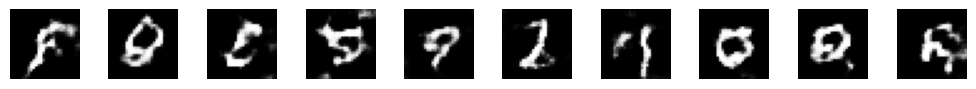

Epoch 3/5, Batch 230, Discriminator Loss: 1.2121548652648926, Generator Loss: 0.6119565367698669
Epoch 3/5, Batch 231, Discriminator Loss: 1.2370516061782837, Generator Loss: 1.1222673654556274
Epoch 3/5, Batch 232, Discriminator Loss: 1.3322515487670898, Generator Loss: 0.5371629595756531
Epoch 3/5, Batch 233, Discriminator Loss: 1.2587978839874268, Generator Loss: 1.2650028467178345
Epoch 3/5, Batch 234, Discriminator Loss: 1.300786018371582, Generator Loss: 0.5295051336288452


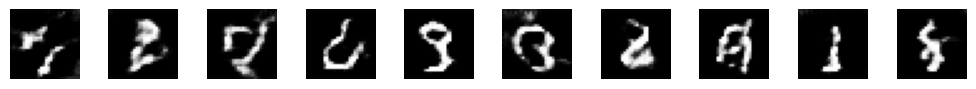

End of epoch 3, Discriminator Loss: 1.300786018371582, Generator Loss: 0.5295051336288452
Epoch 4/5, Batch 0, Discriminator Loss: 1.2017970085144043, Generator Loss: 1.2475355863571167
Epoch 4/5, Batch 1, Discriminator Loss: 1.333709955215454, Generator Loss: 0.5189775228500366
Epoch 4/5, Batch 2, Discriminator Loss: 1.2791779041290283, Generator Loss: 1.1182979345321655
Epoch 4/5, Batch 3, Discriminator Loss: 1.3473564386367798, Generator Loss: 0.5847311019897461
Epoch 4/5, Batch 4, Discriminator Loss: 1.2706804275512695, Generator Loss: 1.1445033550262451


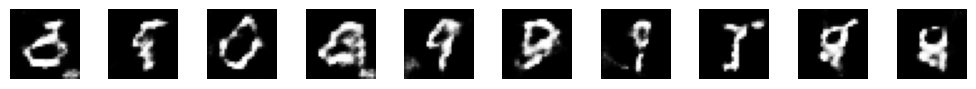

Epoch 4/5, Batch 5, Discriminator Loss: 1.1705691814422607, Generator Loss: 0.7177988886833191
Epoch 4/5, Batch 6, Discriminator Loss: 1.1768226623535156, Generator Loss: 1.1718311309814453
Epoch 4/5, Batch 7, Discriminator Loss: 1.250724196434021, Generator Loss: 0.6240193247795105
Epoch 4/5, Batch 8, Discriminator Loss: 1.1639636754989624, Generator Loss: 1.3595192432403564
Epoch 4/5, Batch 9, Discriminator Loss: 1.5123677253723145, Generator Loss: 0.3986935615539551


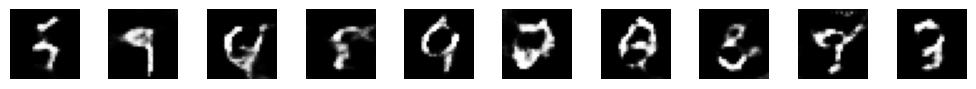

Epoch 4/5, Batch 10, Discriminator Loss: 1.2945222854614258, Generator Loss: 1.2992231845855713
Epoch 4/5, Batch 11, Discriminator Loss: 1.3766233921051025, Generator Loss: 0.4958218038082123
Epoch 4/5, Batch 12, Discriminator Loss: 1.2240142822265625, Generator Loss: 1.1655868291854858
Epoch 4/5, Batch 13, Discriminator Loss: 1.2929242849349976, Generator Loss: 0.6087284684181213
Epoch 4/5, Batch 14, Discriminator Loss: 1.2643121480941772, Generator Loss: 1.2107036113739014


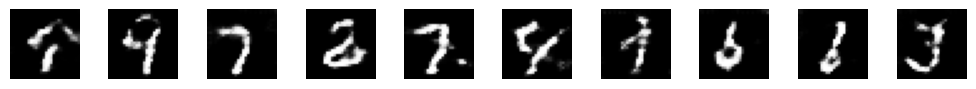

Epoch 4/5, Batch 15, Discriminator Loss: 1.3347558975219727, Generator Loss: 0.5413128137588501
Epoch 4/5, Batch 16, Discriminator Loss: 1.163963794708252, Generator Loss: 1.1362850666046143
Epoch 4/5, Batch 17, Discriminator Loss: 1.1607747077941895, Generator Loss: 0.696803629398346
Epoch 4/5, Batch 18, Discriminator Loss: 1.147545576095581, Generator Loss: 1.0461909770965576
Epoch 4/5, Batch 19, Discriminator Loss: 1.2466539144515991, Generator Loss: 0.6878033876419067


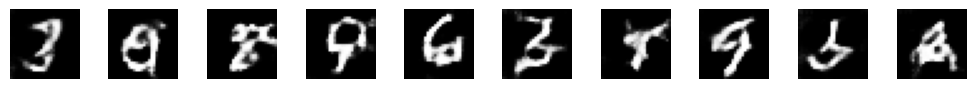

Epoch 4/5, Batch 20, Discriminator Loss: 1.3522220849990845, Generator Loss: 1.0487606525421143
Epoch 4/5, Batch 21, Discriminator Loss: 1.4147183895111084, Generator Loss: 0.5058848857879639
Epoch 4/5, Batch 22, Discriminator Loss: 1.2341946363449097, Generator Loss: 1.4164135456085205
Epoch 4/5, Batch 23, Discriminator Loss: 1.4313206672668457, Generator Loss: 0.45598483085632324
Epoch 4/5, Batch 24, Discriminator Loss: 1.2261483669281006, Generator Loss: 1.4797481298446655


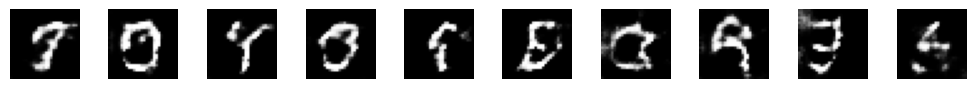

Epoch 4/5, Batch 25, Discriminator Loss: 1.3655915260314941, Generator Loss: 0.509467363357544
Epoch 4/5, Batch 26, Discriminator Loss: 1.129941463470459, Generator Loss: 1.2159723043441772
Epoch 4/5, Batch 27, Discriminator Loss: 1.3075132369995117, Generator Loss: 0.5897517204284668
Epoch 4/5, Batch 28, Discriminator Loss: 1.207168459892273, Generator Loss: 1.1333377361297607
Epoch 4/5, Batch 29, Discriminator Loss: 1.2887775897979736, Generator Loss: 0.6376194953918457


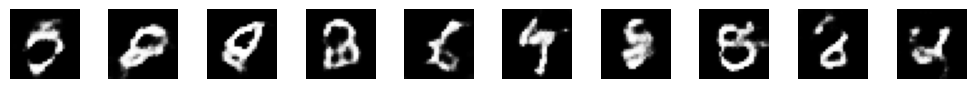

Epoch 4/5, Batch 30, Discriminator Loss: 1.251953363418579, Generator Loss: 0.9116227030754089
Epoch 4/5, Batch 31, Discriminator Loss: 1.2602663040161133, Generator Loss: 0.6947780251502991
Epoch 4/5, Batch 32, Discriminator Loss: 1.205825686454773, Generator Loss: 0.9707595705986023
Epoch 4/5, Batch 33, Discriminator Loss: 1.1970036029815674, Generator Loss: 0.6923092007637024
Epoch 4/5, Batch 34, Discriminator Loss: 1.189160943031311, Generator Loss: 1.160715103149414


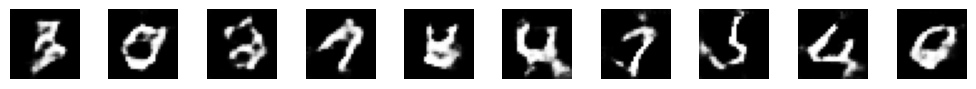

Epoch 4/5, Batch 35, Discriminator Loss: 1.235229253768921, Generator Loss: 0.5891833901405334
Epoch 4/5, Batch 36, Discriminator Loss: 1.207010269165039, Generator Loss: 1.2472916841506958
Epoch 4/5, Batch 37, Discriminator Loss: 1.3656578063964844, Generator Loss: 0.48660147190093994
Epoch 4/5, Batch 38, Discriminator Loss: 1.283530354499817, Generator Loss: 1.262531042098999
Epoch 4/5, Batch 39, Discriminator Loss: 1.3795404434204102, Generator Loss: 0.4988088309764862


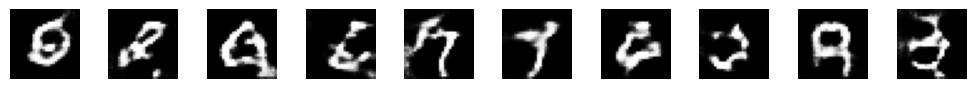

Epoch 4/5, Batch 40, Discriminator Loss: 1.2921743392944336, Generator Loss: 1.14716374874115
Epoch 4/5, Batch 41, Discriminator Loss: 1.2646455764770508, Generator Loss: 0.607243537902832
Epoch 4/5, Batch 42, Discriminator Loss: 1.227289080619812, Generator Loss: 1.0197404623031616
Epoch 4/5, Batch 43, Discriminator Loss: 1.2458781003952026, Generator Loss: 0.6509283781051636
Epoch 4/5, Batch 44, Discriminator Loss: 1.220746397972107, Generator Loss: 1.294435739517212


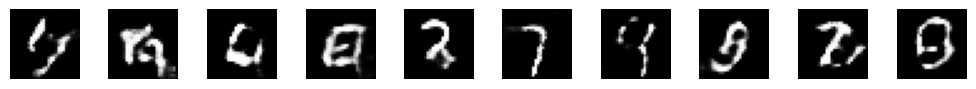

Epoch 4/5, Batch 45, Discriminator Loss: 1.2872376441955566, Generator Loss: 0.5340535640716553
Epoch 4/5, Batch 46, Discriminator Loss: 1.252887487411499, Generator Loss: 1.331324577331543
Epoch 4/5, Batch 47, Discriminator Loss: 1.4110922813415527, Generator Loss: 0.45001256465911865
Epoch 4/5, Batch 48, Discriminator Loss: 1.375868797302246, Generator Loss: 1.297883152961731
Epoch 4/5, Batch 49, Discriminator Loss: 1.3578474521636963, Generator Loss: 0.5342466831207275


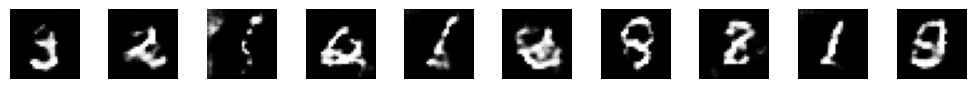

Epoch 4/5, Batch 50, Discriminator Loss: 1.1600476503372192, Generator Loss: 1.3086284399032593
Epoch 4/5, Batch 51, Discriminator Loss: 1.371638298034668, Generator Loss: 0.5138358473777771
Epoch 4/5, Batch 52, Discriminator Loss: 1.180336594581604, Generator Loss: 1.5367107391357422
Epoch 4/5, Batch 53, Discriminator Loss: 1.3517887592315674, Generator Loss: 0.5216032266616821
Epoch 4/5, Batch 54, Discriminator Loss: 1.243053913116455, Generator Loss: 0.9874668121337891


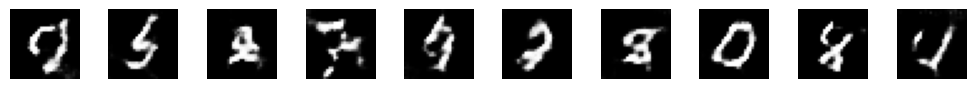

Epoch 4/5, Batch 55, Discriminator Loss: 1.2279179096221924, Generator Loss: 0.7650222778320312
Epoch 4/5, Batch 56, Discriminator Loss: 1.2016006708145142, Generator Loss: 0.8870560526847839
Epoch 4/5, Batch 57, Discriminator Loss: 1.188002109527588, Generator Loss: 0.8110973834991455
Epoch 4/5, Batch 58, Discriminator Loss: 1.1810412406921387, Generator Loss: 0.9213060140609741
Epoch 4/5, Batch 59, Discriminator Loss: 1.2501826286315918, Generator Loss: 0.7392339706420898


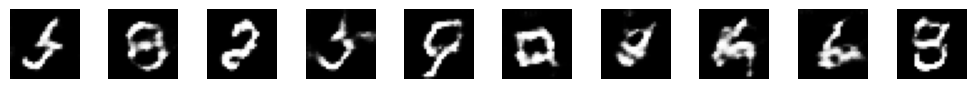

Epoch 4/5, Batch 60, Discriminator Loss: 1.2421433925628662, Generator Loss: 0.8762044906616211
Epoch 4/5, Batch 61, Discriminator Loss: 1.0776588916778564, Generator Loss: 0.8986088037490845
Epoch 4/5, Batch 62, Discriminator Loss: 1.1086890697479248, Generator Loss: 1.0604780912399292
Epoch 4/5, Batch 63, Discriminator Loss: 1.2730762958526611, Generator Loss: 0.6374669671058655
Epoch 4/5, Batch 64, Discriminator Loss: 1.3290222883224487, Generator Loss: 1.5527321100234985


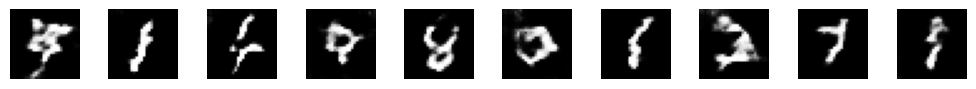

Epoch 4/5, Batch 65, Discriminator Loss: 1.7665680646896362, Generator Loss: 0.2749420404434204
Epoch 4/5, Batch 66, Discriminator Loss: 1.3659902811050415, Generator Loss: 1.3702630996704102
Epoch 4/5, Batch 67, Discriminator Loss: 1.2657768726348877, Generator Loss: 0.5733845233917236
Epoch 4/5, Batch 68, Discriminator Loss: 1.1446400880813599, Generator Loss: 1.2163174152374268
Epoch 4/5, Batch 69, Discriminator Loss: 1.2112927436828613, Generator Loss: 0.6479536294937134


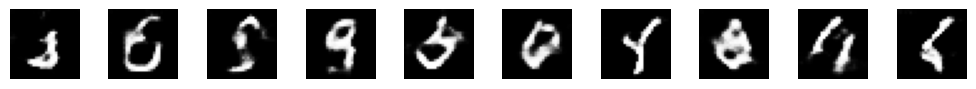

Epoch 4/5, Batch 70, Discriminator Loss: 1.2064130306243896, Generator Loss: 1.073191523551941
Epoch 4/5, Batch 71, Discriminator Loss: 1.339618444442749, Generator Loss: 0.6168122887611389
Epoch 4/5, Batch 72, Discriminator Loss: 1.2151870727539062, Generator Loss: 1.0249217748641968
Epoch 4/5, Batch 73, Discriminator Loss: 1.2314869165420532, Generator Loss: 0.6777973175048828
Epoch 4/5, Batch 74, Discriminator Loss: 1.199870228767395, Generator Loss: 1.1574242115020752


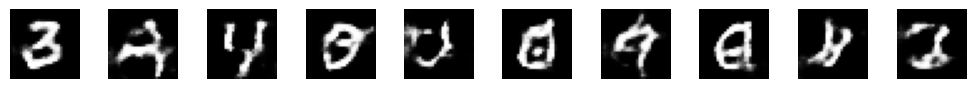

Epoch 4/5, Batch 75, Discriminator Loss: 1.2954614162445068, Generator Loss: 0.5766523480415344
Epoch 4/5, Batch 76, Discriminator Loss: 1.3046367168426514, Generator Loss: 1.23321533203125
Epoch 4/5, Batch 77, Discriminator Loss: 1.3294296264648438, Generator Loss: 0.5207717418670654
Epoch 4/5, Batch 78, Discriminator Loss: 1.186143159866333, Generator Loss: 1.399379014968872
Epoch 4/5, Batch 79, Discriminator Loss: 1.3652971982955933, Generator Loss: 0.4818298816680908


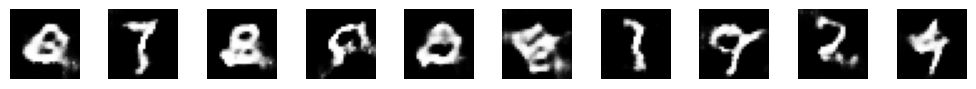

Epoch 4/5, Batch 80, Discriminator Loss: 1.236041784286499, Generator Loss: 1.4749541282653809
Epoch 4/5, Batch 81, Discriminator Loss: 1.3273817300796509, Generator Loss: 0.5520570278167725
Epoch 4/5, Batch 82, Discriminator Loss: 1.1962943077087402, Generator Loss: 1.0980894565582275
Epoch 4/5, Batch 83, Discriminator Loss: 1.3736519813537598, Generator Loss: 0.5964767932891846
Epoch 4/5, Batch 84, Discriminator Loss: 1.2827022075653076, Generator Loss: 1.074225664138794


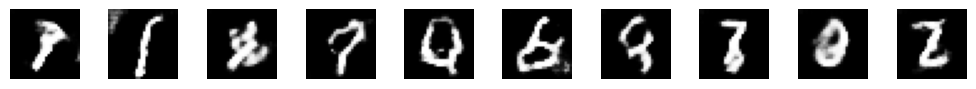

Epoch 4/5, Batch 85, Discriminator Loss: 1.1843645572662354, Generator Loss: 0.7747907638549805
Epoch 4/5, Batch 86, Discriminator Loss: 1.2239044904708862, Generator Loss: 0.975125789642334
Epoch 4/5, Batch 87, Discriminator Loss: 1.2310658693313599, Generator Loss: 0.6941593885421753
Epoch 4/5, Batch 88, Discriminator Loss: 1.1034278869628906, Generator Loss: 1.1757519245147705
Epoch 4/5, Batch 89, Discriminator Loss: 1.3039495944976807, Generator Loss: 0.5704716444015503


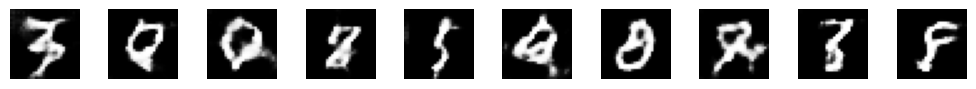

Epoch 4/5, Batch 90, Discriminator Loss: 1.2483479976654053, Generator Loss: 1.2518231868743896
Epoch 4/5, Batch 91, Discriminator Loss: 1.2432913780212402, Generator Loss: 0.5913300514221191
Epoch 4/5, Batch 92, Discriminator Loss: 1.2680414915084839, Generator Loss: 1.4261585474014282
Epoch 4/5, Batch 93, Discriminator Loss: 1.5447766780853271, Generator Loss: 0.3729168772697449
Epoch 4/5, Batch 94, Discriminator Loss: 1.2645039558410645, Generator Loss: 1.345832347869873


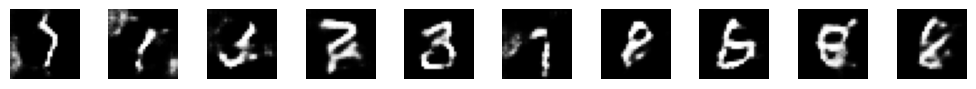

Epoch 4/5, Batch 95, Discriminator Loss: 1.3340997695922852, Generator Loss: 0.519136905670166
Epoch 4/5, Batch 96, Discriminator Loss: 1.2031161785125732, Generator Loss: 1.186358094215393
Epoch 4/5, Batch 97, Discriminator Loss: 1.2216320037841797, Generator Loss: 0.6852607131004333
Epoch 4/5, Batch 98, Discriminator Loss: 1.1751000881195068, Generator Loss: 1.0972546339035034
Epoch 4/5, Batch 99, Discriminator Loss: 1.2297487258911133, Generator Loss: 0.680342435836792


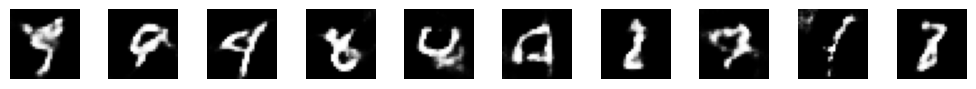

Epoch 4/5, Batch 100, Discriminator Loss: 1.2508361339569092, Generator Loss: 0.9385881423950195
Epoch 4/5, Batch 101, Discriminator Loss: 1.2054543495178223, Generator Loss: 0.7393879890441895
Epoch 4/5, Batch 102, Discriminator Loss: 1.2021913528442383, Generator Loss: 1.0453569889068604
Epoch 4/5, Batch 103, Discriminator Loss: 1.288102626800537, Generator Loss: 0.5748260021209717
Epoch 4/5, Batch 104, Discriminator Loss: 1.2076829671859741, Generator Loss: 1.5225929021835327


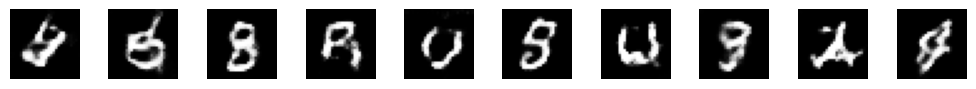

Epoch 4/5, Batch 105, Discriminator Loss: 1.4774211645126343, Generator Loss: 0.4093814194202423
Epoch 4/5, Batch 106, Discriminator Loss: 1.19700288772583, Generator Loss: 1.28034245967865
Epoch 4/5, Batch 107, Discriminator Loss: 1.2079899311065674, Generator Loss: 0.6005632281303406
Epoch 4/5, Batch 108, Discriminator Loss: 1.2499117851257324, Generator Loss: 1.1234102249145508
Epoch 4/5, Batch 109, Discriminator Loss: 1.294947862625122, Generator Loss: 0.5976522564888


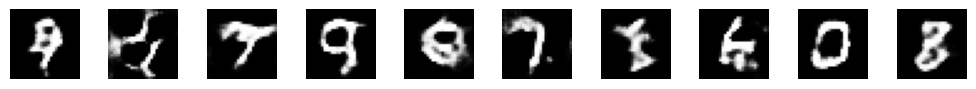

Epoch 4/5, Batch 110, Discriminator Loss: 1.2522821426391602, Generator Loss: 1.3747974634170532
Epoch 4/5, Batch 111, Discriminator Loss: 1.4357022047042847, Generator Loss: 0.46001768112182617
Epoch 4/5, Batch 112, Discriminator Loss: 1.1882518529891968, Generator Loss: 1.209586501121521
Epoch 4/5, Batch 113, Discriminator Loss: 1.1666555404663086, Generator Loss: 0.7231116890907288
Epoch 4/5, Batch 114, Discriminator Loss: 1.1506519317626953, Generator Loss: 1.1146655082702637


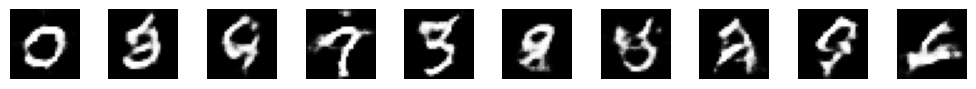

Epoch 4/5, Batch 115, Discriminator Loss: 1.3222565650939941, Generator Loss: 0.5959018468856812
Epoch 4/5, Batch 116, Discriminator Loss: 1.2226243019104004, Generator Loss: 1.2383697032928467
Epoch 4/5, Batch 117, Discriminator Loss: 1.297917127609253, Generator Loss: 0.5497249364852905
Epoch 4/5, Batch 118, Discriminator Loss: 1.2318836450576782, Generator Loss: 1.0818047523498535
Epoch 4/5, Batch 119, Discriminator Loss: 1.220841646194458, Generator Loss: 0.6248675584793091


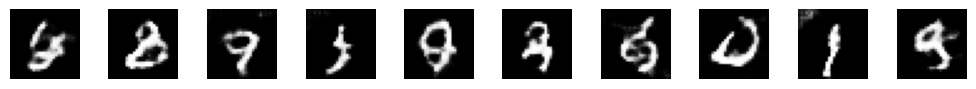

Epoch 4/5, Batch 120, Discriminator Loss: 1.2129607200622559, Generator Loss: 1.1697416305541992
Epoch 4/5, Batch 121, Discriminator Loss: 1.2941628694534302, Generator Loss: 0.5565760135650635
Epoch 4/5, Batch 122, Discriminator Loss: 1.2389297485351562, Generator Loss: 1.4857261180877686
Epoch 4/5, Batch 123, Discriminator Loss: 1.3351469039916992, Generator Loss: 0.49467796087265015
Epoch 4/5, Batch 124, Discriminator Loss: 1.203548789024353, Generator Loss: 1.239357352256775


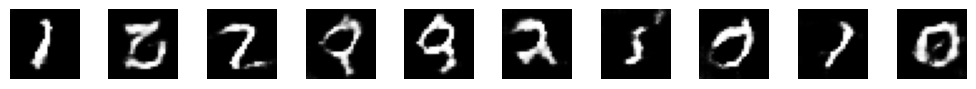

Epoch 4/5, Batch 125, Discriminator Loss: 1.4652764797210693, Generator Loss: 0.48724815249443054
Epoch 4/5, Batch 126, Discriminator Loss: 1.3045876026153564, Generator Loss: 1.1454836130142212
Epoch 4/5, Batch 127, Discriminator Loss: 1.2801626920700073, Generator Loss: 0.63821941614151
Epoch 4/5, Batch 128, Discriminator Loss: 1.2226829528808594, Generator Loss: 1.0927174091339111
Epoch 4/5, Batch 129, Discriminator Loss: 1.186658501625061, Generator Loss: 0.6772911548614502


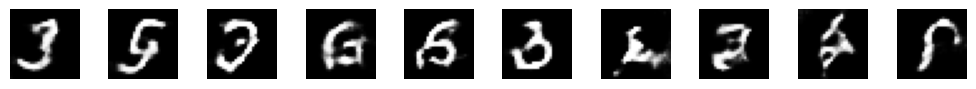

Epoch 4/5, Batch 130, Discriminator Loss: 1.1552443504333496, Generator Loss: 1.1084355115890503
Epoch 4/5, Batch 131, Discriminator Loss: 1.2497045993804932, Generator Loss: 0.6444344520568848
Epoch 4/5, Batch 132, Discriminator Loss: 1.1820151805877686, Generator Loss: 1.1422388553619385
Epoch 4/5, Batch 133, Discriminator Loss: 1.2401134967803955, Generator Loss: 0.6249306201934814
Epoch 4/5, Batch 134, Discriminator Loss: 1.2723677158355713, Generator Loss: 1.0724890232086182


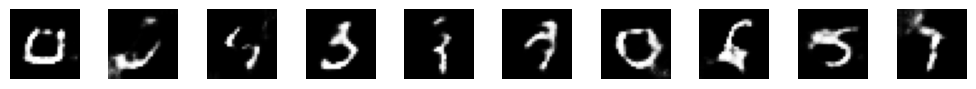

Epoch 4/5, Batch 135, Discriminator Loss: 1.22196364402771, Generator Loss: 0.6050286293029785
Epoch 4/5, Batch 136, Discriminator Loss: 1.4413175582885742, Generator Loss: 1.5487583875656128
Epoch 4/5, Batch 137, Discriminator Loss: 1.5123472213745117, Generator Loss: 0.37919533252716064
Epoch 4/5, Batch 138, Discriminator Loss: 1.3333510160446167, Generator Loss: 2.3339686393737793
Epoch 4/5, Batch 139, Discriminator Loss: 1.4569053649902344, Generator Loss: 0.46527543663978577


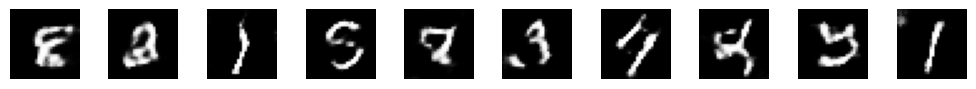

Epoch 4/5, Batch 140, Discriminator Loss: 1.257267951965332, Generator Loss: 0.9829344749450684
Epoch 4/5, Batch 141, Discriminator Loss: 1.1884498596191406, Generator Loss: 0.7681550979614258
Epoch 4/5, Batch 142, Discriminator Loss: 1.1825844049453735, Generator Loss: 0.855134904384613
Epoch 4/5, Batch 143, Discriminator Loss: 1.2443125247955322, Generator Loss: 0.804850697517395
Epoch 4/5, Batch 144, Discriminator Loss: 1.2226617336273193, Generator Loss: 0.8796753287315369


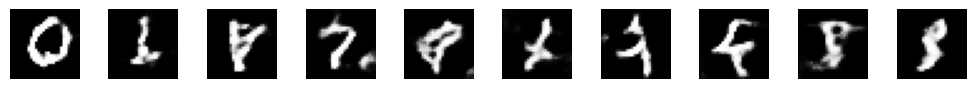

Epoch 4/5, Batch 145, Discriminator Loss: 1.207162618637085, Generator Loss: 0.8951650857925415
Epoch 4/5, Batch 146, Discriminator Loss: 1.1154159307479858, Generator Loss: 0.9768079519271851
Epoch 4/5, Batch 147, Discriminator Loss: 1.2316111326217651, Generator Loss: 0.7806425094604492
Epoch 4/5, Batch 148, Discriminator Loss: 1.2070231437683105, Generator Loss: 0.8653461337089539
Epoch 4/5, Batch 149, Discriminator Loss: 1.2154767513275146, Generator Loss: 0.7879593968391418


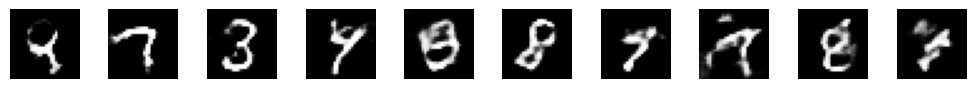

Epoch 4/5, Batch 150, Discriminator Loss: 1.077298879623413, Generator Loss: 1.0217586755752563
Epoch 4/5, Batch 151, Discriminator Loss: 1.2269582748413086, Generator Loss: 0.7061522603034973
Epoch 4/5, Batch 152, Discriminator Loss: 1.2571876049041748, Generator Loss: 1.1293892860412598
Epoch 4/5, Batch 153, Discriminator Loss: 1.286254644393921, Generator Loss: 0.5475413203239441
Epoch 4/5, Batch 154, Discriminator Loss: 1.3551108837127686, Generator Loss: 1.398525357246399


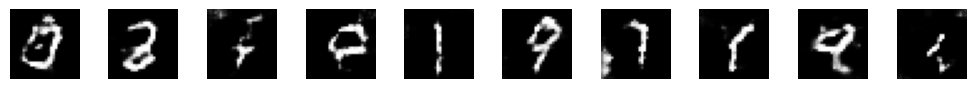

Epoch 4/5, Batch 155, Discriminator Loss: 1.4828466176986694, Generator Loss: 0.41812053322792053
Epoch 4/5, Batch 156, Discriminator Loss: 1.1104434728622437, Generator Loss: 1.5156227350234985
Epoch 4/5, Batch 157, Discriminator Loss: 1.3129265308380127, Generator Loss: 0.5374943017959595
Epoch 4/5, Batch 158, Discriminator Loss: 1.250931978225708, Generator Loss: 1.2375895977020264
Epoch 4/5, Batch 159, Discriminator Loss: 1.2815942764282227, Generator Loss: 0.6057347059249878


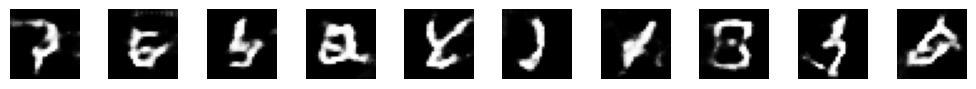

Epoch 4/5, Batch 160, Discriminator Loss: 1.242764949798584, Generator Loss: 1.21492338180542
Epoch 4/5, Batch 161, Discriminator Loss: 1.3281205892562866, Generator Loss: 0.5469210147857666
Epoch 4/5, Batch 162, Discriminator Loss: 1.1806484460830688, Generator Loss: 1.0605418682098389
Epoch 4/5, Batch 163, Discriminator Loss: 1.2124384641647339, Generator Loss: 0.7193613052368164
Epoch 4/5, Batch 164, Discriminator Loss: 1.231440544128418, Generator Loss: 0.9345244765281677


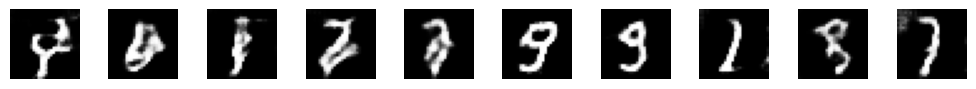

Epoch 4/5, Batch 165, Discriminator Loss: 1.238590121269226, Generator Loss: 0.7178657054901123
Epoch 4/5, Batch 166, Discriminator Loss: 1.181992769241333, Generator Loss: 1.1603143215179443
Epoch 4/5, Batch 167, Discriminator Loss: 1.2429131269454956, Generator Loss: 0.5938096046447754
Epoch 4/5, Batch 168, Discriminator Loss: 1.231473445892334, Generator Loss: 1.1926413774490356
Epoch 4/5, Batch 169, Discriminator Loss: 1.3088393211364746, Generator Loss: 0.5478045344352722


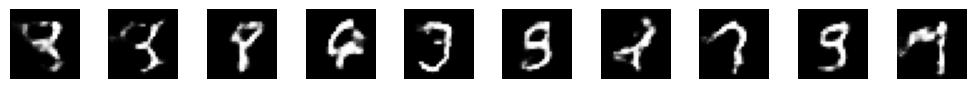

Epoch 4/5, Batch 170, Discriminator Loss: 1.1761846542358398, Generator Loss: 1.4029959440231323
Epoch 4/5, Batch 171, Discriminator Loss: 1.410482406616211, Generator Loss: 0.4615529775619507
Epoch 4/5, Batch 172, Discriminator Loss: 1.3047900199890137, Generator Loss: 1.403436303138733
Epoch 4/5, Batch 173, Discriminator Loss: 1.2669997215270996, Generator Loss: 0.5685098767280579
Epoch 4/5, Batch 174, Discriminator Loss: 1.229370355606079, Generator Loss: 1.1178351640701294


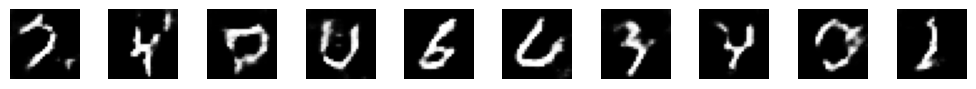

Epoch 4/5, Batch 175, Discriminator Loss: 1.3100457191467285, Generator Loss: 0.6125529408454895
Epoch 4/5, Batch 176, Discriminator Loss: 1.1709944009780884, Generator Loss: 1.0626276731491089
Epoch 4/5, Batch 177, Discriminator Loss: 1.2554653882980347, Generator Loss: 0.7000831961631775
Epoch 4/5, Batch 178, Discriminator Loss: 1.2936973571777344, Generator Loss: 1.0207087993621826
Epoch 4/5, Batch 179, Discriminator Loss: 1.2043894529342651, Generator Loss: 0.7373799085617065


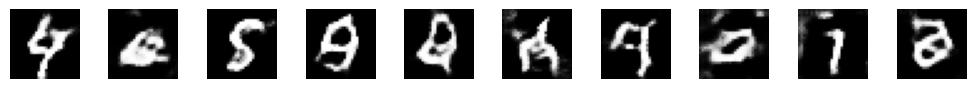

Epoch 4/5, Batch 180, Discriminator Loss: 1.1476002931594849, Generator Loss: 1.3926256895065308
Epoch 4/5, Batch 181, Discriminator Loss: 1.4574825763702393, Generator Loss: 0.4418269097805023
Epoch 4/5, Batch 182, Discriminator Loss: 1.2392582893371582, Generator Loss: 1.1436439752578735
Epoch 4/5, Batch 183, Discriminator Loss: 1.2373673915863037, Generator Loss: 0.6283211708068848
Epoch 4/5, Batch 184, Discriminator Loss: 1.216076135635376, Generator Loss: 1.1440421342849731


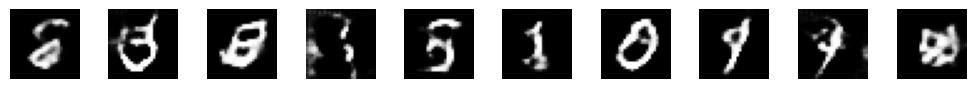

Epoch 4/5, Batch 185, Discriminator Loss: 1.2901718616485596, Generator Loss: 0.5806326270103455
Epoch 4/5, Batch 186, Discriminator Loss: 1.2878413200378418, Generator Loss: 1.3192371129989624
Epoch 4/5, Batch 187, Discriminator Loss: 1.3324267864227295, Generator Loss: 0.5215084552764893
Epoch 4/5, Batch 188, Discriminator Loss: 1.299443244934082, Generator Loss: 1.2210373878479004
Epoch 4/5, Batch 189, Discriminator Loss: 1.1573532819747925, Generator Loss: 0.6665607690811157


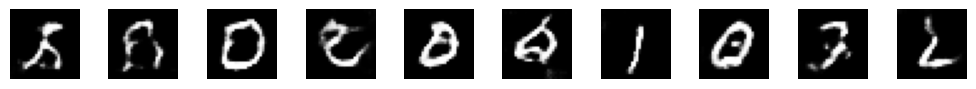

Epoch 4/5, Batch 190, Discriminator Loss: 1.121086597442627, Generator Loss: 1.1280841827392578
Epoch 4/5, Batch 191, Discriminator Loss: 1.3705317974090576, Generator Loss: 0.5680587291717529
Epoch 4/5, Batch 192, Discriminator Loss: 1.2944656610488892, Generator Loss: 1.2462068796157837
Epoch 4/5, Batch 193, Discriminator Loss: 1.3107119798660278, Generator Loss: 0.5385753512382507
Epoch 4/5, Batch 194, Discriminator Loss: 1.247135043144226, Generator Loss: 1.1472989320755005


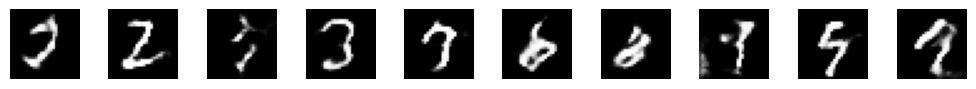

Epoch 4/5, Batch 195, Discriminator Loss: 1.1970080137252808, Generator Loss: 0.6593174934387207
Epoch 4/5, Batch 196, Discriminator Loss: 1.1615535020828247, Generator Loss: 1.033424735069275
Epoch 4/5, Batch 197, Discriminator Loss: 1.2156457901000977, Generator Loss: 0.6771811842918396
Epoch 4/5, Batch 198, Discriminator Loss: 1.2250560522079468, Generator Loss: 1.0528075695037842
Epoch 4/5, Batch 199, Discriminator Loss: 1.2490462064743042, Generator Loss: 0.5915346741676331


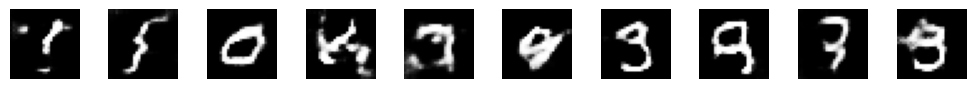

Epoch 4/5, Batch 200, Discriminator Loss: 1.25948166847229, Generator Loss: 1.2308896780014038
Epoch 4/5, Batch 201, Discriminator Loss: 1.3042644262313843, Generator Loss: 0.5368546843528748
Epoch 4/5, Batch 202, Discriminator Loss: 1.2242786884307861, Generator Loss: 1.3689463138580322
Epoch 4/5, Batch 203, Discriminator Loss: 1.402961254119873, Generator Loss: 0.46790966391563416
Epoch 4/5, Batch 204, Discriminator Loss: 1.2920029163360596, Generator Loss: 1.3636035919189453


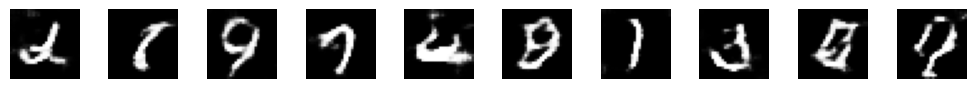

Epoch 4/5, Batch 205, Discriminator Loss: 1.3563354015350342, Generator Loss: 0.5094481706619263
Epoch 4/5, Batch 206, Discriminator Loss: 1.2371970415115356, Generator Loss: 1.0957953929901123
Epoch 4/5, Batch 207, Discriminator Loss: 1.2247607707977295, Generator Loss: 0.6686216592788696
Epoch 4/5, Batch 208, Discriminator Loss: 1.1667265892028809, Generator Loss: 1.0323452949523926
Epoch 4/5, Batch 209, Discriminator Loss: 1.263161301612854, Generator Loss: 0.6583195328712463


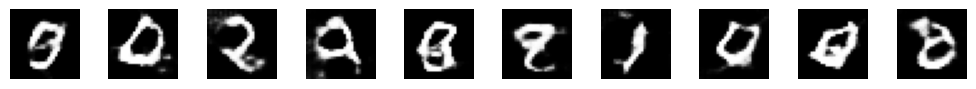

Epoch 4/5, Batch 210, Discriminator Loss: 1.1912775039672852, Generator Loss: 1.3247371912002563
Epoch 4/5, Batch 211, Discriminator Loss: 1.2904753684997559, Generator Loss: 0.5622044801712036
Epoch 4/5, Batch 212, Discriminator Loss: 1.2978508472442627, Generator Loss: 1.0842344760894775
Epoch 4/5, Batch 213, Discriminator Loss: 1.0955133438110352, Generator Loss: 0.7739334106445312
Epoch 4/5, Batch 214, Discriminator Loss: 1.2206916809082031, Generator Loss: 1.1395529508590698


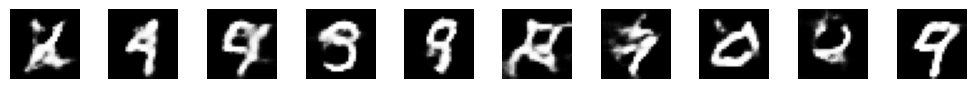

Epoch 4/5, Batch 215, Discriminator Loss: 1.3905383348464966, Generator Loss: 0.5239101052284241
Epoch 4/5, Batch 216, Discriminator Loss: 1.2613605260849, Generator Loss: 1.7596184015274048
Epoch 4/5, Batch 217, Discriminator Loss: 1.368953824043274, Generator Loss: 0.4394359886646271
Epoch 4/5, Batch 218, Discriminator Loss: 1.2745462656021118, Generator Loss: 1.1960145235061646
Epoch 4/5, Batch 219, Discriminator Loss: 1.2063822746276855, Generator Loss: 0.6816010475158691


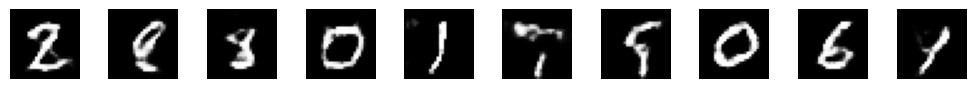

Epoch 4/5, Batch 220, Discriminator Loss: 1.187134027481079, Generator Loss: 1.0335564613342285
Epoch 4/5, Batch 221, Discriminator Loss: 1.2867939472198486, Generator Loss: 0.6720170974731445
Epoch 4/5, Batch 222, Discriminator Loss: 1.255961298942566, Generator Loss: 0.9898252487182617
Epoch 4/5, Batch 223, Discriminator Loss: 1.1865391731262207, Generator Loss: 0.7332552075386047
Epoch 4/5, Batch 224, Discriminator Loss: 1.2147248983383179, Generator Loss: 1.002216100692749


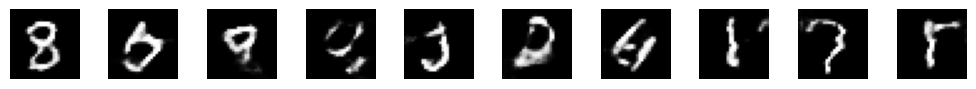

Epoch 4/5, Batch 225, Discriminator Loss: 1.2807338237762451, Generator Loss: 0.6281667947769165
Epoch 4/5, Batch 226, Discriminator Loss: 1.0993807315826416, Generator Loss: 1.2189676761627197
Epoch 4/5, Batch 227, Discriminator Loss: 1.317702054977417, Generator Loss: 0.5436421632766724
Epoch 4/5, Batch 228, Discriminator Loss: 1.3067197799682617, Generator Loss: 1.268377661705017
Epoch 4/5, Batch 229, Discriminator Loss: 1.3410724401474, Generator Loss: 0.5005691051483154


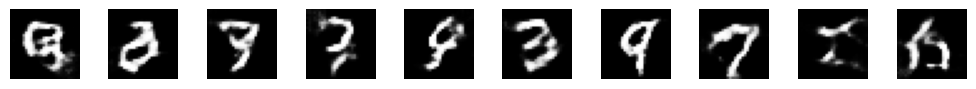

Epoch 4/5, Batch 230, Discriminator Loss: 1.3066105842590332, Generator Loss: 1.3075703382492065
Epoch 4/5, Batch 231, Discriminator Loss: 1.2460408210754395, Generator Loss: 0.586147665977478
Epoch 4/5, Batch 232, Discriminator Loss: 1.1862103939056396, Generator Loss: 1.179771900177002
Epoch 4/5, Batch 233, Discriminator Loss: 1.3045512437820435, Generator Loss: 0.5697444677352905
Epoch 4/5, Batch 234, Discriminator Loss: 1.3171699047088623, Generator Loss: 1.060884952545166


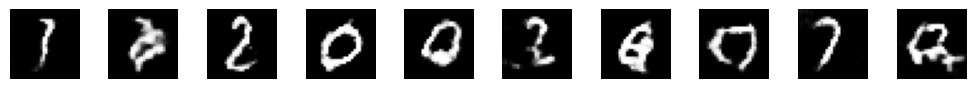

End of epoch 4, Discriminator Loss: 1.3171699047088623, Generator Loss: 1.060884952545166
Epoch 5/5, Batch 0, Discriminator Loss: 1.3087636232376099, Generator Loss: 0.5648612976074219
Epoch 5/5, Batch 1, Discriminator Loss: 1.244908094406128, Generator Loss: 1.0944559574127197
Epoch 5/5, Batch 2, Discriminator Loss: 1.2238519191741943, Generator Loss: 0.6346291303634644
Epoch 5/5, Batch 3, Discriminator Loss: 1.194582223892212, Generator Loss: 1.2167344093322754
Epoch 5/5, Batch 4, Discriminator Loss: 1.2272841930389404, Generator Loss: 0.5951523780822754


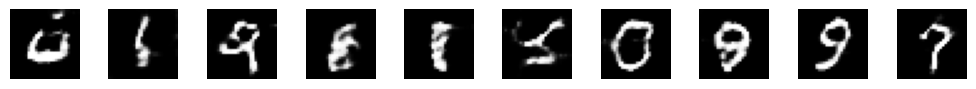

Epoch 5/5, Batch 5, Discriminator Loss: 1.2506000995635986, Generator Loss: 1.3004109859466553
Epoch 5/5, Batch 6, Discriminator Loss: 1.4038139581680298, Generator Loss: 0.44544750452041626
Epoch 5/5, Batch 7, Discriminator Loss: 1.2597644329071045, Generator Loss: 1.4957727193832397
Epoch 5/5, Batch 8, Discriminator Loss: 1.426640272140503, Generator Loss: 0.4626249372959137
Epoch 5/5, Batch 9, Discriminator Loss: 1.149507761001587, Generator Loss: 1.248389482498169


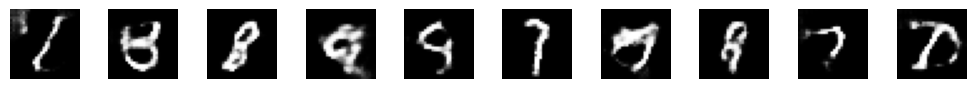

Epoch 5/5, Batch 10, Discriminator Loss: 1.2708206176757812, Generator Loss: 0.6182845830917358
Epoch 5/5, Batch 11, Discriminator Loss: 1.2447757720947266, Generator Loss: 1.009576439857483
Epoch 5/5, Batch 12, Discriminator Loss: 1.2484676837921143, Generator Loss: 0.7293087840080261
Epoch 5/5, Batch 13, Discriminator Loss: 1.2217397689819336, Generator Loss: 1.074341058731079
Epoch 5/5, Batch 14, Discriminator Loss: 1.2914164066314697, Generator Loss: 0.6083698868751526


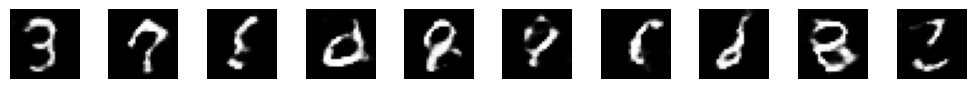

Epoch 5/5, Batch 15, Discriminator Loss: 1.1847333908081055, Generator Loss: 1.102935791015625
Epoch 5/5, Batch 16, Discriminator Loss: 1.2552211284637451, Generator Loss: 0.6394720077514648
Epoch 5/5, Batch 17, Discriminator Loss: 1.217443585395813, Generator Loss: 1.1281306743621826
Epoch 5/5, Batch 18, Discriminator Loss: 1.278075933456421, Generator Loss: 0.5905669927597046
Epoch 5/5, Batch 19, Discriminator Loss: 1.2340850830078125, Generator Loss: 1.36519455909729


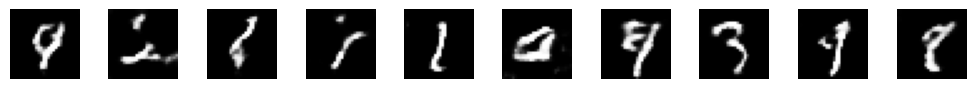

Epoch 5/5, Batch 20, Discriminator Loss: 1.3483047485351562, Generator Loss: 0.4855005145072937
Epoch 5/5, Batch 21, Discriminator Loss: 1.2183053493499756, Generator Loss: 1.241715908050537
Epoch 5/5, Batch 22, Discriminator Loss: 1.3422749042510986, Generator Loss: 0.5326688885688782
Epoch 5/5, Batch 23, Discriminator Loss: 1.242539405822754, Generator Loss: 1.2230793237686157
Epoch 5/5, Batch 24, Discriminator Loss: 1.2877252101898193, Generator Loss: 0.5916032791137695


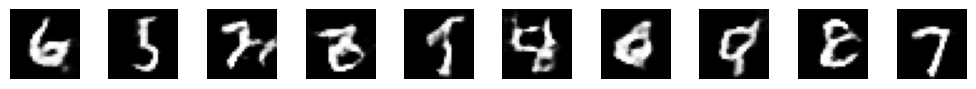

Epoch 5/5, Batch 25, Discriminator Loss: 1.23880136013031, Generator Loss: 1.0882467031478882
Epoch 5/5, Batch 26, Discriminator Loss: 1.249131441116333, Generator Loss: 0.6427236199378967
Epoch 5/5, Batch 27, Discriminator Loss: 1.1801934242248535, Generator Loss: 1.0167315006256104
Epoch 5/5, Batch 28, Discriminator Loss: 1.268843173980713, Generator Loss: 0.6785071492195129
Epoch 5/5, Batch 29, Discriminator Loss: 1.18048095703125, Generator Loss: 1.1298178434371948


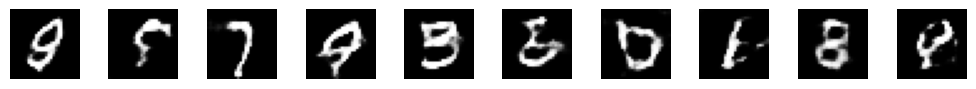

Epoch 5/5, Batch 30, Discriminator Loss: 1.250577449798584, Generator Loss: 0.5995698571205139
Epoch 5/5, Batch 31, Discriminator Loss: 1.1881784200668335, Generator Loss: 1.2448854446411133
Epoch 5/5, Batch 32, Discriminator Loss: 1.367914080619812, Generator Loss: 0.5108513832092285
Epoch 5/5, Batch 33, Discriminator Loss: 1.2431728839874268, Generator Loss: 1.423822045326233
Epoch 5/5, Batch 34, Discriminator Loss: 1.3728479146957397, Generator Loss: 0.487626314163208


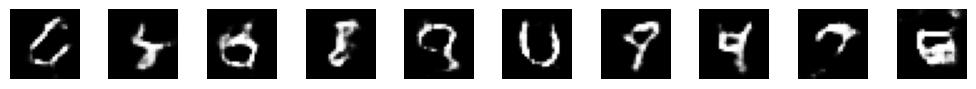

Epoch 5/5, Batch 35, Discriminator Loss: 1.111338496208191, Generator Loss: 1.2363126277923584
Epoch 5/5, Batch 36, Discriminator Loss: 1.3207120895385742, Generator Loss: 0.5646913647651672
Epoch 5/5, Batch 37, Discriminator Loss: 1.2723976373672485, Generator Loss: 1.2243086099624634
Epoch 5/5, Batch 38, Discriminator Loss: 1.2514216899871826, Generator Loss: 0.6290777325630188
Epoch 5/5, Batch 39, Discriminator Loss: 1.21707022190094, Generator Loss: 1.2289012670516968


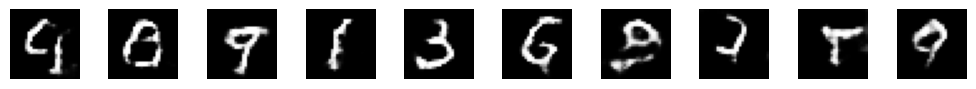

Epoch 5/5, Batch 40, Discriminator Loss: 1.2940399646759033, Generator Loss: 0.5733785629272461
Epoch 5/5, Batch 41, Discriminator Loss: 1.0462238788604736, Generator Loss: 1.332022786140442
Epoch 5/5, Batch 42, Discriminator Loss: 1.3333497047424316, Generator Loss: 0.5567246079444885
Epoch 5/5, Batch 43, Discriminator Loss: 1.2249736785888672, Generator Loss: 1.3205071687698364
Epoch 5/5, Batch 44, Discriminator Loss: 1.261703372001648, Generator Loss: 0.6075904369354248


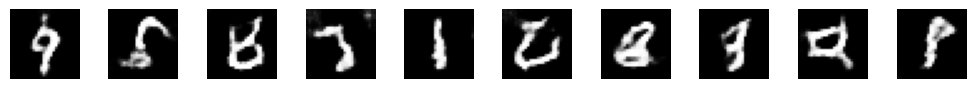

Epoch 5/5, Batch 45, Discriminator Loss: 1.3077548742294312, Generator Loss: 1.1586004495620728
Epoch 5/5, Batch 46, Discriminator Loss: 1.3792991638183594, Generator Loss: 0.5231294631958008
Epoch 5/5, Batch 47, Discriminator Loss: 1.1412211656570435, Generator Loss: 1.2200002670288086
Epoch 5/5, Batch 48, Discriminator Loss: 1.272119402885437, Generator Loss: 0.6019212603569031
Epoch 5/5, Batch 49, Discriminator Loss: 1.1982553005218506, Generator Loss: 1.2202640771865845


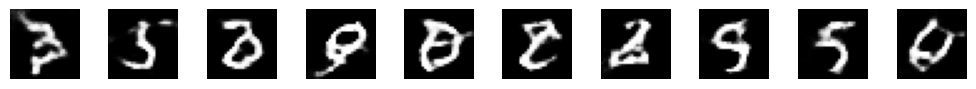

Epoch 5/5, Batch 50, Discriminator Loss: 1.2213579416275024, Generator Loss: 0.6942169070243835
Epoch 5/5, Batch 51, Discriminator Loss: 1.310755968093872, Generator Loss: 0.9687217473983765
Epoch 5/5, Batch 52, Discriminator Loss: 1.2059097290039062, Generator Loss: 0.6757116913795471
Epoch 5/5, Batch 53, Discriminator Loss: 1.1301276683807373, Generator Loss: 1.1900560855865479
Epoch 5/5, Batch 54, Discriminator Loss: 1.2505306005477905, Generator Loss: 0.5867750644683838


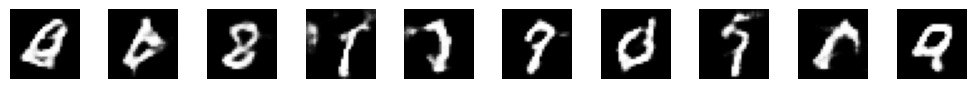

Epoch 5/5, Batch 55, Discriminator Loss: 1.210960865020752, Generator Loss: 1.3637654781341553
Epoch 5/5, Batch 56, Discriminator Loss: 1.3126106262207031, Generator Loss: 0.5323466062545776
Epoch 5/5, Batch 57, Discriminator Loss: 1.286879539489746, Generator Loss: 1.1422710418701172
Epoch 5/5, Batch 58, Discriminator Loss: 1.2691309452056885, Generator Loss: 0.5910410284996033
Epoch 5/5, Batch 59, Discriminator Loss: 1.2139978408813477, Generator Loss: 1.2608287334442139


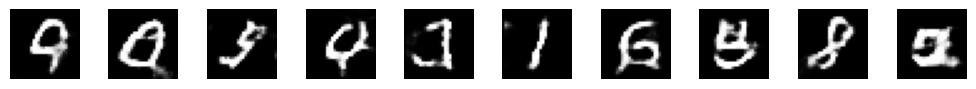

Epoch 5/5, Batch 60, Discriminator Loss: 1.40767502784729, Generator Loss: 0.5139093399047852
Epoch 5/5, Batch 61, Discriminator Loss: 1.2530887126922607, Generator Loss: 1.6603882312774658
Epoch 5/5, Batch 62, Discriminator Loss: 1.3494987487792969, Generator Loss: 0.48507431149482727
Epoch 5/5, Batch 63, Discriminator Loss: 1.1965465545654297, Generator Loss: 1.1178033351898193
Epoch 5/5, Batch 64, Discriminator Loss: 1.2066409587860107, Generator Loss: 0.7023494243621826


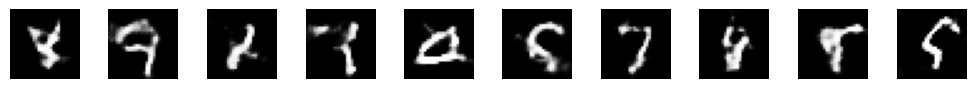

Epoch 5/5, Batch 65, Discriminator Loss: 1.1558940410614014, Generator Loss: 0.9982395172119141
Epoch 5/5, Batch 66, Discriminator Loss: 1.358027458190918, Generator Loss: 0.6410914063453674
Epoch 5/5, Batch 67, Discriminator Loss: 1.163378119468689, Generator Loss: 1.2681317329406738
Epoch 5/5, Batch 68, Discriminator Loss: 1.2614175081253052, Generator Loss: 0.6727505922317505
Epoch 5/5, Batch 69, Discriminator Loss: 1.209841251373291, Generator Loss: 1.002333164215088


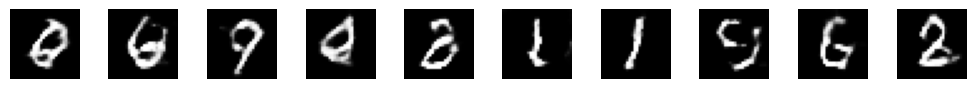

Epoch 5/5, Batch 70, Discriminator Loss: 1.288444995880127, Generator Loss: 0.6494283676147461
Epoch 5/5, Batch 71, Discriminator Loss: 1.1168767213821411, Generator Loss: 1.160085678100586
Epoch 5/5, Batch 72, Discriminator Loss: 1.2023680210113525, Generator Loss: 0.6666821241378784
Epoch 5/5, Batch 73, Discriminator Loss: 1.2682019472122192, Generator Loss: 1.1330273151397705
Epoch 5/5, Batch 74, Discriminator Loss: 1.1734013557434082, Generator Loss: 0.6866304874420166


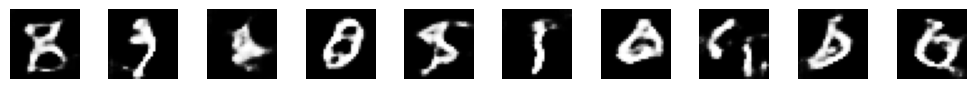

Epoch 5/5, Batch 75, Discriminator Loss: 1.2636669874191284, Generator Loss: 1.2727491855621338
Epoch 5/5, Batch 76, Discriminator Loss: 1.5056371688842773, Generator Loss: 0.3925781548023224
Epoch 5/5, Batch 77, Discriminator Loss: 1.1974589824676514, Generator Loss: 1.3102917671203613
Epoch 5/5, Batch 78, Discriminator Loss: 1.2992403507232666, Generator Loss: 0.558566153049469
Epoch 5/5, Batch 79, Discriminator Loss: 1.25856351852417, Generator Loss: 1.1840870380401611


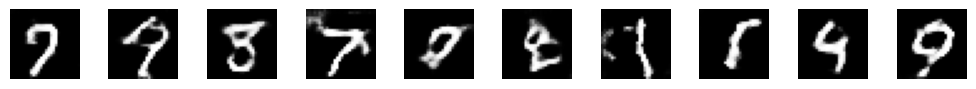

Epoch 5/5, Batch 80, Discriminator Loss: 1.2048797607421875, Generator Loss: 0.6993415355682373
Epoch 5/5, Batch 81, Discriminator Loss: 1.199233055114746, Generator Loss: 1.02464759349823
Epoch 5/5, Batch 82, Discriminator Loss: 1.279695749282837, Generator Loss: 0.666077733039856
Epoch 5/5, Batch 83, Discriminator Loss: 1.144822359085083, Generator Loss: 0.9509060978889465
Epoch 5/5, Batch 84, Discriminator Loss: 1.1619962453842163, Generator Loss: 0.8370271921157837


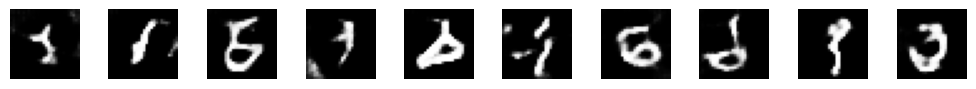

Epoch 5/5, Batch 85, Discriminator Loss: 1.1967904567718506, Generator Loss: 0.8889846205711365
Epoch 5/5, Batch 86, Discriminator Loss: 1.1738966703414917, Generator Loss: 0.9229748249053955
Epoch 5/5, Batch 87, Discriminator Loss: 1.1396905183792114, Generator Loss: 0.9931200742721558
Epoch 5/5, Batch 88, Discriminator Loss: 1.2837510108947754, Generator Loss: 0.7099171876907349
Epoch 5/5, Batch 89, Discriminator Loss: 1.1343450546264648, Generator Loss: 1.0077762603759766


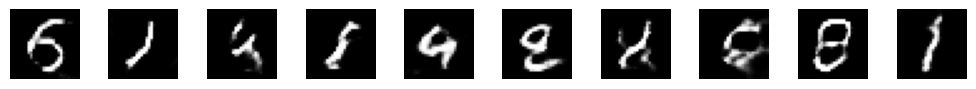

Epoch 5/5, Batch 90, Discriminator Loss: 1.1118355989456177, Generator Loss: 0.7546799182891846
Epoch 5/5, Batch 91, Discriminator Loss: 1.2803802490234375, Generator Loss: 1.2636079788208008
Epoch 5/5, Batch 92, Discriminator Loss: 1.6223195791244507, Generator Loss: 0.33865997195243835
Epoch 5/5, Batch 93, Discriminator Loss: 1.5311853885650635, Generator Loss: 2.3314807415008545
Epoch 5/5, Batch 94, Discriminator Loss: 1.5303263664245605, Generator Loss: 0.39017537236213684


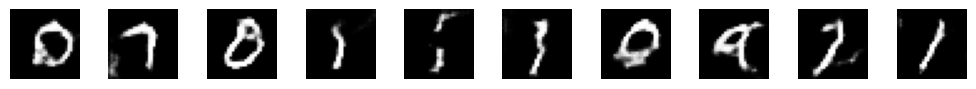

Epoch 5/5, Batch 95, Discriminator Loss: 1.3043148517608643, Generator Loss: 1.0807846784591675
Epoch 5/5, Batch 96, Discriminator Loss: 1.1786468029022217, Generator Loss: 0.7639133930206299
Epoch 5/5, Batch 97, Discriminator Loss: 1.148565649986267, Generator Loss: 0.9956164360046387
Epoch 5/5, Batch 98, Discriminator Loss: 1.22739839553833, Generator Loss: 0.7351579070091248
Epoch 5/5, Batch 99, Discriminator Loss: 1.1980443000793457, Generator Loss: 1.0513185262680054


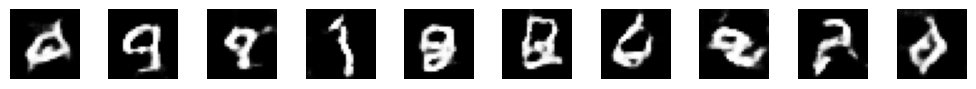

Epoch 5/5, Batch 100, Discriminator Loss: 1.1701061725616455, Generator Loss: 0.7663952112197876
Epoch 5/5, Batch 101, Discriminator Loss: 1.2317774295806885, Generator Loss: 0.9312177300453186
Epoch 5/5, Batch 102, Discriminator Loss: 1.2058963775634766, Generator Loss: 0.7086490392684937
Epoch 5/5, Batch 103, Discriminator Loss: 1.1846790313720703, Generator Loss: 0.977812647819519
Epoch 5/5, Batch 104, Discriminator Loss: 1.2200629711151123, Generator Loss: 0.7286874055862427


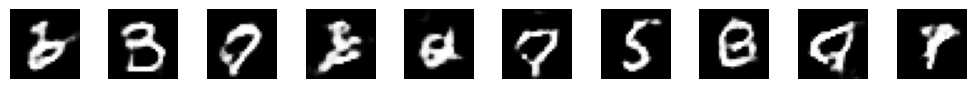

Epoch 5/5, Batch 105, Discriminator Loss: 1.2188389301300049, Generator Loss: 1.0367614030838013
Epoch 5/5, Batch 106, Discriminator Loss: 1.257742166519165, Generator Loss: 0.6060501933097839
Epoch 5/5, Batch 107, Discriminator Loss: 1.270758867263794, Generator Loss: 1.2275387048721313
Epoch 5/5, Batch 108, Discriminator Loss: 1.2630198001861572, Generator Loss: 0.564216136932373
Epoch 5/5, Batch 109, Discriminator Loss: 1.2014222145080566, Generator Loss: 1.336887001991272


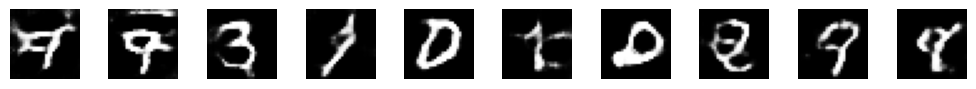

Epoch 5/5, Batch 110, Discriminator Loss: 1.442520022392273, Generator Loss: 0.4417862892150879
Epoch 5/5, Batch 111, Discriminator Loss: 1.2998714447021484, Generator Loss: 1.5471709966659546
Epoch 5/5, Batch 112, Discriminator Loss: 1.380792260169983, Generator Loss: 0.48733848333358765
Epoch 5/5, Batch 113, Discriminator Loss: 1.2248364686965942, Generator Loss: 1.159359335899353
Epoch 5/5, Batch 114, Discriminator Loss: 1.1194000244140625, Generator Loss: 0.7428147792816162


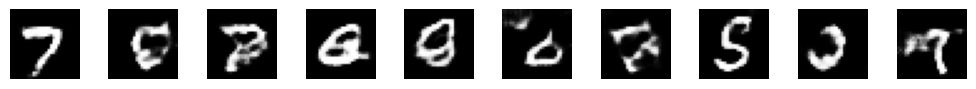

Epoch 5/5, Batch 115, Discriminator Loss: 1.260699987411499, Generator Loss: 0.9972831010818481
Epoch 5/5, Batch 116, Discriminator Loss: 1.2039384841918945, Generator Loss: 0.7788010835647583
Epoch 5/5, Batch 117, Discriminator Loss: 1.2074884176254272, Generator Loss: 1.3212943077087402
Epoch 5/5, Batch 118, Discriminator Loss: 1.3799357414245605, Generator Loss: 0.46815791726112366
Epoch 5/5, Batch 119, Discriminator Loss: 1.2127034664154053, Generator Loss: 1.1851807832717896


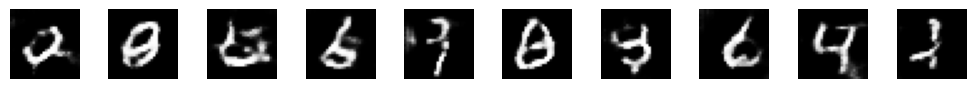

Epoch 5/5, Batch 120, Discriminator Loss: 1.250758409500122, Generator Loss: 0.6304868459701538
Epoch 5/5, Batch 121, Discriminator Loss: 1.2069398164749146, Generator Loss: 1.039672613143921
Epoch 5/5, Batch 122, Discriminator Loss: 1.3063879013061523, Generator Loss: 0.6092983484268188
Epoch 5/5, Batch 123, Discriminator Loss: 1.2144958972930908, Generator Loss: 1.2387914657592773
Epoch 5/5, Batch 124, Discriminator Loss: 1.2084068059921265, Generator Loss: 0.6129279136657715


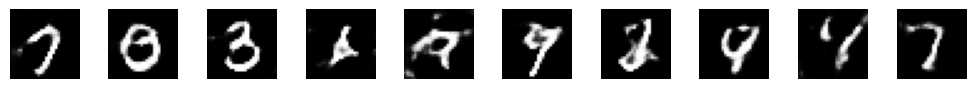

Epoch 5/5, Batch 125, Discriminator Loss: 1.2272748947143555, Generator Loss: 1.090561866760254
Epoch 5/5, Batch 126, Discriminator Loss: 1.219487190246582, Generator Loss: 0.6384731531143188
Epoch 5/5, Batch 127, Discriminator Loss: 1.2171962261199951, Generator Loss: 1.1337296962738037
Epoch 5/5, Batch 128, Discriminator Loss: 1.2294678688049316, Generator Loss: 0.6009770631790161
Epoch 5/5, Batch 129, Discriminator Loss: 1.2609333992004395, Generator Loss: 1.2036449909210205


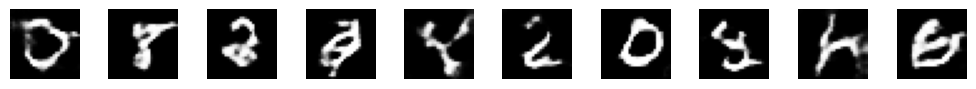

Epoch 5/5, Batch 130, Discriminator Loss: 1.2557142972946167, Generator Loss: 0.5609187483787537
Epoch 5/5, Batch 131, Discriminator Loss: 1.3001694679260254, Generator Loss: 1.2424429655075073
Epoch 5/5, Batch 132, Discriminator Loss: 1.224573016166687, Generator Loss: 0.6097153425216675
Epoch 5/5, Batch 133, Discriminator Loss: 1.1929349899291992, Generator Loss: 1.3024108409881592
Epoch 5/5, Batch 134, Discriminator Loss: 1.3265191316604614, Generator Loss: 0.5221179127693176


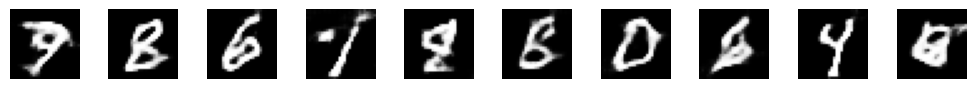

Epoch 5/5, Batch 135, Discriminator Loss: 1.279221773147583, Generator Loss: 1.574912667274475
Epoch 5/5, Batch 136, Discriminator Loss: 1.4692693948745728, Generator Loss: 0.42403122782707214
Epoch 5/5, Batch 137, Discriminator Loss: 1.2154966592788696, Generator Loss: 1.1567738056182861
Epoch 5/5, Batch 138, Discriminator Loss: 1.239554524421692, Generator Loss: 0.6472820043563843
Epoch 5/5, Batch 139, Discriminator Loss: 1.245391845703125, Generator Loss: 1.0866000652313232


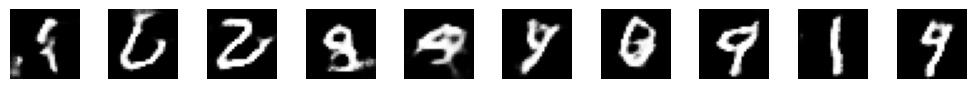

Epoch 5/5, Batch 140, Discriminator Loss: 1.205766201019287, Generator Loss: 0.6931703686714172
Epoch 5/5, Batch 141, Discriminator Loss: 1.2591303586959839, Generator Loss: 1.0775686502456665
Epoch 5/5, Batch 142, Discriminator Loss: 1.261125922203064, Generator Loss: 0.5919462442398071
Epoch 5/5, Batch 143, Discriminator Loss: 1.2527055740356445, Generator Loss: 1.1233346462249756
Epoch 5/5, Batch 144, Discriminator Loss: 1.2552584409713745, Generator Loss: 0.6202647089958191


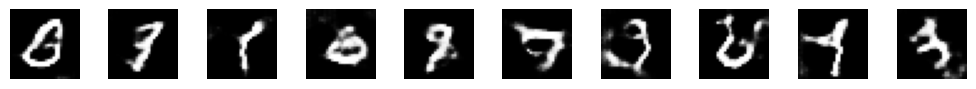

Epoch 5/5, Batch 145, Discriminator Loss: 1.1651743650436401, Generator Loss: 1.117630124092102
Epoch 5/5, Batch 146, Discriminator Loss: 1.1942384243011475, Generator Loss: 0.6754956841468811
Epoch 5/5, Batch 147, Discriminator Loss: 1.2462410926818848, Generator Loss: 1.1226603984832764
Epoch 5/5, Batch 148, Discriminator Loss: 1.2329469919204712, Generator Loss: 0.606810986995697
Epoch 5/5, Batch 149, Discriminator Loss: 1.2449969053268433, Generator Loss: 1.210013747215271


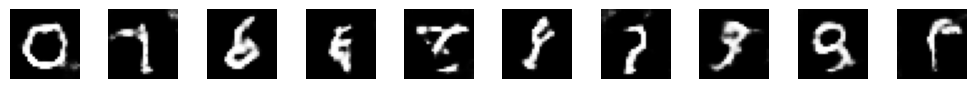

Epoch 5/5, Batch 150, Discriminator Loss: 1.279402732849121, Generator Loss: 0.541778564453125
Epoch 5/5, Batch 151, Discriminator Loss: 1.2151634693145752, Generator Loss: 1.3259350061416626
Epoch 5/5, Batch 152, Discriminator Loss: 1.2758655548095703, Generator Loss: 0.5661433935165405
Epoch 5/5, Batch 153, Discriminator Loss: 1.2231285572052002, Generator Loss: 1.1177241802215576
Epoch 5/5, Batch 154, Discriminator Loss: 1.2371422052383423, Generator Loss: 0.620408296585083


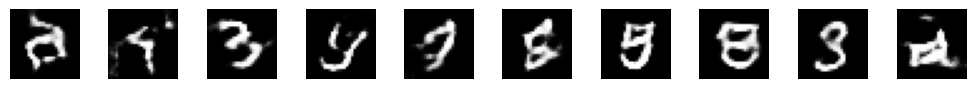

Epoch 5/5, Batch 155, Discriminator Loss: 1.201036810874939, Generator Loss: 1.1223914623260498
Epoch 5/5, Batch 156, Discriminator Loss: 1.2150812149047852, Generator Loss: 0.6443307399749756
Epoch 5/5, Batch 157, Discriminator Loss: 1.2036490440368652, Generator Loss: 1.1521297693252563
Epoch 5/5, Batch 158, Discriminator Loss: 1.241787075996399, Generator Loss: 0.6309318542480469
Epoch 5/5, Batch 159, Discriminator Loss: 1.1870250701904297, Generator Loss: 1.0402151346206665


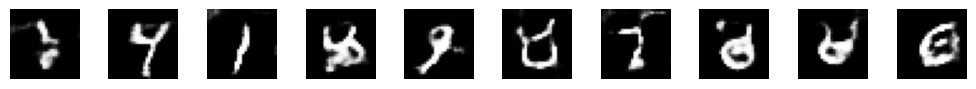

Epoch 5/5, Batch 160, Discriminator Loss: 1.2828582525253296, Generator Loss: 0.6322006583213806
Epoch 5/5, Batch 161, Discriminator Loss: 1.2523607015609741, Generator Loss: 1.2040202617645264
Epoch 5/5, Batch 162, Discriminator Loss: 1.2187141180038452, Generator Loss: 0.6244964599609375
Epoch 5/5, Batch 163, Discriminator Loss: 1.2395148277282715, Generator Loss: 1.4324668645858765
Epoch 5/5, Batch 164, Discriminator Loss: 1.338133454322815, Generator Loss: 0.4942775070667267


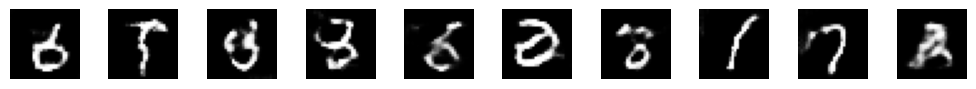

Epoch 5/5, Batch 165, Discriminator Loss: 1.1800442934036255, Generator Loss: 1.6447439193725586
Epoch 5/5, Batch 166, Discriminator Loss: 1.6144306659698486, Generator Loss: 0.34812837839126587
Epoch 5/5, Batch 167, Discriminator Loss: 1.2922422885894775, Generator Loss: 1.4315040111541748
Epoch 5/5, Batch 168, Discriminator Loss: 1.2574191093444824, Generator Loss: 0.6280238628387451
Epoch 5/5, Batch 169, Discriminator Loss: 1.2385791540145874, Generator Loss: 0.983583390712738


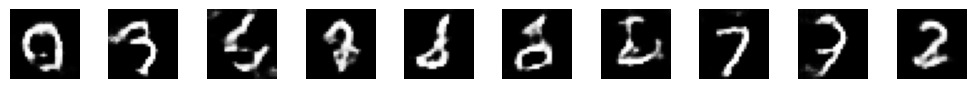

Epoch 5/5, Batch 170, Discriminator Loss: 1.209618330001831, Generator Loss: 0.7132948637008667
Epoch 5/5, Batch 171, Discriminator Loss: 1.154431939125061, Generator Loss: 0.9792073369026184
Epoch 5/5, Batch 172, Discriminator Loss: 1.201756238937378, Generator Loss: 0.801755428314209
Epoch 5/5, Batch 173, Discriminator Loss: 1.1770938634872437, Generator Loss: 1.0180583000183105
Epoch 5/5, Batch 174, Discriminator Loss: 1.2297911643981934, Generator Loss: 0.7220215797424316


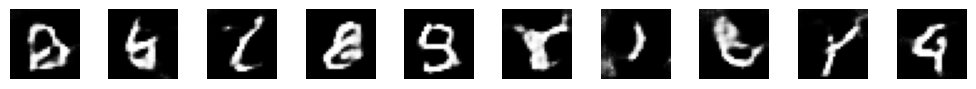

Epoch 5/5, Batch 175, Discriminator Loss: 1.2230945825576782, Generator Loss: 1.038326621055603
Epoch 5/5, Batch 176, Discriminator Loss: 1.193841814994812, Generator Loss: 0.6694103479385376
Epoch 5/5, Batch 177, Discriminator Loss: 1.1401565074920654, Generator Loss: 1.1691679954528809
Epoch 5/5, Batch 178, Discriminator Loss: 1.298098087310791, Generator Loss: 0.5591581463813782
Epoch 5/5, Batch 179, Discriminator Loss: 1.235825777053833, Generator Loss: 1.4041610956192017


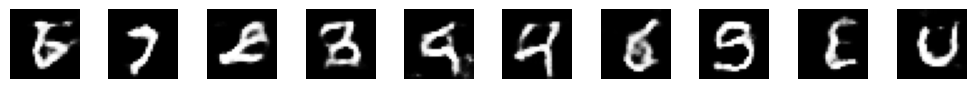

Epoch 5/5, Batch 180, Discriminator Loss: 1.3531033992767334, Generator Loss: 0.49400463700294495
Epoch 5/5, Batch 181, Discriminator Loss: 1.3256570100784302, Generator Loss: 1.2130141258239746
Epoch 5/5, Batch 182, Discriminator Loss: 1.2616932392120361, Generator Loss: 0.6007518768310547
Epoch 5/5, Batch 183, Discriminator Loss: 1.2352384328842163, Generator Loss: 1.2821149826049805
Epoch 5/5, Batch 184, Discriminator Loss: 1.2920342683792114, Generator Loss: 0.5626111626625061


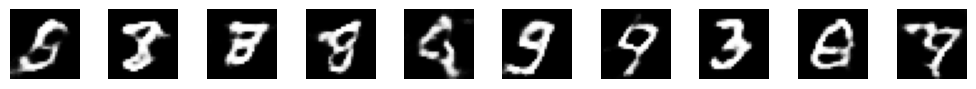

Epoch 5/5, Batch 185, Discriminator Loss: 1.191103219985962, Generator Loss: 1.6339133977890015
Epoch 5/5, Batch 186, Discriminator Loss: 1.4787578582763672, Generator Loss: 0.44287943840026855
Epoch 5/5, Batch 187, Discriminator Loss: 1.1519347429275513, Generator Loss: 1.1989086866378784
Epoch 5/5, Batch 188, Discriminator Loss: 1.2478694915771484, Generator Loss: 0.6498620510101318
Epoch 5/5, Batch 189, Discriminator Loss: 1.2898951768875122, Generator Loss: 1.004773736000061


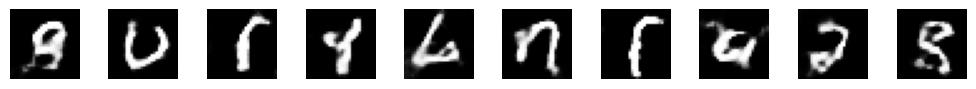

Epoch 5/5, Batch 190, Discriminator Loss: 1.1882270574569702, Generator Loss: 0.7605892419815063
Epoch 5/5, Batch 191, Discriminator Loss: 1.1462879180908203, Generator Loss: 1.1273114681243896
Epoch 5/5, Batch 192, Discriminator Loss: 1.2192256450653076, Generator Loss: 0.622223973274231
Epoch 5/5, Batch 193, Discriminator Loss: 1.207140326499939, Generator Loss: 1.057876706123352
Epoch 5/5, Batch 194, Discriminator Loss: 1.2036621570587158, Generator Loss: 0.6585695147514343


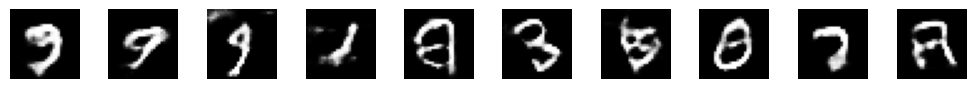

Epoch 5/5, Batch 195, Discriminator Loss: 1.2868061065673828, Generator Loss: 1.0766597986221313
Epoch 5/5, Batch 196, Discriminator Loss: 1.2580112218856812, Generator Loss: 0.6388875246047974
Epoch 5/5, Batch 197, Discriminator Loss: 1.1595678329467773, Generator Loss: 1.315748691558838
Epoch 5/5, Batch 198, Discriminator Loss: 1.3003566265106201, Generator Loss: 0.5574841499328613
Epoch 5/5, Batch 199, Discriminator Loss: 1.1968073844909668, Generator Loss: 1.1732323169708252


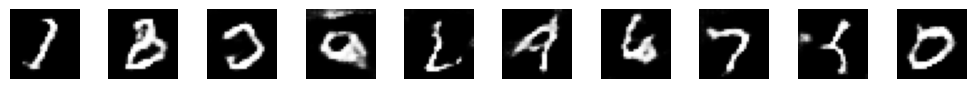

Epoch 5/5, Batch 200, Discriminator Loss: 1.252869725227356, Generator Loss: 0.608869194984436
Epoch 5/5, Batch 201, Discriminator Loss: 1.2367645502090454, Generator Loss: 1.1464135646820068
Epoch 5/5, Batch 202, Discriminator Loss: 1.2164360284805298, Generator Loss: 0.6375203132629395
Epoch 5/5, Batch 203, Discriminator Loss: 1.2752747535705566, Generator Loss: 1.4650747776031494
Epoch 5/5, Batch 204, Discriminator Loss: 1.3844674825668335, Generator Loss: 0.45932602882385254


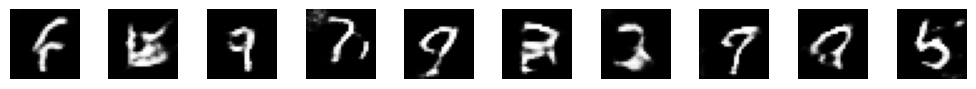

Epoch 5/5, Batch 205, Discriminator Loss: 1.089223027229309, Generator Loss: 1.4423885345458984
Epoch 5/5, Batch 206, Discriminator Loss: 1.5144751071929932, Generator Loss: 0.43333595991134644
Epoch 5/5, Batch 207, Discriminator Loss: 1.3303645849227905, Generator Loss: 1.357669472694397
Epoch 5/5, Batch 208, Discriminator Loss: 1.186034083366394, Generator Loss: 0.6727536916732788
Epoch 5/5, Batch 209, Discriminator Loss: 1.1937530040740967, Generator Loss: 1.0795607566833496


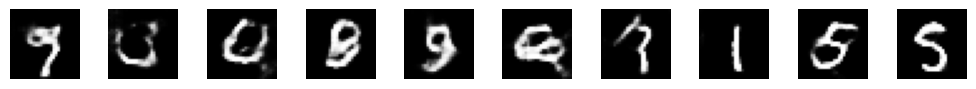

Epoch 5/5, Batch 210, Discriminator Loss: 1.2793269157409668, Generator Loss: 0.6284457445144653
Epoch 5/5, Batch 211, Discriminator Loss: 1.1585886478424072, Generator Loss: 1.098710536956787
Epoch 5/5, Batch 212, Discriminator Loss: 1.1588871479034424, Generator Loss: 0.7168780565261841
Epoch 5/5, Batch 213, Discriminator Loss: 1.2512626647949219, Generator Loss: 1.0659728050231934
Epoch 5/5, Batch 214, Discriminator Loss: 1.2054145336151123, Generator Loss: 0.6836187243461609


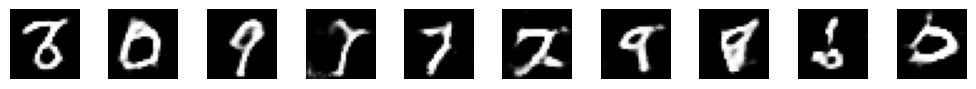

Epoch 5/5, Batch 215, Discriminator Loss: 1.1886508464813232, Generator Loss: 1.284973382949829
Epoch 5/5, Batch 216, Discriminator Loss: 1.3266382217407227, Generator Loss: 0.5342324376106262
Epoch 5/5, Batch 217, Discriminator Loss: 1.1816518306732178, Generator Loss: 1.1526299715042114
Epoch 5/5, Batch 218, Discriminator Loss: 1.2463350296020508, Generator Loss: 0.6300663352012634
Epoch 5/5, Batch 219, Discriminator Loss: 1.2120987176895142, Generator Loss: 1.1025687456130981


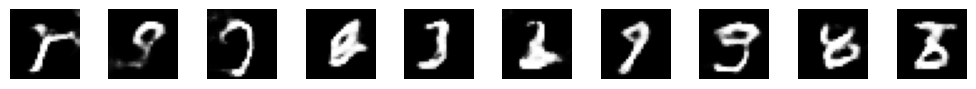

Epoch 5/5, Batch 220, Discriminator Loss: 1.2285972833633423, Generator Loss: 0.6727895736694336
Epoch 5/5, Batch 221, Discriminator Loss: 1.197043538093567, Generator Loss: 1.1174861192703247
Epoch 5/5, Batch 222, Discriminator Loss: 1.263954520225525, Generator Loss: 0.588716447353363
Epoch 5/5, Batch 223, Discriminator Loss: 1.133265733718872, Generator Loss: 1.2101194858551025
Epoch 5/5, Batch 224, Discriminator Loss: 1.2877135276794434, Generator Loss: 0.5893513560295105


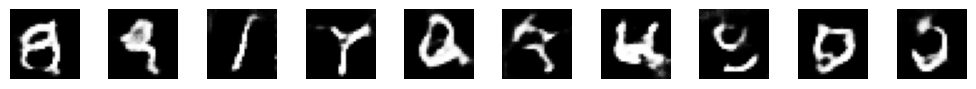

Epoch 5/5, Batch 225, Discriminator Loss: 1.2086116075515747, Generator Loss: 1.391497254371643
Epoch 5/5, Batch 226, Discriminator Loss: 1.3439613580703735, Generator Loss: 0.5045665502548218
Epoch 5/5, Batch 227, Discriminator Loss: 1.3083171844482422, Generator Loss: 1.244170904159546
Epoch 5/5, Batch 228, Discriminator Loss: 1.225091814994812, Generator Loss: 0.6169612407684326
Epoch 5/5, Batch 229, Discriminator Loss: 1.3091976642608643, Generator Loss: 1.2351820468902588


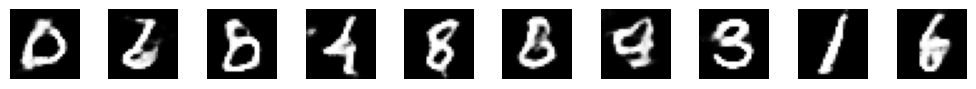

Epoch 5/5, Batch 230, Discriminator Loss: 1.2360944747924805, Generator Loss: 0.5944186449050903
Epoch 5/5, Batch 231, Discriminator Loss: 1.2409064769744873, Generator Loss: 1.5725003480911255
Epoch 5/5, Batch 232, Discriminator Loss: 1.4833146333694458, Generator Loss: 0.4268243908882141
Epoch 5/5, Batch 233, Discriminator Loss: 1.1936155557632446, Generator Loss: 1.2602611780166626
Epoch 5/5, Batch 234, Discriminator Loss: 1.2351449728012085, Generator Loss: 0.6111047267913818


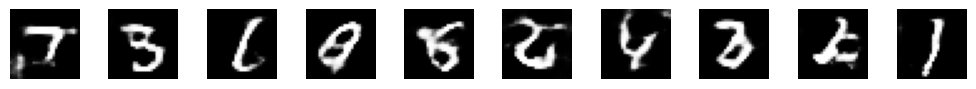

End of epoch 5, Discriminator Loss: 1.2351449728012085, Generator Loss: 0.6111047267913818


In [11]:
n_epochs = 5
coding_size = 100
d_iterations = 1

history = {'d_loss': [], 'g_loss': []}

def plot_generated_images(generator, epoch, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = tf.random.normal([examples, coding_size])
    generated_images = generator(noise, training=False)
    generated_images = 0.5 * generated_images + 0.5  
    
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


for epoch in range(n_epochs):
    n_batches = 0
    for xbatch in dataset:
            with tf.GradientTape() as d_tape, tf.GradientTape() as g_tape:
                noise = tf.random.normal([batch_size, coding_size])
                generated_images = generator(noise)
                real_predictions = discriminator(xbatch)
                generated_predictions = discriminator(generated_images)
                d_loss = discriminator_loss(real_predictions, generated_predictions)
                g_loss = generator_loss(generated_predictions)
            
            discriminator_gradients = d_tape.gradient(d_loss, discriminator.trainable_variables)
            generator_gradients = g_tape.gradient(g_loss, generator.trainable_variables)
            d_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))
            g_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
           
      
            # Convert the losses to numpy for better readability
            d_loss_np = tf.reduce_mean(d_loss).numpy()
            g_loss_np = tf.reduce_mean(g_loss).numpy()
        
            history['d_loss'].append(d_loss_np)
            history['g_loss'].append(g_loss_np)
            
            print(f'Epoch {epoch + 1}/{n_epochs}, Batch {n_batches}, Discriminator Loss: {d_loss_np}, Generator Loss: {g_loss_np}')
        
            n_batches += 1

            if n_batches % 5 == 0:
                plot_generated_images(generator, epoch)
        
    print(f'End of epoch {epoch + 1}, Discriminator Loss: {d_loss_np}, Generator Loss: {g_loss_np}')



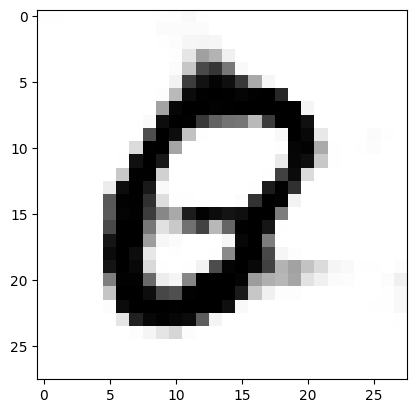

In [22]:
teste = generator(tf.random.normal([1, 100]))
teste = teste.numpy().reshape(28, 28)
plt.imshow(teste, cmap = 'binary')